# Análisis completo de los proyectos de Dr. Scratch

**El objetivo del análisis es poder extraer información relevante sobre los datos obtenidos a partir de los proyectos analizados de Dr. Scratch . Ser capaces de obtener las relaciones que existen entre las distintas áreas del pensamiento computacional así como poder deducir que relaciones existen entre los bad smells.Estos malos hábitos perjudican el correcto desarrollo de buenas prácticas y habilidades en el campo de la programación y por extensión en otras área de aprendizaje.**

## Obtención de datos del dataframe

Antes de realizar cualquier análisis, lo primero es observar el tipo de datos con que se cuenta. Para ello, se ha de cargar el dataframe completo, así como las librerías necesarias.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
#from sklearn.cluster import AgglomerativeClustering #
from sklearn.metrics import pairwise_distances_argmin_min
from scipy import stats
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (11, 6)

In [2]:
df_dr_scratch = pd.read_csv("results.csv")
df_dr_scratch.head(10)

,Project,Total,Average,Level,Abstraction,Parallelism,Logic,Synchronization,Flow Control,User Interactivity,Data Representation,Default sprite names,Default backdrop names,Duplicate scripts,Dead code
0,0000000000000000000_2019_10_31_16_23_19_855098...,7.0,1.000000,Basic,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
1,000_2020_02_10_20_36_07_266406.sb3,21.0,3.000000,Proficiency,3.0,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,1.0,1.0
2,001_2019_10_06_01_02_56_507455.sb3,9.0,1.285714,Developing,0.0,1.0,2.0,1.0,1.0,1.0,3.0,1.0,3.0,0.0,0.0
3,001_2020_02_20_17_27_00_734651.sb3,3.0,0.428571,Basic,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,002_2020_02_20_17_30_48_272929.sb3,6.0,0.857143,Basic,0.0,1.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0
5,003_2020_02_20_17_27_13_373178.sb3,13.0,1.857143,Developing,2.0,2.0,2.0,1.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0
6,004_2020_02_20_17_32_15_589825.sb3,12.0,1.714286,Developing,1.0,3.0,2.0,1.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0
7,005_2020_02_20_17_32_22_776272.sb3,4.0,0.571429,Basic,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
8,006_2020_02_20_17_32_29_837493.sb3,13.0,1.857143,Developing,1.0,2.0,3.0,1.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0
9,007_2020_02_20_17_32_38_622248.sb3,12.0,1.714286,Developing,1.0,3.0,1.0,3.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0


Aquí se obtiene una representación de los 10 primeros proyectos del dataframe. Cada
proyecto cuenta con una puntuación total y media, en base a las puntuaciones obtenidas para cada una de las siete dimensiones del pensamiento computacional (CT), evaluadas cada una de 0 a 3.
Las cuatro variables o columnas restantes, presentan la cantidad de malas prácticas de programación realizadas en cada proyecto. Éstas se corresponden con dejar el nombre del personaje o del escenario por defecto, o con encontrar flujos de código duplicado o que no se ejecuta nunca.

In [3]:
df_dr_scratch.shape

(269844, 15)

Se cuenta con una muestra de 269844 proyectos de Dr. Scratch u observaciones y 14 columnas o variables. Se observa a continuación cual es el tipo específico para cada variable (en este caso float para las dimensiones CT y bad smells, y object para el nivel de programación alcanzado) y si existe algún proyecto que no contenga datos.

In [4]:
df_dr_scratch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269844 entries, 0 to 269843
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Project                 269844 non-null  object 
 1   Total                   269842 non-null  float64
 2   Average                 269842 non-null  float64
 3   Level                   269842 non-null  object 
 4   Abstraction             269842 non-null  float64
 5   Parallelism             269842 non-null  float64
 6   Logic                   269842 non-null  float64
 7   Synchronization         269842 non-null  float64
 8   Flow Control            269842 non-null  float64
 9   User Interactivity      269842 non-null  float64
 10  Data Representation     269842 non-null  float64
 11  Default sprite names    269842 non-null  float64
 12  Default backdrop names  269842 non-null  float64
 13  Duplicate scripts       269842 non-null  float64
 14  Dead code           

"Level" recoge el nivel obtenido para cada proyecto. Este nivel se agrupa en tres categorías en función de la puntuación total. Por ello se cambia su tipo a una variable categórica.

In [5]:
#df_dr_scratch = df_dr_scratch.convert_dtypes() # To string
df_dr_scratch["Level"] = pd.Categorical(df_dr_scratch["Level"])
df_dr_scratch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269844 entries, 0 to 269843
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   Project                 269844 non-null  object  
 1   Total                   269842 non-null  float64 
 2   Average                 269842 non-null  float64 
 3   Level                   269842 non-null  category
 4   Abstraction             269842 non-null  float64 
 5   Parallelism             269842 non-null  float64 
 6   Logic                   269842 non-null  float64 
 7   Synchronization         269842 non-null  float64 
 8   Flow Control            269842 non-null  float64 
 9   User Interactivity      269842 non-null  float64 
 10  Data Representation     269842 non-null  float64 
 11  Default sprite names    269842 non-null  float64 
 12  Default backdrop names  269842 non-null  float64 
 13  Duplicate scripts       269842 non-null  float64 
 14  Dead

Se observa además que hay dos proyectos sin datos. Se busca a continuación cuáles son estos proyectos, para después proceder a la **limpieza de datos**.

In [6]:
df_nan=df_dr_scratch[df_dr_scratch.isna().any(axis=1)]
df_nan

,Project,Total,Average,Level,Abstraction,Parallelism,Logic,Synchronization,Flow Control,User Interactivity,Data Representation,Default sprite names,Default backdrop names,Duplicate scripts,Dead code
248614,Jake_pandemic_2020_09_10_09_22_12_185954.sb3 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248645,lilah-rose_marviles_maze_2020_09_13_10_13_17_6...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
print(df_nan['Project'])

248614    Jake_pandemic_2020_09_10_09_22_12_185954.sb3  ...
248645    lilah-rose_marviles_maze_2020_09_13_10_13_17_6...
Name: Project, dtype: object


Analizando dichos proyectos en nuestro sitio web http://www.drscratch.org/ nos da el siguiente mensaje de error.

<img src="error_analyzing.png" width="400" height="300">

Por ello, se decide eliminarlos de nuestro dataset, que contendrá, a partir de ahora 269842 proyectos de Dr. Scratch.

In [8]:
df_dr_scratch.dropna(inplace=True)

In [9]:
df_dr_scratch.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            269834, 269835, 269836, 269837, 269838, 269839, 269840, 269841,
            269842, 269843],
           dtype='int64', length=269842)

Así se comprueba que efectivamente han sido eliminados de nuestro conjunto de datos. De este modo se cuenta con 269842 proyectos de Dr. Scratch analizados u observaciones y las columnas con los datos de los proyectos, anteriormente explicadas.

In [10]:
df_dr_scratch.columns

Index(['Project', 'Total', 'Average', 'Level', 'Abstraction', 'Parallelism',
       'Logic', 'Synchronization', 'Flow Control', 'User Interactivity',
       'Data Representation', 'Default sprite names', 'Default backdrop names',
       'Duplicate scripts', 'Dead code'],
      dtype='object')

Se convierten a enteros tanto las puntuaciones de cada dimensión del pensamiento computacional, como la cantidad de bad smells que se han cometido en cada proyecto, por ser variables discretas.

In [11]:
lista_col_int = ['Total','Abstraction', 'Parallelism', 'Logic', 'Synchronization', 'Flow Control',
                 'User Interactivity', 'Data Representation', 'Default sprite names','Default backdrop names',
                 'Duplicate scripts', 'Dead code']

In [12]:
for col in lista_col_int:
    df_dr_scratch[col] = df_dr_scratch[col].astype(np.uint8) 

In [13]:
df_dr_scratch.dtypes

Project                     object
Total                        uint8
Average                    float64
Level                     category
Abstraction                  uint8
Parallelism                  uint8
Logic                        uint8
Synchronization              uint8
Flow Control                 uint8
User Interactivity           uint8
Data Representation          uint8
Default sprite names         uint8
Default backdrop names       uint8
Duplicate scripts            uint8
Dead code                    uint8
dtype: object

In [14]:
df_dr_scratch.shape

(269842, 15)

In [15]:
df_dr_scratch.describe(include=object)

,Project
count,269842
unique,269842
top,508046477_2021_07_08_05_20_36_355691.sb3
freq,1


Se cuenta por lo tanto con 269842 proyectos únicos.

## Análisis de los proyectos por nivel de programación: basic, developing, proficiency.

Se comprueba a continuación cuál es la distribución de los proyectos según su nivel, tanto en frecuencia absoluta como en frecuencia relativa. Se obtiene una representación gráfica a partir de los resultados obtenidos.

In [16]:
df_dr_scratch["Level"].value_counts()

Basic          131007
Developing     104142
Proficiency     34693
Name: Level, dtype: int64

In [17]:
df_dr_scratch["Level"].value_counts(normalize=True)

Basic          0.485495
Developing     0.385937
Proficiency    0.128568
Name: Level, dtype: float64

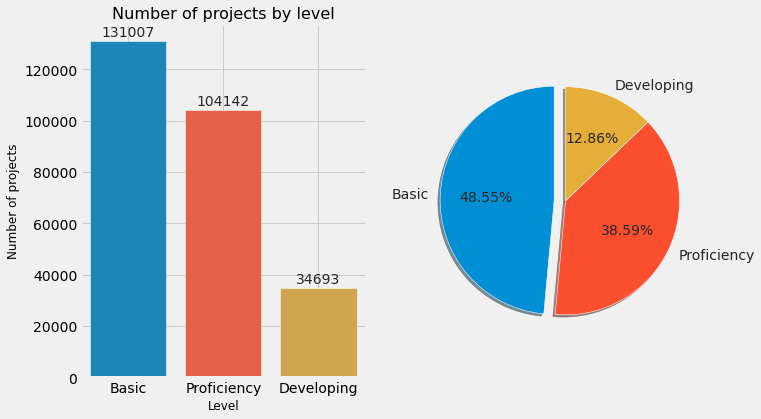

In [18]:
values = df_dr_scratch["Level"].value_counts()
names = df_dr_scratch.Level.unique()
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 6))
fig.tight_layout(pad=2)

plt.subplot(1,2,1)
sns.set_style('whitegrid')
ax1 = sns.barplot(x=names, y=values, data=df_dr_scratch)
for patch in ax1.patches:
    ax1.annotate(format(patch.get_height(), '.0f'),(patch.get_x() + patch.get_width() / 2., patch.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')
plt.title("Number of projects by level", fontsize=16)
plt.xlabel('Level', fontsize=12)
plt.ylabel('Number of projects', fontsize=12)
ax1.grid(True)

plt.subplot(1,2,2)
explode = (0.1, 0, 0)
plt.pie(values, explode=explode, labels=names, autopct='%1.2f%%', shadow=True, startangle=90, )
ax2.axis('equal')
ax2.grid(False)
plt.show()

 Según se aprecia en las gráficas, el nivel básico es el que cuenta con casi la mitad de los proyectos (48,55%), seguido de la categoría "Proficiency" que cuenta con el 38,59% de los proyectos. Solo 34693 proyectos alcanzan el nivel más alto, "Developing", que se corresponde con un 12,86% del conjunto total de proyectos. 

El objetivo sería conseguir que los programadores de Dr. Scratch consigan alcanzar el nivel o categoría más alta, y los proyectos de nivel básico consigan ir aumentando su puntuación total.

Se muestra a continuación una forma de filtrar por nivel para luego poder visualizar la puntuación de los proyectos de cada nivel, en el conjunto total de proyectos de Dr. Scratch analizados. Con ello se conoce más en profundidad cada uno de los tres niveles en que se divide el conjunto total de proyectos, y cómo se reparten según las puntuaciones asignadas a cada categoría.

- **Para nivel bajo o básico:**


In [19]:
filt_basic = df_dr_scratch['Level'].str.contains('Basic', na=False)
df_dr_scratch_basic = df_dr_scratch.loc[filt_basic].sort_values(by="Total")
df_dr_scratch_basic

,Project,Total,Average,Level,Abstraction,Parallelism,Logic,Synchronization,Flow Control,User Interactivity,Data Representation,Default sprite names,Default backdrop names,Duplicate scripts,Dead code
135450,287227329_2020_03_29_10_05_52_964584.sb3,0,0.0,Basic,0,0,0,0,0,0,0,0,0,0,0
120896,284003724_2020_03_29_20_59_43_071570.sb3,0,0.0,Basic,0,0,0,0,0,0,0,0,1,0,0
120887,284002148_2020_03_29_20_58_34_112173.sb3,0,0.0,Basic,0,0,0,0,0,0,0,0,0,0,0
120879,284000853_2020_03_29_20_57_37_304071.sb3,0,0.0,Basic,0,0,0,0,0,0,0,1,0,0,0
120869,283999056_2020_03_29_20_56_23_831027.sb3,0,0.0,Basic,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19893,290632537_2019_12_31_11_09_16_923588.sb3,7,1.0,Basic,0,2,1,1,1,1,1,0,0,0,0
152761,290884322_2020_03_30_00_44_04_619249.sb3,7,1.0,Basic,0,2,1,1,1,1,1,0,1,0,0
152762,290884745_2020_03_30_00_44_11_583703.sb3,7,1.0,Basic,0,2,1,1,1,1,1,0,1,0,1
152693,290869757_2020_03_30_00_35_56_311434.sb3,7,1.0,Basic,0,2,1,1,1,1,1,0,0,0,0


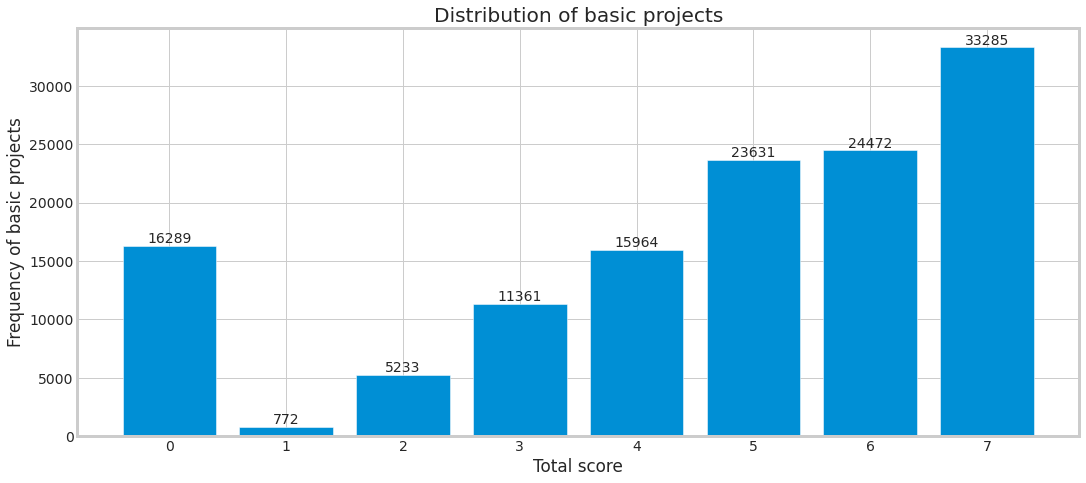

In [20]:
f, ax = plt.subplots(figsize=(16,7))
values = df_dr_scratch_basic["Total"].value_counts(sort=False)
names = df_dr_scratch_basic.Total.unique()
plt.bar(names, values)
ax = plt.gca()
plt.bar_label(ax.containers[0])
plt.title("Distribution of basic projects")
plt.ylabel("Frequency of basic projects")
plt.xlabel("Total score")
plt.show()

Los proyectos de nivel básico más frecuentes son los de puntuación 7. Si bien es cierto que hay gran cantidad de proyectos con 0 puntos, que son áquellos que no han sido completados, y por ello no deberían ser tenidos en cuenta. Se aprecia una cantidad de proyectos muy baja para 1 punto, que se va incrementando para el resto de puntuaciones, siguiendo una tendencia ascendente.

- **Para nivel medio o desarrollador:**

In [21]:
filt_dev = df_dr_scratch['Level'].str.contains('Developing', na=False)
df_dr_scratch_dev = df_dr_scratch.loc[filt_dev].sort_values(by="Total")

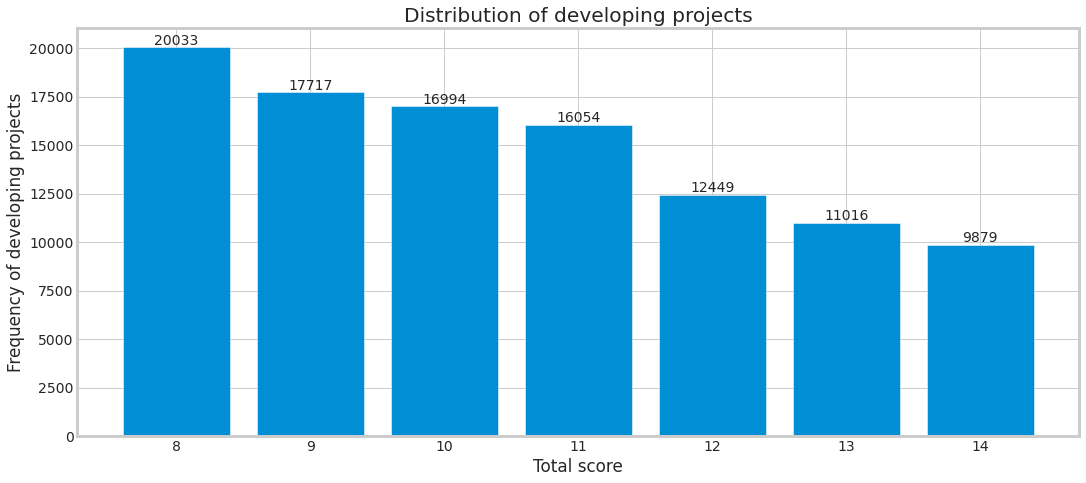

In [22]:
f, ax = plt.subplots(figsize=(16,7))
values = df_dr_scratch_dev["Total"].value_counts(sort=False)
names = df_dr_scratch_dev.Total.unique()
plt.bar(names, values)
ax = plt.gca()
plt.bar_label(ax.containers[0])
plt.title("Distribution of developing projects")
plt.ylabel("Frequency of developing projects")
plt.xlabel("Total score")
plt.show()

Para esta segunda categoría correspondiente al nivel medio o de desarrollador, la puntuación más frecuente es 8. El nº de proyectos que consiguen 9, 10, 11, 12, 13 y 14 va disminuyendo. Hay un cambio de tendencia entre la frecuencia de la puntuación más alta del nivel básico y la frecuencia o nº de proyectos con la puntuación más baja de este nivel.

- **Para nivel alto o profesional:**

In [23]:
filt_dev = df_dr_scratch['Level'].str.contains('Proficiency', na=False)
df_dr_scratch_prof = df_dr_scratch.loc[filt_dev].sort_values(by="Total")

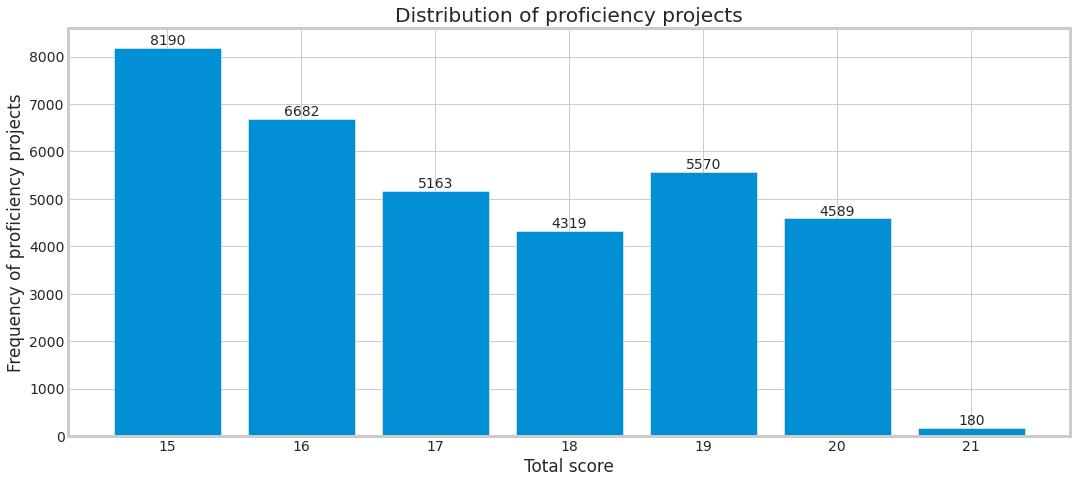

In [24]:
f, ax = plt.subplots(figsize=(16,7))
values = df_dr_scratch_prof["Total"].value_counts(sort=False)
names = df_dr_scratch_prof.Total.unique()
plt.bar(names, values)
ax = plt.gca()
plt.bar_label(ax.containers[0])
plt.title("Distribution of proficiency projects")
plt.ylabel("Frequency of proficiency projects")
plt.xlabel("Total score")
plt.show()

Esta categoría o nivel "proficiency" es la que contiene menor nº de observaciones o proyectos. La frecuencia más alta se consigue para los 15 puntos totales. A partir de ahí sigue una tendencia descendente hasta los 18 puntos. Para los 19 puntos se produce un incremento en el nº de proyectos que consiguen este nivel, que también es elevado para los 20 puntos totales. Solamente 180 proyectos de un total global de 269842 proyectos alcanzan la máxima puntuación de 21 puntos.

Lo ideal sería encontrar alguna manera de que los programadores deseen alcanzar esa puntuación máxima o por lo menos aumentar el nº de proyectos que alcanzan la categoría "proficiency" o máster.

Se halla a continuación la media y la mediana como medidas de la tendencia central para cada nivel. En los tres niveles media y mediana son similares. Los valores elevados de varianza y desviación típica con respecto a la media, nos indican que ésta no es representativa para ninguno de los tres niveles.

In [25]:
level_statistics = df_dr_scratch.groupby('Level')["Total"].agg([np.mean,np.median, np.var, np.std])
level_statistics

,mean,median,var,std
Level,,,,
Basic,4.634554,5,5.100514,2.258432
Developing,10.535164,10,3.755300,1.937860
Proficiency,17.198426,17,3.137785,1.771379


Śin embargo, como se aprecia en la tabla la varianza y por lo tanto la desviación estándar van disminuyendo según aumenta el nivel de los proyectos. Existe por tanto una menor dispersión en torno a la media, en el nivel más alto.

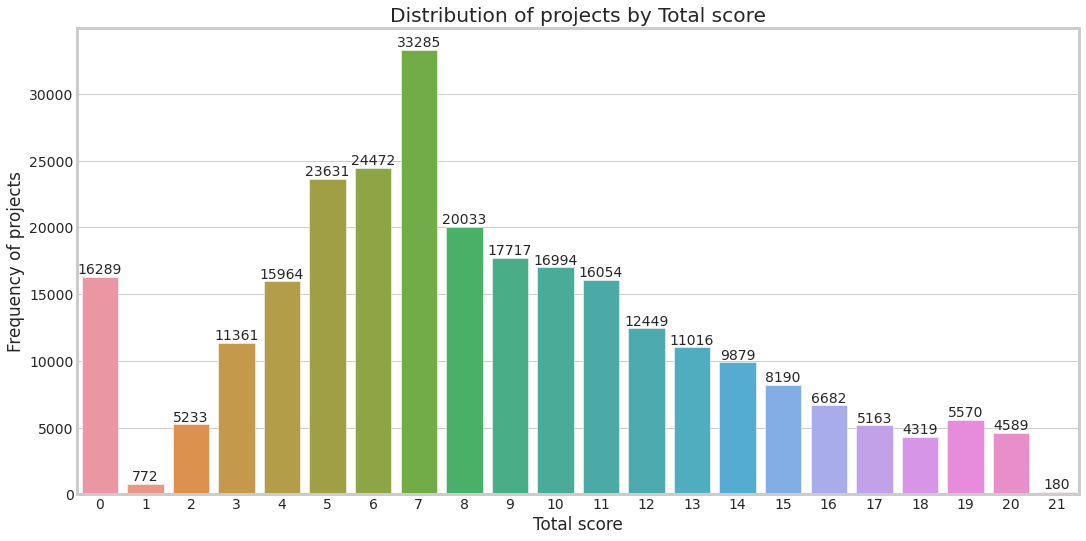

In [26]:
df_total=[df_dr_scratch_basic, df_dr_scratch_dev, df_dr_scratch_prof]
result = pd.concat(df_total)
f, ax = plt.subplots(figsize=(16,8))
values = result["Total"].value_counts(sort=False)
names = result.Total.unique()
#plt.bar(names, values)
ax = plt.gca()
sns.barplot(x=names, y=values)
plt.bar_label(ax.containers[0])
plt.title("Distribution of projects by Total score")
plt.ylabel("Frequency of projects")
plt.xlabel("Total score")
plt.show()

Esta es la gráfica de barras que representa como se reparten los proyectos en función de cada una de las puntuaciones totales y que agrupa en una sola gráfica las tres gráficas anteriores. Gran cantidad de proyectos se agrupan en torno a los 4 y hasta los 11 puntos, siendo la puntuación más frecuente la de 7 puntos. Sería interesante fomentar el aumento de la puntuación total para que mayor nº de proyectos consigan mayores puntuaciones.

## Frecuencia de los proyectos por áreas del pensamiento computacional

Se observan a continuación las variables de tipo numérico.

In [27]:
df_dr_scratch.select_dtypes(include=np.number)

,Total,Average,Abstraction,Parallelism,Logic,Synchronization,Flow Control,User Interactivity,Data Representation,Default sprite names,Default backdrop names,Duplicate scripts,Dead code
0,7,1.000000,0,2,1,1,1,1,1,1,1,0,0
1,21,3.000000,3,3,3,3,3,3,3,0,0,1,1
2,9,1.285714,0,1,2,1,1,1,3,1,3,0,0
3,3,0.428571,0,2,0,0,1,0,0,0,0,0,0
4,6,0.857143,0,1,0,1,1,2,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
269839,13,1.857143,1,2,2,1,2,2,3,0,0,1,0
269840,13,1.857143,1,2,2,1,2,2,3,0,0,1,0
269841,13,1.857143,1,2,2,1,2,2,3,0,0,1,0
269842,16,2.285714,3,2,2,1,3,2,3,0,0,1,0


Se extrae de nuestro dataset las columnas correspondientes a cada dimensión del pensamiento computacional. A continuación se obtiene cuántos proyectos consiguen 0, 1, 2 o 3 puntos en cada dimensión.

In [28]:
df_ct = df_dr_scratch.loc[:, "Abstraction":"Data Representation"]
df_ct

,Abstraction,Parallelism,Logic,Synchronization,Flow Control,User Interactivity,Data Representation
0,0,2,1,1,1,1,1
1,3,3,3,3,3,3,3
2,0,1,2,1,1,1,3
3,0,2,0,0,1,0,0
4,0,1,0,1,1,2,1
...,...,...,...,...,...,...,...
269839,1,2,2,1,2,2,3
269840,1,2,2,1,2,2,3
269841,1,2,2,1,2,2,3
269842,3,2,2,1,3,2,3


In [29]:
df_ct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269842 entries, 0 to 269843
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   Abstraction          269842 non-null  uint8
 1   Parallelism          269842 non-null  uint8
 2   Logic                269842 non-null  uint8
 3   Synchronization      269842 non-null  uint8
 4   Flow Control         269842 non-null  uint8
 5   User Interactivity   269842 non-null  uint8
 6   Data Representation  269842 non-null  uint8
dtypes: uint8(7)
memory usage: 11.9 MB


In [30]:
df_ct.shape

(269842, 7)

In [33]:

for column in df_ct.columns:
    df_score_ct[column] = df_ct.groupby([column]).size().to_frame()
if 0 in df_score_ct.columns:
    df_score_ct.reset_index(drop=True, inplace=True)
    df_score_ct.drop(0, 1, inplace=True)

In [34]:
df_score_ct

,Abstraction,Parallelism,Logic,Synchronization,Flow Control,User Interactivity,Data Representation
0,171517,17167,100164,68035,41389,19258,98578
1,40694,63683,67120,156004,148270,106593,90751
2,18193,149334,51965,17613,68488,141303,24255
3,39438,39658,50593,28190,11695,2688,56258


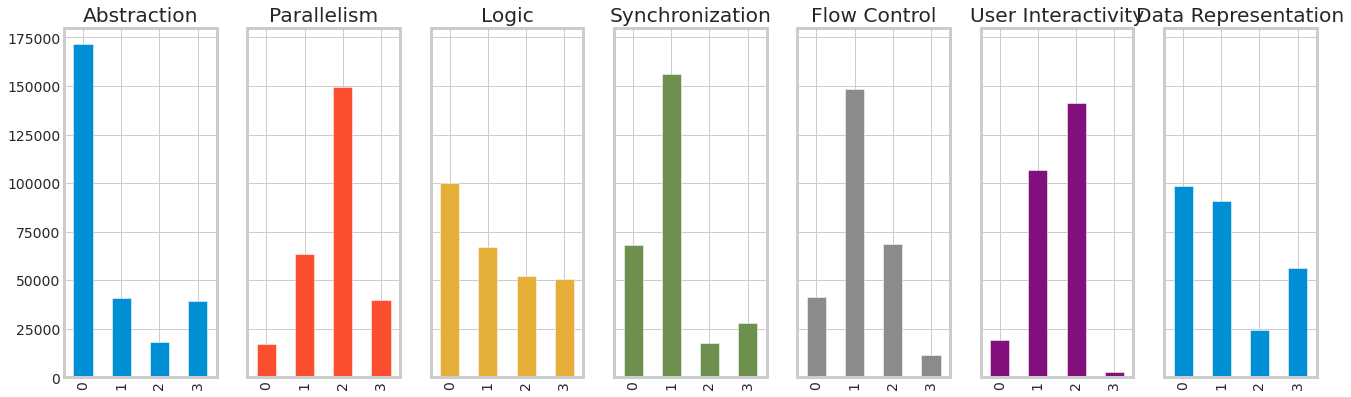

In [35]:
df_score_ct.plot(kind='bar', subplots=True, layout=(1,7), legend=False,figsize=(20, 6), sharey=True);

Los peores resultados se obtienen en abstracción, donde 171517 proyectos tienen 0 puntos. Tanto en lógica como en representación de la información la frecuencia absoluta de la puntuación 0 es cercana a los 100000 proyectos, por lo que tampoco se consiguen buenos resultados en estas dimensiones, aunque en ellas las frecuencias están más repartidas entre las distintas puntuaciones.
Tanto en sincronismo como en flujo de control del programa en torno a 150000 proyectos consiguen un punto.
En paralelismo y en interactividad con el usuario la puntuación más frecuente es 2 puntos, siendo la puntuación de 1, la siguiente más frecuente.

## Análisis estadístico por áreas del pensamiento computacional

Se obtiene un resumen estadístico para cada dimensión del pensamiento computacional (CT) en función de las  observaciones o proyectos de nuestro dataset. Las mayores puntuaciones medias se consiguen en paralelismo y en interactividad con el usuario. La menor puntuación media, como era de esperar al visualizar las gráficas anteriores, es para abstracción, que cuenta además con una elevada desviación en torno a ese valor y solo un punto en el tercer cuartil. Son también elevadas las dispersiones en torno a la media para lógica y representación de la información.

Solamente se consigue 0 o 1 puntos para el 75% de los proyectos en sincronismo mientras que en el resto de competencias CT, algunos proyectos son evaluados con 2 puntos (salvo en abstracción como se acaba de comentar).

Este primer acercamiento a los estadísticos más básicos, remarca el hecho de que las puntuaciones que se obtienen para cada CT deben ser más elevadas. El objetivo es que los programadores de los proyectos traten de mejorar sus puntuaciones y se acerquen más al máximo en cada competencia CT.

In [36]:
df_ct.describe()

,Abstraction,Parallelism,Logic,Synchronization,Flow Control,User Interactivity,Data Representation
count,269842.000000,269842.000000,269842.000000,269842.000000,269842.000000,269842.000000,269842.000000
mean,0.724105,1.783729,1.196363,1.022080,1.187106,1.472206,1.141538
std,1.100698,0.768552,1.129239,0.857199,0.738610,0.641784,1.126550
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000
75%,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [37]:
df_ct.mean()

Abstraction            0.724105
Parallelism            1.783729
Logic                  1.196363
Synchronization        1.022080
Flow Control           1.187106
User Interactivity     1.472206
Data Representation    1.141538
dtype: float64

El mayor valor medio se consigue para paralelismo, por lo que en términos generales es la dimensión más desarrollada, de modo que los programadores de Dr. Scratch son buenos haciendo que distintas partes del programa se ejecuten en el mismo momento. Sin embargo como ya hemos visto en los gráficos de barras, la dimensión menos desarrollada en el conjunto de proyectos analizados es la capacidad de abstraer en qué partes más pequeñas se puede descomponer el programa.

A continuación vemos la mediana que coincide con la medida de posición del segundo cuartil, dejando a derechas e izquierdas el mismo nº de proyectos, si ordenamos su distribución por puntuación.
En abstracción se ve que los proyectos consiguen los peores resultados en cuanto a esta medida de tendencia central (solo obtienen 0 puntos). Por otro lado los mejores resultados se obtienen en paralelismo e interactividad con el usuario, donde algunos proyectos consiguen alcanzar los 2 puntos.

In [38]:
df_ct.median()

Abstraction            0.0
Parallelism            2.0
Logic                  1.0
Synchronization        1.0
Flow Control           1.0
User Interactivity     2.0
Data Representation    1.0
dtype: float64

Sin embargo con el percentil 90%, que deja por debajo el 90% de los proyectos ordenados de menor a mayor puntuación, se observa que en interactividad con el usuario solo se consiguen 2 puntos. No aumenta con respecto al percentil 50% o mediana. Esto se debe a que la máxima puntuación en esta dimensión se consigue cuando el usuario emplea la webcam o el micrófono para interactuar con el programa de Dr. Scratch, pero no se aplica demasiado.  
Con el percentil 90% también se observa que solo se consiguen 2 puntos en flujo de control del programa. Esto se debe a que la máxima puntuación se obtiene cuando se emplea un bloque especial que indica hasta cuando debe repetirse una sentencia, en función de que ocurra cierto evento, y no porque se indique a priori el nº de veces que debe repetirse. No se emplea en el 90% de los proyectos ordenados de menor a mayor puntuación.

In [39]:
df_ct.quantile(0.9)

Abstraction            3.0
Parallelism            3.0
Logic                  3.0
Synchronization        3.0
Flow Control           2.0
User Interactivity     2.0
Data Representation    3.0
Name: 0.9, dtype: float64

In [40]:
df_ct.var()

Abstraction            1.211536
Parallelism            0.590672
Logic                  1.275182
Synchronization        0.734790
Flow Control           0.545544
User Interactivity     0.411887
Data Representation    1.269115
dtype: float64

**Diagrama de cajas**

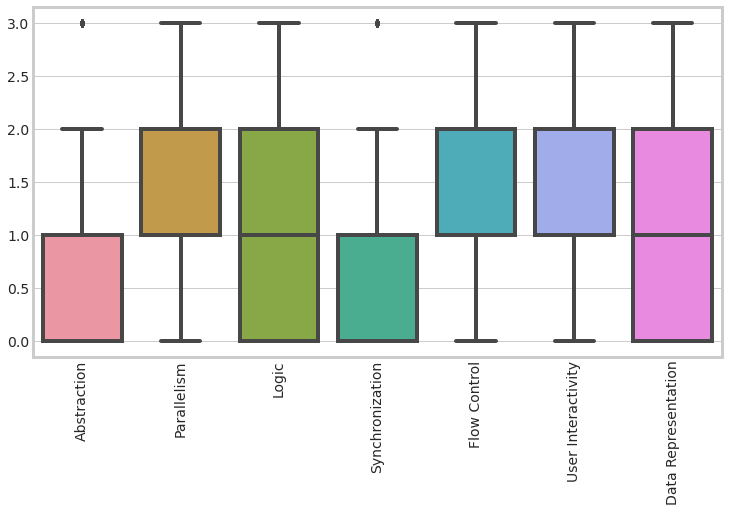

In [41]:
sns.boxplot(data=df_ct)
plt.xticks(rotation=90);

- **Abstracción y sincronismo**: En abstracción la mediana y el primer cuartil coinciden en 0. Siendo todos los proyectos ordenados de menor a mayor puntuación, en la primera mitad únicamente tienen 0 puntos. En el tercer cuartil (correspondiente al 75% percentil), algunos proyectos alcanzan 1 punto. El límite superior se considera que está en 2 puntos. Como 1.5* Rango intercuartil + Q3 = 2.5 => los proyectos con 3 puntos serían considerados valores atípicos, aunque en nuestro caso válidos. Sincronismo tiene una dispersión similar, lo único que difiere es que la mediana coincide con el tercer cuartil en 1 punto para los proyectos.
- **Paralelismo, interactividad con el usuario y flujo de control**: presentan un diagrama de cajas similar, con el mismo rango intercuartil. Los proyectos alcanzan 1 punto en el primer cuartil y 2 puntos en el tercer cuartil. La mediana de paralelismo e interactividad con el usuario coincide con el tercer cuartil y se corresponde con los 2 puntos para estas dimensiones del pensamiento computacional. En cambio, para flujo de control la mediana coincide con el primer cuartil en 1 punto. El límite superior para las tres está en tres puntos.
- **Pensamiento lógico y representación de los datos**: también siguen una dispersión similar, con un rango intercuartil de 0 a 2 puntos y la mediana en 1 punto. El límite superior está en 3 puntos.

In [42]:
agg = df_dr_scratch.loc[:, "Level":"Data Representation"].groupby('Level').agg([np.mean, np.std])
agg

Abstraction           Parallelism               Logic            \
                   mean       std        mean       std      mean       std   
Level                                                                         
Basic          0.074065  0.329951    1.372423  0.720636  0.411634  0.576372   
Developing     0.872405  0.997488    2.007701  0.525329  1.689693  1.017086   
Proficiency    2.733606  0.570722    2.664572  0.489414  2.678754  0.552468   

            Synchronization           Flow Control            \
                       mean       std         mean       std   
Level                                                          
Basic              0.526422  0.546317     0.740418  0.543354   
Developing         1.242525  0.652300     1.413455  0.547926   
Proficiency        2.232035  0.879388     2.194420  0.552492   

            User Interactivity           Data Representation            
                          mean       std                mean       std  
Level                                                                   
Basic                 1.146221  0.653542            0.363370  0.539624  
Developing            1.715485  0.474423            1.593901  0.990701  
Proficiency           1.972905  0.292422            2.722134  0.652788

En esta tabla se muestran la media y la desviación típica para cada área del pensamiento computacional y por cada nivel.
- Para nivel básico: La menor media se consigue en abstracción, siendo también baja en pensamiento lógico y en representación de la información. Las mayores desviación estándar se obtiene en paralelismo. Si bien es necesario compararla con la media para obtener información más representativa.
- Para nivel medio (developing): Las mayores medias se obtienen en paralelismo e interactividad con el usuario. Las mayores desviaciones típicas se corresponden con abstracción, lógica y representación de la información.
- Para nivel máster (proficiency): Las mayores medias son  para abstracción y representación de la información, y la menor media es para interactividad con el usuario. Es en el último nivel donde más desarrolla la abstracción. La menor desviación estándar se obtiene para interactividad con el usuario, y la mayor para sincronismo.

In [43]:
cv = df_ct.std()/df_ct.mean()
cv

Abstraction            1.520080
Parallelism            0.430868
Logic                  0.943894
Synchronization        0.838681
Flow Control           0.622194
User Interactivity     0.435934
Data Representation    0.986870
dtype: float64

Gracias al coeficiente de variación de Pearson observamos la variabilidad relativa con respecto a la media. En todas las dimensiones del pensamiento computacional es elevada. Se obtiene la mayor variabilidad con respecto a la media en abstracción y las menores variabilidades con respecto a la media en paralelismo e interactividad con el usuario.

In [44]:
# Correlación de cada CT con la puntuación total.
df_ct.corrwith(df_dr_scratch["Total"])

Abstraction            0.772359
Parallelism            0.720550
Logic                  0.787795
Synchronization        0.753190
Flow Control           0.772396
User Interactivity     0.609517
Data Representation    0.786001
dtype: float64

Como era de esperar, la correlación de cada CT con la puntuación total es elevada, ya que se obtiene a partir de la la suma de todas las áreas del pensamiento computacional (CT).

Se calcula a continuación la matriz de correlación.

<AxesSubplot:>

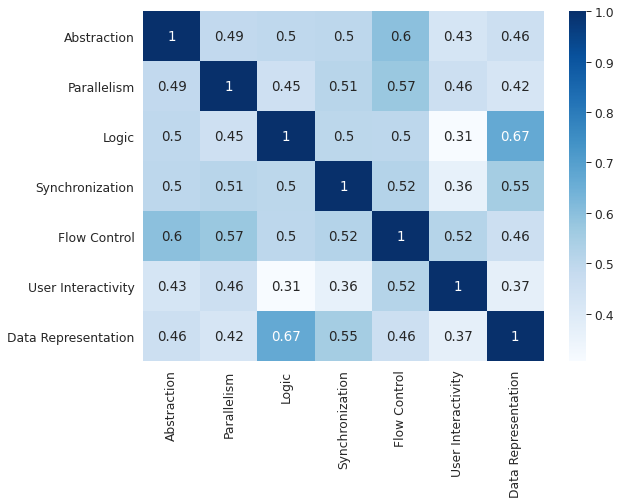

In [45]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
corr_matrix= df_ct.corr(method='pearson')
sns.heatmap(corr_matrix, annot= True, cmap='Blues')

Una vez hallada y representada la matriz de correlación, vemos que existe una dependencia lineal débil positiva entre cada par formado por interactividad con el usuario con: lógica, sincronismo o representación de la información. Que la interactividad con el usuario guarde escasa relación con el resto de dimensiones del pesamiento computacional es perfectamente comprensible ya que los 3 puntos se consiguen únicamente porque el usuario emplee el micrófono o la cámara y esto no requiere el uso de otra destreza del pensamiento computacional.

Los mayores coeficientes de correlación, que se corresponden con una correlación positiva moderada, se obtienen entre: 
- Lógica y representación de la información, ya que al buscar y desarrollar las instrucciones y condiciones que conforman el algoritmo para resolver el problema también aumenta la capacidad para dar a cada objeto y al programa los datos que necesita para su correcta ejecución.
- Abstracción y flujo de control del programa, pues la capacidad de abstraer cuáles son las partes en las que dividir el problema e instanciar objetos o clones cuando se requiera que hagan las mismas instrucciones, debe estar relacionado con poder ejecutar un algoritmo para controlar el comportamiento de los objetos ante distintos eventos. 
- Paralelismo y flujo de control del programa, ya que la capacidad de ejecutar varias acciones al mismo tiempo no tendría que estar tan relacionada con que una de ellas establezca una condición de control que dependa de cierto evento en el programa.
- Sincronismo y representación de la información, como en la anterior correlación, también resulta extraño que el hecho de poder establecer el orden en que las acciones ocurren se relacione con establecer la información relativa a cada objeto,

### Distribución de las 7 dimensiones del pensamiento computacional por puntuación total: correlaciones y reparto de proyectos entre las distintas dimensiones para cada puntuación.

In [46]:
total_score = df_dr_scratch["Total"].sort_values().unique().tolist()
ct = df_ct.columns.values.tolist()
df_total_group = df_dr_scratch.groupby("Total")

In [47]:
df_total_group.head()

,Project,Total,Average,Level,Abstraction,Parallelism,Logic,Synchronization,Flow Control,User Interactivity,Data Representation,Default sprite names,Default backdrop names,Duplicate scripts,Dead code
0,0000000000000000000_2019_10_31_16_23_19_855098...,7,1.000000,Basic,0,2,1,1,1,1,1,1,1,0,0
1,000_2020_02_10_20_36_07_266406.sb3,21,3.000000,Proficiency,3,3,3,3,3,3,3,0,0,1,1
2,001_2019_10_06_01_02_56_507455.sb3,9,1.285714,Developing,0,1,2,1,1,1,3,1,3,0,0
3,001_2020_02_20_17_27_00_734651.sb3,3,0.428571,Basic,0,2,0,0,1,0,0,0,0,0,0
4,002_2020_02_20_17_30_48_272929.sb3,6,0.857143,Basic,0,1,0,1,1,2,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3055,ödevim1_2021_01_13_21_26_00_120815.sb3,2,0.285714,Basic,0,1,0,0,0,1,0,0,0,0,0
3181,Progetto_Scratch_2019_10_14_10_40_57_478921.sb3,2,0.285714,Basic,0,1,0,0,1,0,0,0,1,0,0
3182,Progetto_Scratch_2019_10_14_10_53_50_158643.sb3,1,0.142857,Basic,0,0,0,1,0,0,0,1,1,0,4
3689,Scratch_Project_1234_2020_02_12_11_41_47_54441...,1,0.142857,Basic,0,0,0,0,0,1,0,0,1,0,0


--> Score: 0


,Abstraction,Parallelism,Logic,Synchronization,Flow Control,User Interactivity,Data Representation
17,0,0,0,0,0,0,0
18,0,0,0,0,0,0,0
23,0,0,0,0,0,0,0
30,0,0,0,0,0,0,0
36,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
269559,0,0,0,0,0,0,0
269606,0,0,0,0,0,0,0
269623,0,0,0,0,0,0,0
269746,0,0,0,0,0,0,0


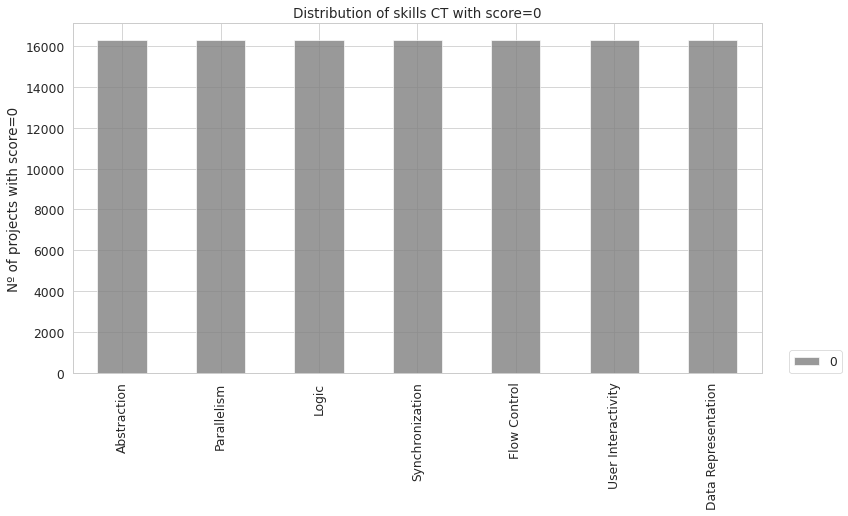

In [48]:
# Distribución de puntos por proyectos
def df_distrib_score(x, ct):
   return df_total_group.get_group(x).filter(ct)


def df_correlation_bar_chart(score, ct):
    print("--> Score:", score)
    df = df_distrib_score(score, ct).iloc[:, :].apply(pd.value_counts).fillna(0)
    df.T.plot.bar(align = 'center', color={0: "grey", 1: "red", 2:"orange", 3:"blue"}, alpha=0.8)
    plt.legend(loc=(1.04,0))
    title = "Distribution of skills CT with score=" + str(score)
    ylabel= "Nº of projects with score=" + str(score)
    plt.title(title)
    plt.ylabel(ylabel)
    display(df_distrib_score(score,ct))
    plt.show()
    if score == 21:
        display(df.var())
        display(df.corr())
    elif score != 0:# or score !=21:
        print("Matriz de correlación entre las 7 dimensiones para la puntuación", score)
        display(df.corr())
        sns.heatmap(df.corr(), annot= True, cmap='Blues')
        plt.show()               
df_correlation_bar_chart(0, ct)

**Si la puntuación total es 0,** la puntuación para cada dimensión del pensamiento computacional (CT) también será 0. Hay 16289 proyectos con esa puntuación.

--> Score: 1


,Abstraction,Parallelism,Logic,Synchronization,Flow Control,User Interactivity,Data Representation
379,0,0,0,0,0,1,0
2144,0,0,0,0,1,0,0
3182,0,0,0,1,0,0,0
3689,0,0,0,0,0,1,0
3690,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
266415,0,0,0,0,0,1,0
266794,0,0,0,0,0,1,0
267337,0,0,0,0,1,0,0
267338,0,0,0,0,1,0,0


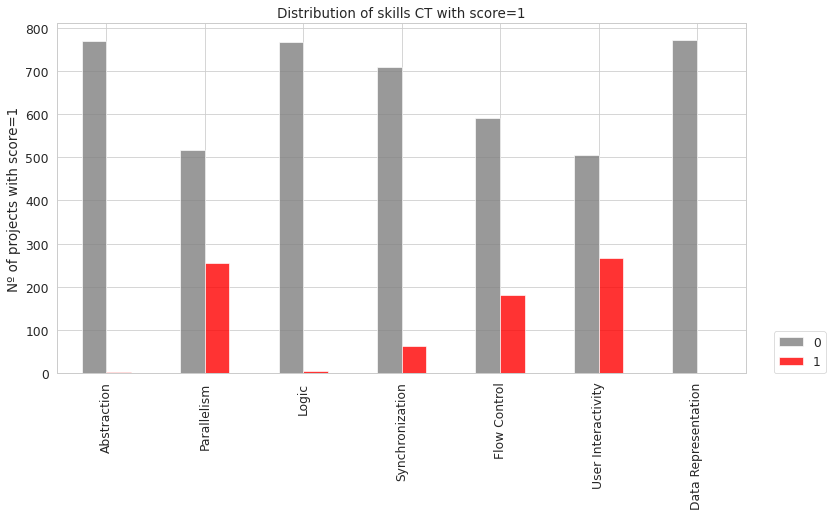

Matriz de correlación entre las 7 dimensiones para la puntuación 1


,Abstraction,Parallelism,Logic,Synchronization,Flow Control,User Interactivity,Data Representation
Abstraction,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Parallelism,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Logic,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Synchronization,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Flow Control,1.0,1.0,1.0,1.0,1.0,1.0,1.0
User Interactivity,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Data Representation,1.0,1.0,1.0,1.0,1.0,1.0,1.0


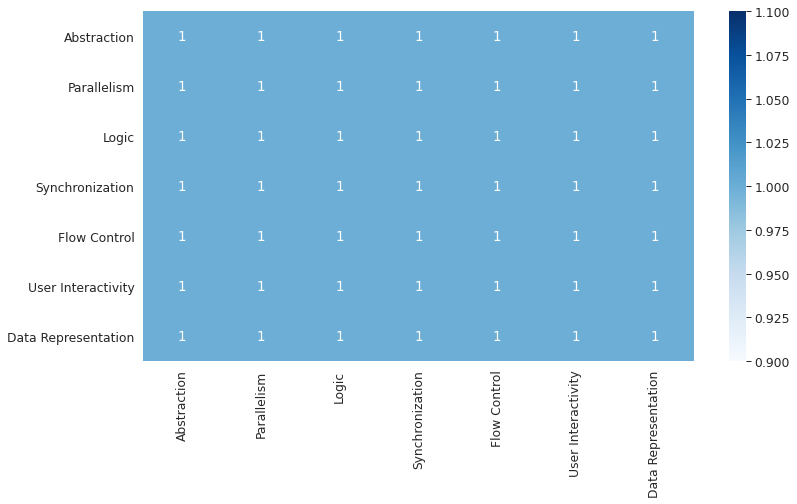

In [49]:
df_correlation_bar_chart(1, ct)

**Cuando la puntuación total es 1**, aumenta paralelismo o interactividad con el usuario, y en menor medida flujo de control y sincronismo, según vemos en el diagrama de barras. Éstas son las primeras dimensiones que se desarrollan cuando los programadores comienzan a utilizar Dr. Scratch.

Al aumentar 1 punto la puntuación total desde 0 la matriz de correlación muestra una correlación perfecta positiva para cada par de dimensiones del pensamiento computacional (CT).

--> Score: 2


,Abstraction,Parallelism,Logic,Synchronization,Flow Control,User Interactivity,Data Representation
147,0,1,0,0,0,1,0
549,0,1,0,0,0,1,0
3054,0,1,0,0,0,1,0
3055,0,1,0,0,0,1,0
3181,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...
266375,0,0,0,0,0,2,0
266692,0,1,0,0,0,1,0
266735,0,1,0,0,0,1,0
268559,0,0,0,0,0,2,0


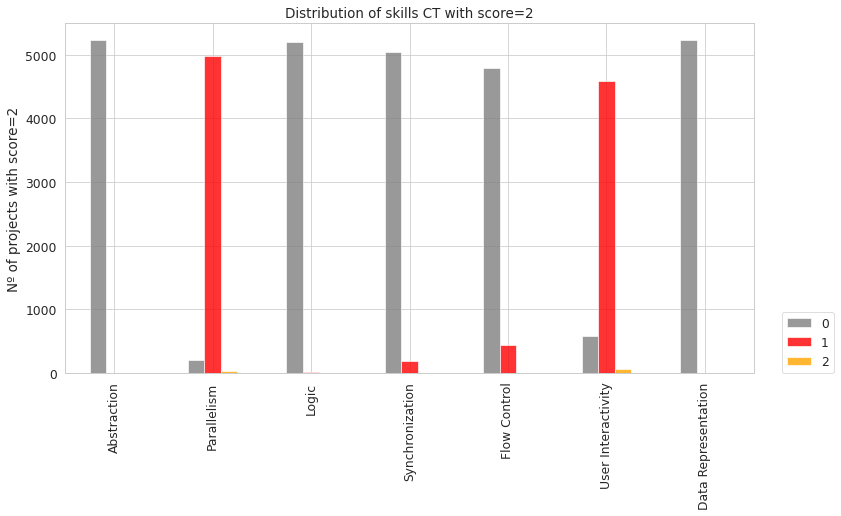

Matriz de correlación entre las 7 dimensiones para la puntuación 2


,Abstraction,Parallelism,Logic,Synchronization,Flow Control,User Interactivity,Data Representation
Abstraction,1.000000,-0.473283,0.999997,0.999536,0.996570,-0.406538,1.000000
Parallelism,-0.473283,1.000000,-0.471073,-0.446233,-0.398760,0.997237,-0.473867
Logic,0.999997,-0.471073,1.000000,0.999609,0.996774,-0.404246,0.999995
Synchronization,0.999536,-0.446233,0.999609,1.000000,0.998628,-0.378523,0.999516
Flow Control,0.996570,-0.398760,0.996774,0.998628,1.000000,-0.329536,0.996515
User Interactivity,-0.406538,0.997237,-0.404246,-0.378523,-0.329536,1.000000,-0.407144
Data Representation,1.000000,-0.473867,0.999995,0.999516,0.996515,-0.407144,1.000000


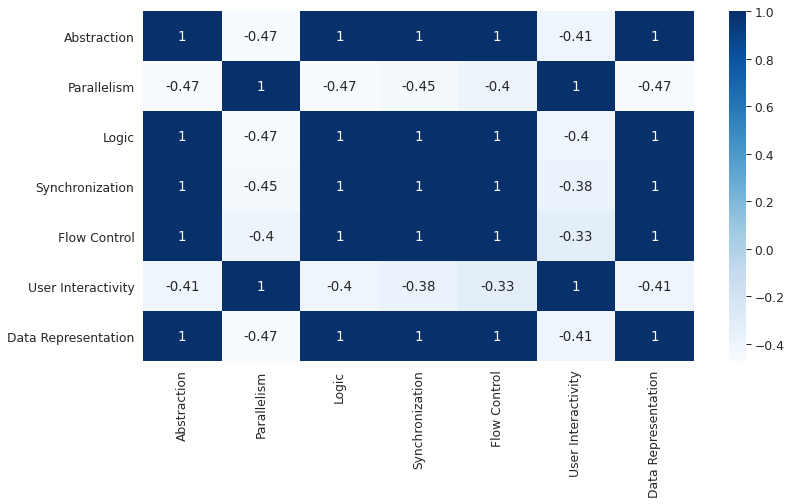

In [50]:
df_correlation_bar_chart(2, ct)

**Cuando la puntuación total es 2**, la mayor parte de los proyectos cuentan con 1 punto en paralelismo e interactividad con el usuario.

En cuanto a la matriz de correlación aquellos pares de variables en los que la correlación no es perfecta y positiva, tienen una correlación débil y negativa. La correlación es perfecta y positiva entre lógica y abstracción. La capacidad para organizar de manera coherente el algoritmo del programa y ajustarlo a los distintos eventos que puedan ocurrir está relacionado con la capacidad para deducir en qué partes se divide el programa. Es perfecta y positiva entre sincronismo y abstracción, pues ser capaz de distinguir las distintas partes en que se divide el programa para resolver el problema está relacionado con ser capaz de establecer el orden más adecuado de instrucciones para resolverlo. Es además perfecta y positiva entre: flujo de control y abstracción, lógica y representación de la información, lógica y flujo de control, lógica y sincronismo, paralelismo e interactividad con el usuario, sincronismo y representación de la información, sincronismo y flujo de control, y flujo de control y representación de la información.
La correlación más débil que hace que según aumenta una variable disminuya la otra se da entre interactividad con el usuario y flujo de control. Este hecho es remarcable ya que según el usuario realiza cierta actividad, moviendo o pulsando personajes, objetos y escenarios, el programador debería ser capaz de aumentar su capacidad para coordinar las instrucciones que conforman su programa.

--> Score: 3


,Abstraction,Parallelism,Logic,Synchronization,Flow Control,User Interactivity,Data Representation
3,0,2,0,0,1,0,0
74,0,1,0,0,1,1,0
342,0,1,0,0,1,1,0
344,0,2,0,0,0,1,0
349,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...
269458,0,1,0,0,1,1,0
269459,0,1,0,0,1,1,0
269517,0,1,0,1,1,0,0
269518,0,1,0,1,1,0,0


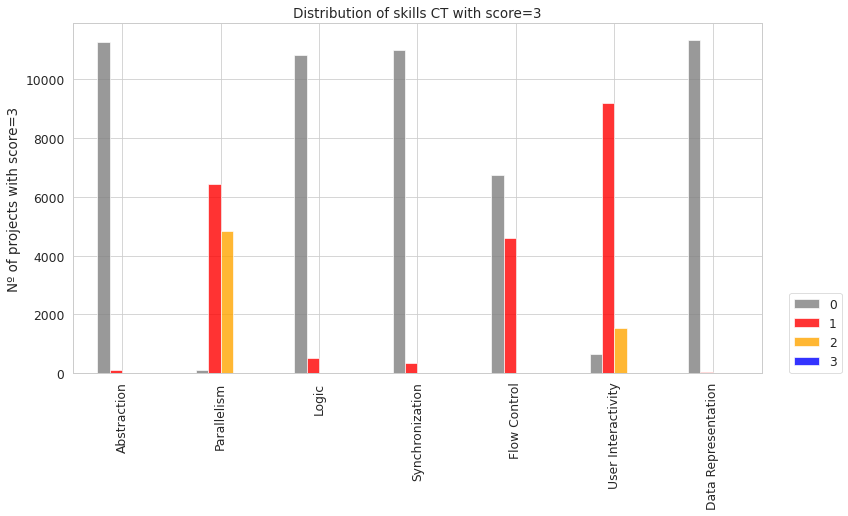

Matriz de correlación entre las 7 dimensiones para la puntuación 3


,Abstraction,Parallelism,Logic,Synchronization,Flow Control,User Interactivity,Data Representation
Abstraction,1.000000,-0.551533,0.999305,0.999807,0.773720,-0.332988,0.999975
Parallelism,-0.551533,1.000000,-0.529917,-0.539922,-0.059680,0.810310,-0.555729
Logic,0.999305,-0.529917,1.000000,0.999844,0.796797,-0.298112,0.999018
Synchronization,0.999807,-0.539922,0.999844,1.000000,0.786000,-0.314609,0.999645
Flow Control,0.773720,-0.059680,0.796797,0.786000,1.000000,0.332663,0.769240
User Interactivity,-0.332988,0.810310,-0.298112,-0.314609,0.332663,1.000000,-0.339571
Data Representation,0.999975,-0.555729,0.999018,0.999645,0.769240,-0.339571,1.000000


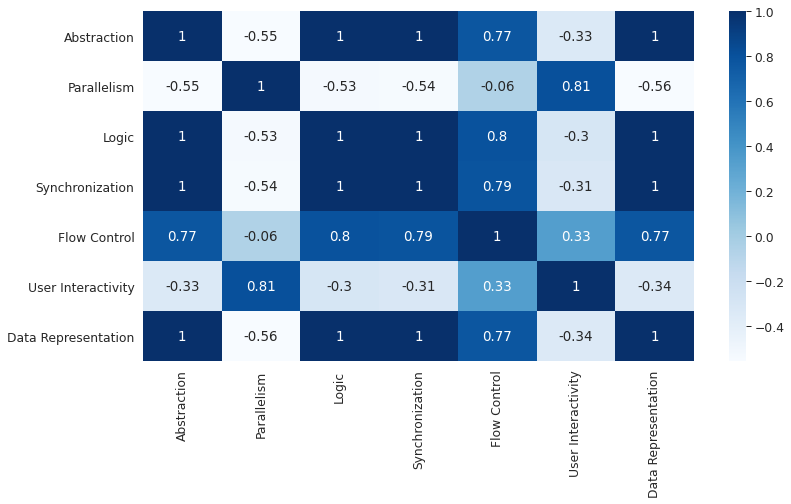

In [51]:
df_correlation_bar_chart(3, ct)

**Con una puntuación total de 3** aparte de bastantes proyectos con 1 o 2 puntos en paralelismo, 1 punto en interactividad con el usuario, también encontramos más de 4000 proyectos con 1 punto en flujo de control, como se aprecia en el diagrama de barras. 

Aparecen en la matriz de correlación valores próximos a uno que indicarían una dependencia lineal positiva perfecta, como la que se da entre abstracción y representación de la información, entre abstracción y sincronismo, entre abstracción y lógica. También hay una correlación positiva perfecta entre lógica y sincronismo, entre lógica y representación de la información, entre sincronismo y representación de la información. Es significativo porque prácticamente todos los proyectos tienen 0 puntos en estas variables. 
Entre paralelismo e interactividad con el usuario hay una correlación positiva alta, igual que entre flujo de control y lógica y entre flujo de control y sincronismo.
No hay dependencia lineal entre flujo de control y paralelismo. Hay una correlación negativa moderada entre: representación de la información y paralelismo, abstracción y paralelismo, lógica y paralelismo, y sincronismo y paralelismo. Es extraño que según aumenta una de las variables disminuya la otra, en estos casos, ya que el aumento en la capacidad para realizar tareas simultáneamente, no tiene por qué disminuir a la capacidad para establecer la información necesaria de los distintos objetos del proyecto del programa o a la habilidad para reconocer el problema y ser capaz de establecer las condiciones que determinan la ejecución de unas tareas u otras. El hecho de que según aumenta sincronismo disminuya paralelismo es bastante contradictorio, pues si se realizan tareas simultáneas debe existir alguna forma de que se sincronicen. 

--> Score: 4


,Abstraction,Parallelism,Logic,Synchronization,Flow Control,User Interactivity,Data Representation
7,0,2,0,0,1,1,0
21,0,2,0,0,1,1,0
22,0,2,0,0,1,1,0
25,0,2,0,0,1,1,0
26,0,2,0,0,1,1,0
...,...,...,...,...,...,...,...
269407,0,2,0,0,1,1,0
269435,0,2,0,0,1,1,0
269447,0,2,0,0,1,1,0
269558,1,1,0,0,1,1,0


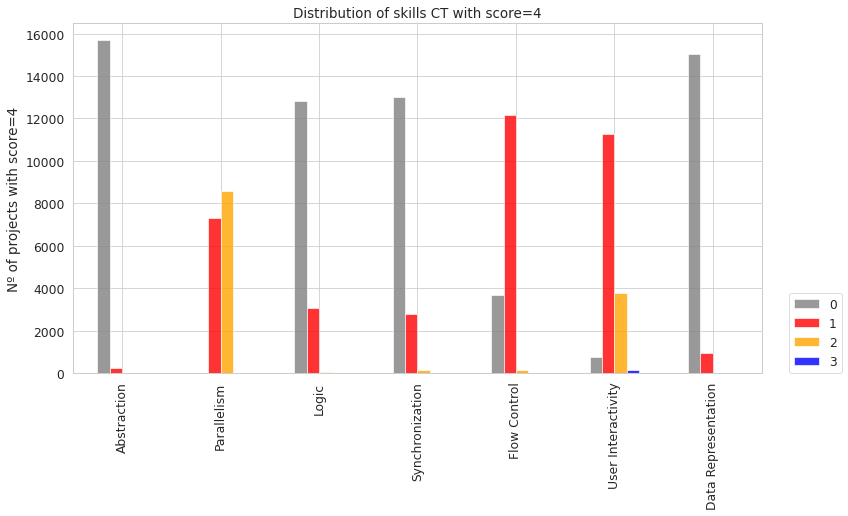

Matriz de correlación entre las 7 dimensiones para la puntuación 4


,Abstraction,Parallelism,Logic,Synchronization,Flow Control,User Interactivity,Data Representation
Abstraction,1.000000,-0.568319,0.974937,0.981020,-0.024269,-0.411687,0.998922
Parallelism,-0.568319,1.000000,-0.481907,-0.488719,0.336783,0.727209,-0.553775
Logic,0.974937,-0.481907,1.000000,0.999537,0.198756,-0.208445,0.984207
Synchronization,0.981020,-0.488719,0.999537,1.000000,0.169865,-0.233657,0.988939
Flow Control,-0.024269,0.336783,0.198756,0.169865,1.000000,0.876403,0.022136
User Interactivity,-0.411687,0.727209,-0.208445,-0.233657,0.876403,1.000000,-0.371431
Data Representation,0.998922,-0.553775,0.984207,0.988939,0.022136,-0.371431,1.000000


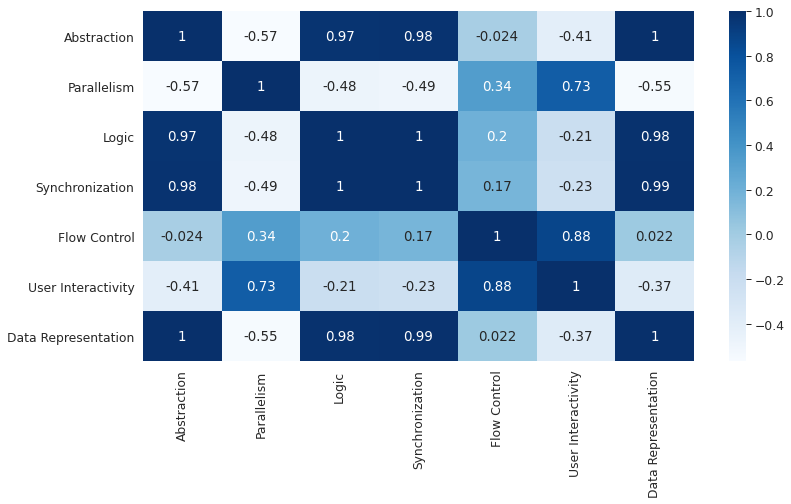

In [52]:
df_correlation_bar_chart(4, ct)

**Para la puntuación total de 4,** en el diagrama de barras se aprecia que hay muchos proyectos con 0 puntos en abstracción, lógica, sicronismo y representación de la información. Sin embargo aumenta el nº de proyectos con un punto en lógica, en sincronismo y en flujo de control.

En la matriz de correlación hay una correlación casi perfecta positiva entre lógica y abstracción, sincronismo y abstracción, entre lógica y representación de la información y entre sincronismo y representación de los datos. Existe elevada dependencia lineal pero también es elevado el nº de proyectos con puntuación de cero en estas dimensiones.
Sincronismo y lógica, abstracción y representación de la información presentan una correlación perfecta positiva.
No existe correlación o dependencia lineal entre flujo de control y representación de la información o los datos, ni entre flujo de control y abstracción.
Existe una correlación negativa moderada entre paralelismo y abstracción. El hecho de que varíe una de las habilidades no debería hacer disminuir la otra. De hecho se podría pensar que son independientes, pues que ciertas partes del programa se ejecuten simultáneamente puede chocar con la idea de descomponer el programa en partes más pequeñas. También se da este tipo de correlación negativa entre paralelismo y representación de la información. El hecho de que se ejecuten partes del programa en el mismo momento no tendría que influir en cómo se almacene la información relativa a los objetos del programa.

--> Score: 5


,Abstraction,Parallelism,Logic,Synchronization,Flow Control,User Interactivity,Data Representation
27,0,1,0,0,2,2,0
28,0,1,0,0,2,2,0
110,1,2,0,0,1,1,0
128,0,2,1,0,1,1,0
354,1,2,0,0,1,1,0
...,...,...,...,...,...,...,...
269470,0,1,0,1,1,1,1
269560,0,1,0,1,1,2,0
269562,0,1,0,1,1,2,0
269591,0,1,0,1,1,1,1


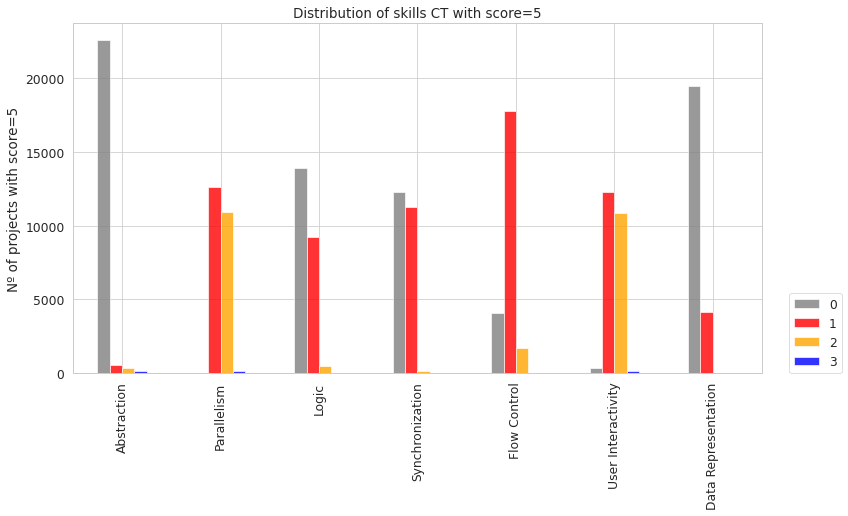

Matriz de correlación entre las 7 dimensiones para la puntuación 5


,Abstraction,Parallelism,Logic,Synchronization,Flow Control,User Interactivity,Data Representation
Abstraction,1.000000,-0.566647,0.789847,0.637273,-0.134586,-0.552451,0.979955
Parallelism,-0.566647,1.000000,-0.127774,0.024316,0.626641,0.999740,-0.461717
Logic,0.789847,-0.127774,1.000000,0.975727,0.500517,-0.120084,0.895819
Synchronization,0.637273,0.024316,0.975727,1.000000,0.674939,0.028510,0.777865
Flow Control,-0.134586,0.626641,0.500517,0.674939,1.000000,0.619960,0.063771
User Interactivity,-0.552451,0.999740,-0.120084,0.028510,0.619960,1.000000,-0.449211
Data Representation,0.979955,-0.461717,0.895819,0.777865,0.063771,-0.449211,1.000000


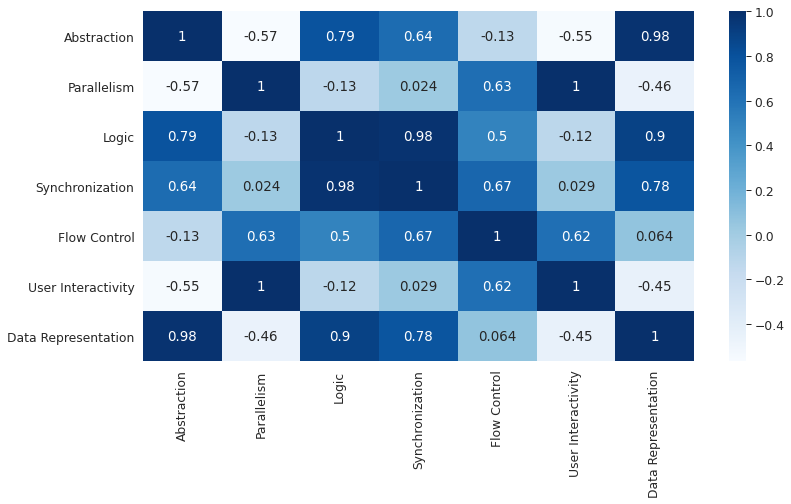

In [53]:
df_correlation_bar_chart(5, ct)

**Para la puntuación total de 5,** Según se aprecia en el diagrama de barras, se obtienen 1 punto en gran cantidad de proyectos analizados con Dr. Scratch. En paralelismo y en interactividad con el usuario es donde mayor puntuación se consigue (2 puntos).

Al aumentar la puntuación total, hay menos pares de variables o dimensiones con coeficiente de correlación perfecto. Las máximas correlaciones en sentido positivo se producen entre paralelismo e interactividad con el usuario, y en menor medida entre representación de la información y abstracción, entre sincronismo y lógica y entre representación de la información y lógica. Es de extrañar que no exista correlación entre sincronismo y paralelismo, ya que si se ejecutan varios conjuntos de bloques en paralelo tiene que existir alguna manera para que puedan sincronizarse los procesos. Vuelve a aparecer una correlación moderada en sentido negativo entre paralelismo y abstracción con el mismo coeficiente que en el caso de puntuación total de 4 puntos. También se obtiene una correlación de este tipo entre interactividad con el usuario y abstracción.

--> Score: 6


,Abstraction,Parallelism,Logic,Synchronization,Flow Control,User Interactivity,Data Representation
4,0,1,0,1,1,2,1
123,0,2,1,1,1,1,0
124,0,2,1,1,1,1,0
152,0,1,1,1,1,1,1
153,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...
269633,0,2,0,1,1,1,1
269638,0,2,0,1,1,1,1
269736,0,1,0,3,1,1,0
269737,0,1,0,3,1,1,0


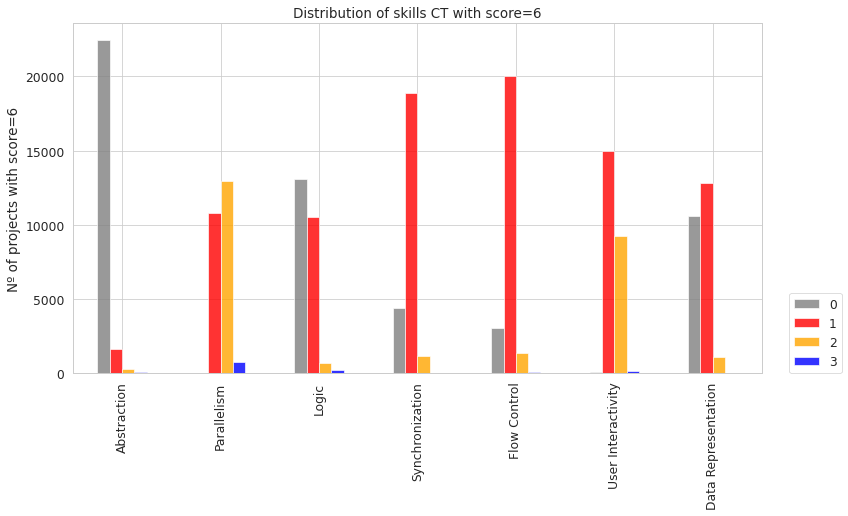

Matriz de correlación entre las 7 dimensiones para la puntuación 6


,Abstraction,Parallelism,Logic,Synchronization,Flow Control,User Interactivity,Data Representation
Abstraction,1.000000,-0.584224,0.744392,-0.068120,-0.155196,-0.503880,0.513154
Parallelism,-0.584224,1.000000,-0.206125,0.394991,0.444385,0.896432,0.017357
Logic,0.744392,-0.206125,1.000000,0.615373,0.543979,0.101879,0.954719
Synchronization,-0.068120,0.394991,0.615373,1.000000,0.996157,0.755716,0.821199
Flow Control,-0.155196,0.444385,0.543979,0.996157,1.000000,0.793809,0.768152
User Interactivity,-0.503880,0.896432,0.101879,0.755716,0.793809,1.000000,0.369472
Data Representation,0.513154,0.017357,0.954719,0.821199,0.768152,0.369472,1.000000


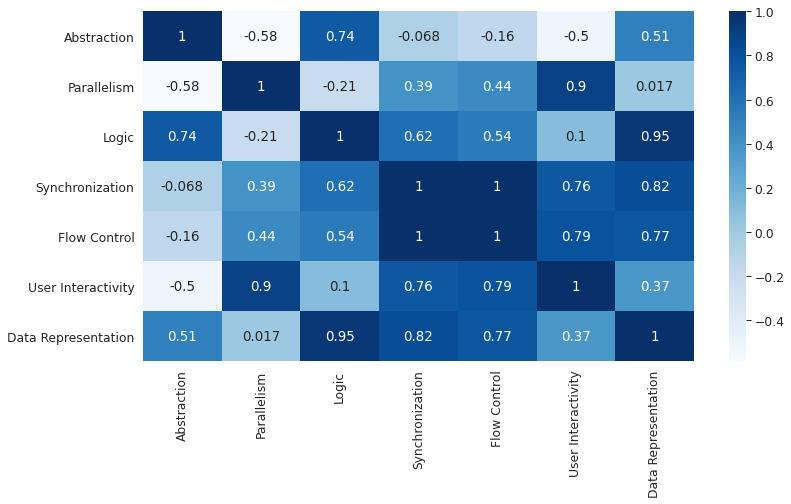

In [54]:
df_correlation_bar_chart(6, ct)

**Para la puntuación total de 6**, se obtienen en el diagrama de barras mayor nº de proyectos cuyas dimensiones cuentan con puntuación de 1.

Paralelismo y abstracción obtienen una correlación moderada en sentido negativo similar a la puntuación anterior. No hay correlación entre abstracción y sincronismo ni entre paralelismo y representación de los datos. Las mayores correlaciones se obtienen entre: flujo de control y sincronismo, de modo que la capacidad del programador para establecer las condiciones de control del programa afecta al orden en que se ejecutan las instrucciones en el programa; entre lógica y representación de los datos, hecho que resulta extraño, ya que tener una alta capacidad para buscar la solución al problema e implementar distintas instrucciones en función de condiciones, no tiene por qué influir en almacenar de manera apropiada la información que necesitan los objetos del proyecto. También es extraño que entre paralelismo e interactividad con el usuario exista una elevada correlación ya que poder ejecutar secuencias de bloques de manera simultánea no tiene por qué influir con ejecutar un conjunto de bloques que esperan que el usuario realice ciertas acciones o movimientos con los objetos del programa.

--> Score: 7


,Abstraction,Parallelism,Logic,Synchronization,Flow Control,User Interactivity,Data Representation
0,0,2,1,1,1,1,1
32,1,2,0,1,1,1,1
33,1,2,0,1,1,1,1
41,1,1,0,1,1,2,1
42,1,1,0,1,1,2,1
...,...,...,...,...,...,...,...
269738,0,1,0,3,1,1,1
269758,2,2,0,0,2,1,0
269759,2,2,0,0,2,1,0
269760,0,2,1,1,1,1,1


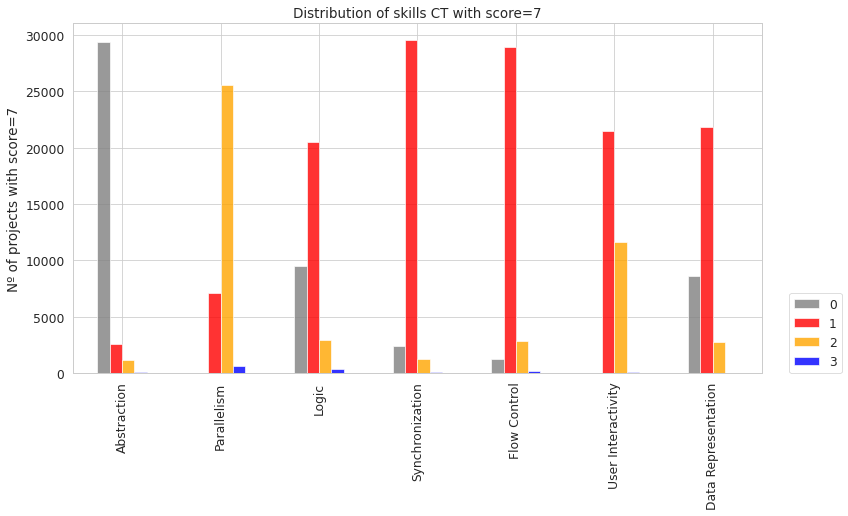

Matriz de correlación entre las 7 dimensiones para la puntuación 7


,Abstraction,Parallelism,Logic,Synchronization,Flow Control,User Interactivity,Data Representation
Abstraction,1.000000,-0.451401,0.157845,-0.214107,-0.273166,-0.471785,0.089990
Parallelism,-0.451401,1.000000,-0.174036,-0.071771,0.003107,0.466706,-0.145403
Logic,0.157845,-0.174036,1.000000,0.927871,0.906526,0.711288,0.997661
Synchronization,-0.214107,-0.071771,0.927871,1.000000,0.996779,0.847224,0.950751
Flow Control,-0.273166,0.003107,0.906526,0.996779,1.000000,0.885518,0.933243
User Interactivity,-0.471785,0.466706,0.711288,0.847224,0.885518,1.000000,0.749569
Data Representation,0.089990,-0.145403,0.997661,0.950751,0.933243,0.749569,1.000000


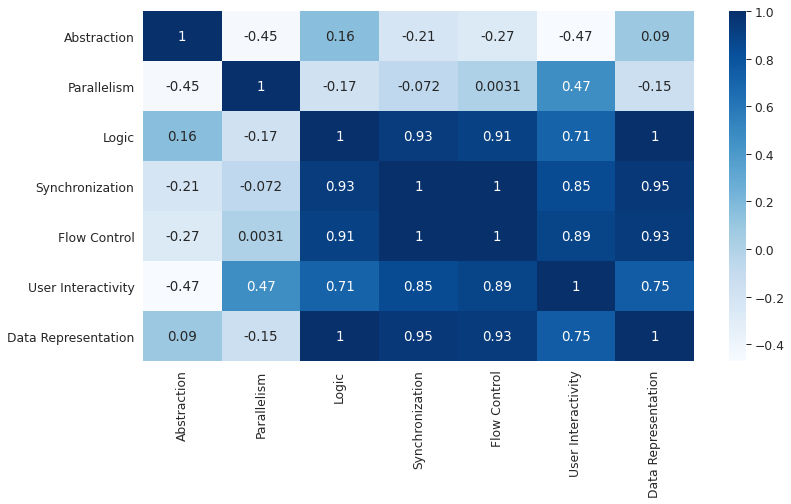

In [55]:
df_correlation_bar_chart(7, ct)

**Para la puntuación total de 7**, lo más destacable en la representación de frecuencias es que el nº de proyectos con una puntuación de 2 en paralelismo aumenta.

La correlación es perfecta positiva entre flujo de control y sincronismo y entre lógica y representación de los datos. Se alcanzan valores elevados entre lógica y sincronismo, representación de la información y sincronismo, flujo de control y lógica, interactividad del usuario y flujo de control, entre interactividad del usuario y sincronismo y entre interactividad del usuario y flujo de control. Que no exista correlación entre sincronismo y paralelismo, es muy extraño ya que si se ejecuta código en paralelo de manera simultánea tiene que existir alguna manera de hacer que se sincronicen las tareas. Tampoco existe correlación entre abstracción y representación de la información. Esto tiene sentido porque quien es capaz de descomponer el problema en partes más pequeñas no tiene por qué haber almacenado correctamente la información relativa a los objetos del programa.

--> Score: 8


,Abstraction,Parallelism,Logic,Synchronization,Flow Control,User Interactivity,Data Representation
52,0,1,1,1,1,2,2
58,0,2,1,1,2,2,0
160,1,2,0,2,2,1,0
171,3,2,0,0,2,1,0
186,3,2,0,0,2,1,0
...,...,...,...,...,...,...,...
269642,1,2,0,1,1,2,1
269643,1,2,0,1,1,2,1
269644,1,2,0,1,1,2,1
269668,0,1,1,1,1,2,2


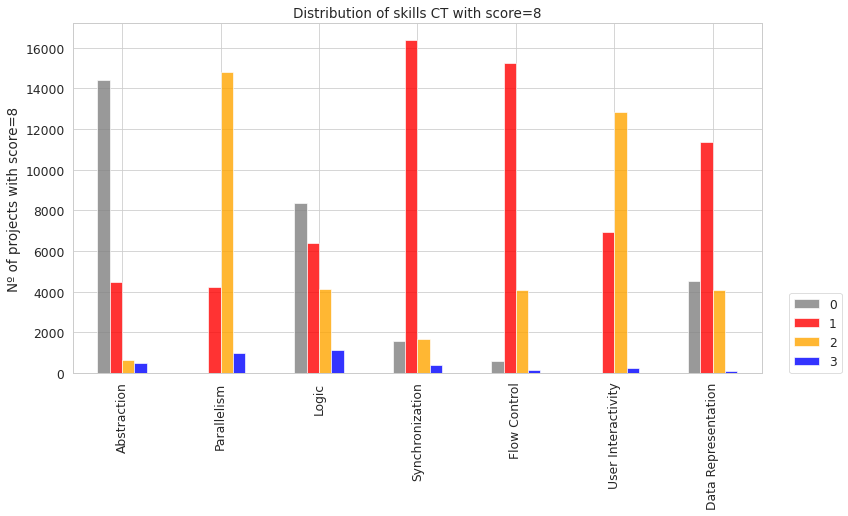

Matriz de correlación entre las 7 dimensiones para la puntuación 8


,Abstraction,Parallelism,Logic,Synchronization,Flow Control,User Interactivity,Data Representation
Abstraction,1.000000,-0.536895,0.853408,-0.022769,-0.154089,-0.504694,0.196164
Parallelism,-0.536895,1.000000,-0.169723,-0.036071,0.170398,0.957282,0.083024
Logic,0.853408,-0.169723,1.000000,0.353669,0.290598,-0.038871,0.619390
Synchronization,-0.022769,-0.036071,0.353669,1.000000,0.978270,0.253320,0.935759
Flow Control,-0.154089,0.170398,0.290598,0.978270,1.000000,0.446218,0.931156
User Interactivity,-0.504694,0.957282,-0.038871,0.253320,0.446218,1.000000,0.358504
Data Representation,0.196164,0.083024,0.619390,0.935759,0.931156,0.358504,1.000000


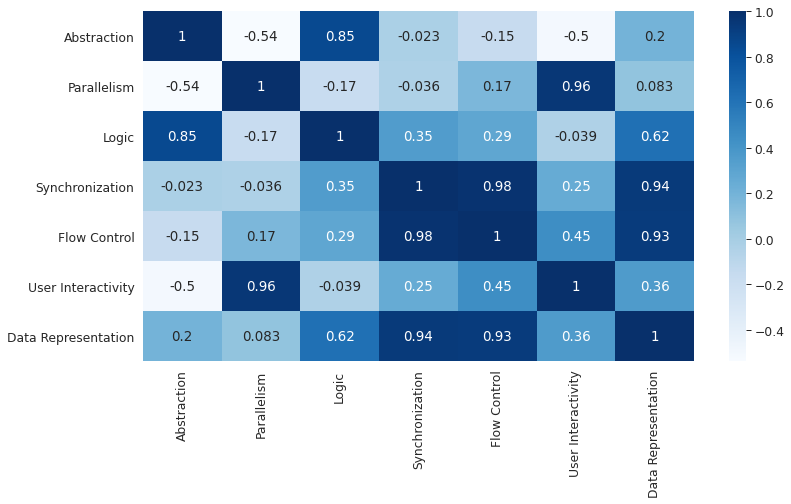

In [56]:
df_correlation_bar_chart(8, ct)

**Para la puntuación total de 8** en abstracción las puntuaciones siguen siendo bajas como se ve en el diagrama de barras.

En la matriz de correlación se obtiene de nuevo una elevada correlación entre flujo de control y sincronismo. También se obtiene una correlación muy alta y en sentido positivo entre paralelismo e interactividad con el usuario, entre flujo de control y representación de la información, entre sincronismo y representación de los datos, así como entre lógica y abstracción. Entre sincronismo y paralelismo es extraño que no exista correlación o dependencia lineal, pues si se ejecutan instrucciones en paralelo debe de desarrollarse la capacidad de poder sincronizarlas. Tampoco existe correlación entre interactividad con el usuario y lógica. Se consigue de nuevo una correlación moderada en sentido negativo entre paralelismo y abstracción.

--> Score: 9


,Abstraction,Parallelism,Logic,Synchronization,Flow Control,User Interactivity,Data Representation
2,0,1,2,1,1,1,3
67,1,2,2,1,1,1,1
68,1,2,2,1,1,1,1
75,0,2,1,1,1,2,2
121,3,2,0,1,2,1,0
...,...,...,...,...,...,...,...
269605,0,2,1,1,1,2,2
269608,1,1,1,1,1,2,2
269619,0,2,1,1,1,2,2
269624,2,2,0,1,2,2,0


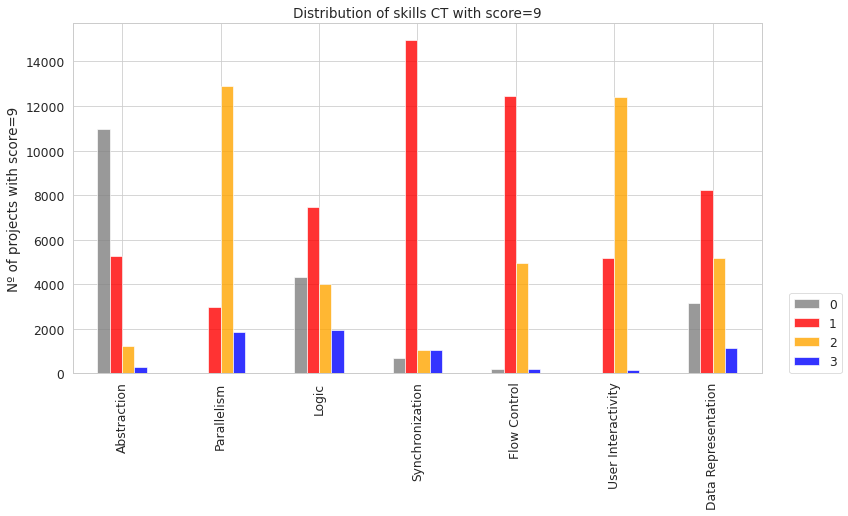

Matriz de correlación entre las 7 dimensiones para la puntuación 9


,Abstraction,Parallelism,Logic,Synchronization,Flow Control,User Interactivity,Data Representation
Abstraction,1.000000,-0.552561,0.411074,0.089666,-0.060441,-0.424215,0.135773
Parallelism,-0.552561,1.000000,-0.026076,-0.153471,0.225673,0.961265,0.287424
Logic,0.411074,-0.026076,1.000000,0.875452,0.884545,0.250445,0.943298
Synchronization,0.089666,-0.153471,0.875452,1.000000,0.925442,0.094266,0.837592
Flow Control,-0.060441,0.225673,0.884545,0.925442,1.000000,0.463724,0.956631
User Interactivity,-0.424215,0.961265,0.250445,0.094266,0.463724,1.000000,0.538796
Data Representation,0.135773,0.287424,0.943298,0.837592,0.956631,0.538796,1.000000


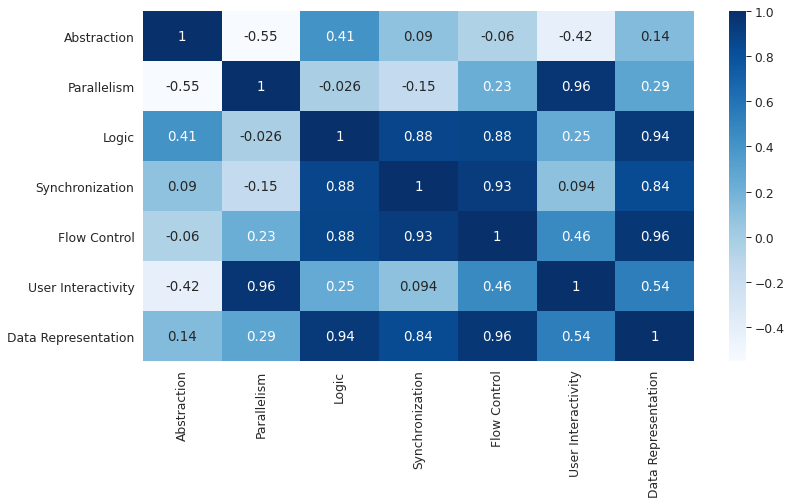

In [57]:
df_correlation_bar_chart(9, ct)

**Para la puntuación total de 9,** en la matriz de correlación se observan valores elevados próximos a 1, que indican correlación casi perfecta, en lógica con representación de la información, en paralelismo con interactividad con el usuario, en flujo de control con representación de la información y algo menores pero también elevadas en sincronismo con lógica y en flujo de control con lógica. Sigue sin existir correlación entre flujo de control y abstracción, entre sincronismo y abstracción y entre sincronismo y paralelismo resultando igual de extraño que en las correlaciones de  las puntuaciones anteriores.
Se vuelve además a obtener una correlación negativa moderada entre paralelismo y abstracción similar a la que se obtiene en puntuaciones anteriores.

--> Score: 10


,Abstraction,Parallelism,Logic,Synchronization,Flow Control,User Interactivity,Data Representation
14,0,1,3,1,1,1,3
15,0,1,3,1,1,1,3
34,1,2,1,1,2,2,1
86,2,2,0,1,3,2,0
106,1,2,2,1,1,2,1
...,...,...,...,...,...,...,...
269704,1,1,1,1,2,2,2
269748,0,1,3,2,2,2,0
269789,2,2,2,2,2,0,0
269805,0,1,3,1,1,1,3


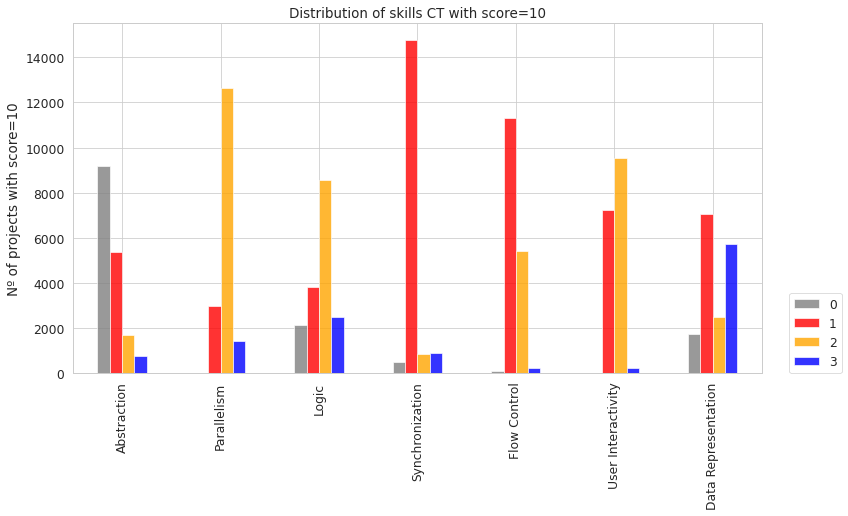

Matriz de correlación entre las 7 dimensiones para la puntuación 10


,Abstraction,Parallelism,Logic,Synchronization,Flow Control,User Interactivity,Data Representation
Abstraction,1.000000,-0.516848,-0.464137,0.165812,-0.027947,-0.306136,-0.333827
Parallelism,-0.516848,1.000000,0.997173,-0.136666,0.328478,0.837925,-0.274119
Logic,-0.464137,0.997173,1.000000,-0.084918,0.379698,0.868289,-0.270941
Synchronization,0.165812,-0.136666,-0.084918,1.000000,0.888851,0.419009,0.748503
Flow Control,-0.027947,0.328478,0.379698,0.888851,1.000000,0.788224,0.547952
User Interactivity,-0.306136,0.837925,0.868289,0.419009,0.788224,1.000000,0.100307
Data Representation,-0.333827,-0.274119,-0.270941,0.748503,0.547952,0.100307,1.000000


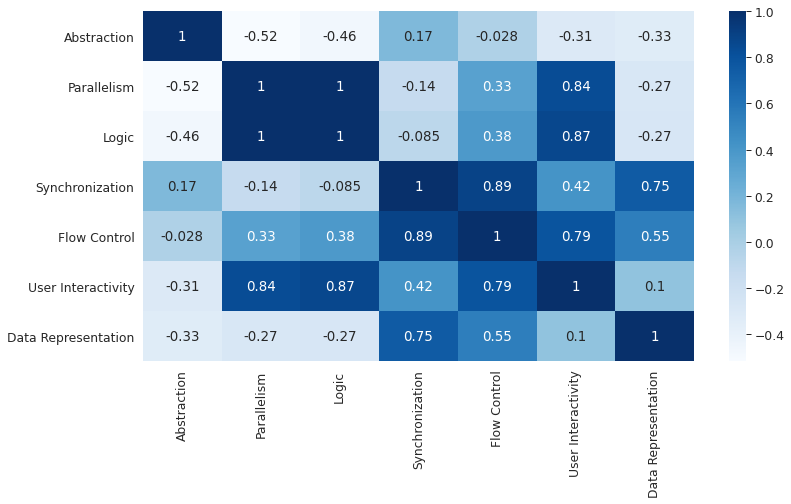

In [58]:
df_correlation_bar_chart(10, ct)

**Para la puntuación total de 10,** en el diagrama de barras destaca la obtención de 2 puntos en paralelismo, lógica e interactividad con el usuario.

Existe una correlación perfecta en sentido positivo entre lógica y paralelismo. Se consigue una correlación elevada también en sentido positivo entre lógica e interactividad con el usuario y entre esta última y paralelismo. La in
No existe correlación lineal entre flujo de control y abstracción, ni entre sincronismo y lógica, ni entre sincronismo y paralelismo. Que no exista dependencia lineal entre estas variables resulta extraño pues si se ejecutan distintos bloques de código de manera simultánea debe existir algún mecanismo para que se sincronicen esas partes de código. Igual que en la puntuación anterior se obtiene una correlación moderada en sentido negativo entre abstracción y paralelismo. Cuando se puede dividir el problema en partes más pequeñas no afecta a la ejecución de tareas de manera simultánea.

--> Score: 11


,Abstraction,Parallelism,Logic,Synchronization,Flow Control,User Interactivity,Data Representation
11,1,3,1,3,1,1,1
31,1,2,2,1,1,1,3
136,2,2,2,1,1,2,1
137,2,2,2,1,1,2,1
138,2,2,2,1,1,2,1
...,...,...,...,...,...,...,...
269433,3,3,1,1,1,1,1
269601,0,3,2,1,1,1,3
269602,0,3,2,1,1,1,3
269634,0,3,2,1,1,2,2


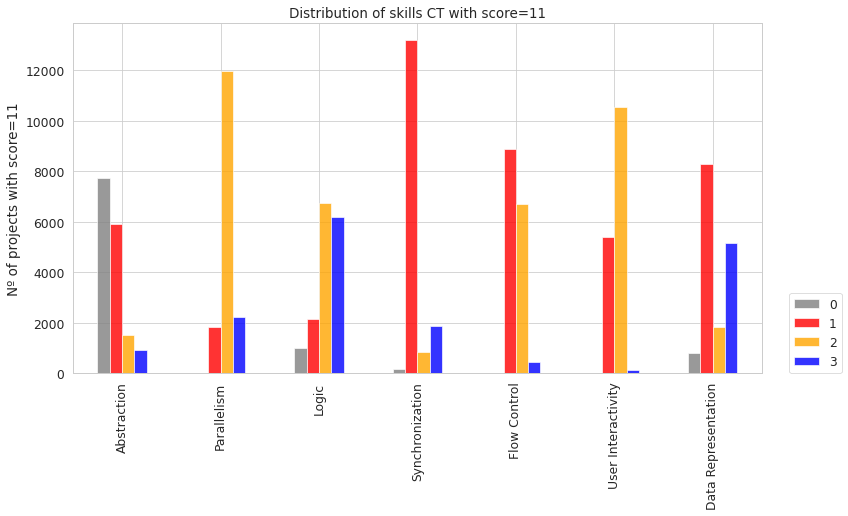

Matriz de correlación entre las 7 dimensiones para la puntuación 11


,Abstraction,Parallelism,Logic,Synchronization,Flow Control,User Interactivity,Data Representation
Abstraction,1.000000,-0.619834,-0.986392,0.282922,-0.033526,-0.330651,-0.059255
Parallelism,-0.619834,1.000000,0.731125,-0.258335,0.462121,0.885422,-0.288602
Logic,-0.986392,0.731125,1.000000,-0.353609,0.068258,0.435629,-0.060438
Synchronization,0.282922,-0.258335,-0.353609,1.000000,0.718645,0.169848,0.892743
Flow Control,-0.033526,0.462121,0.068258,0.718645,1.000000,0.806505,0.519066
User Interactivity,-0.330651,0.885422,0.435629,0.169848,0.806505,1.000000,-0.001663
Data Representation,-0.059255,-0.288602,-0.060438,0.892743,0.519066,-0.001663,1.000000


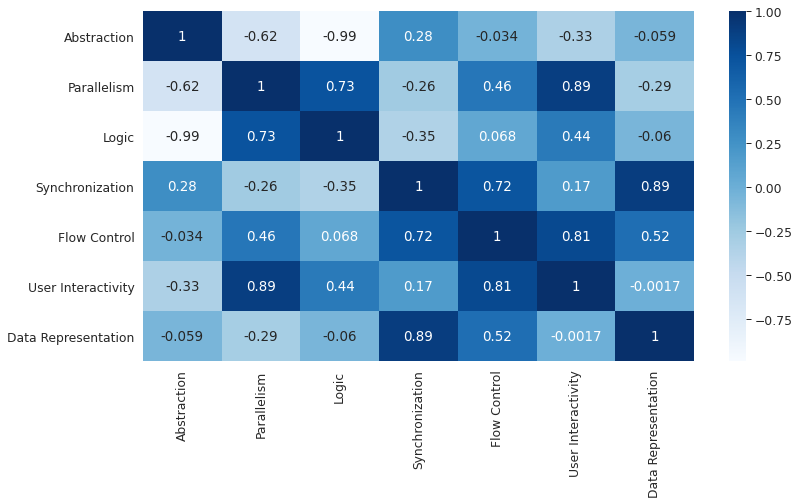

In [59]:
df_correlation_bar_chart(11, ct)

**Para la puntuación total de 11,** en el diagrama de barras destaca el aumento de proyectos que consiguen 3 puntos.

En la matriz de correlación se observan valores elevados entre interactividad con el usuario y paralelismo, entre sincronismo y representación de la información y entre flujo de control con interactividad con el usuario. No existe correlación entre: flujo de control y abstracción, entre representación de la información y abstracción, entre lógica y representación de la información, entre lógica y flujo de control, entre interactividad del usuario y representación de la información. Vuelve a existir correlación en sentido negativo, entre paralelismo y abstracción resultando igual de extraño que en las puntuaciones anteriores. También se da una correlación negativa prácticamente perfecta entre lógica y abstracción.

--> Score: 12


,Abstraction,Parallelism,Logic,Synchronization,Flow Control,User Interactivity,Data Representation
6,1,3,2,1,1,2,2
9,1,3,1,3,2,1,1
10,1,3,1,3,2,1,1
12,1,2,1,3,2,2,1
73,1,2,2,1,1,2,3
...,...,...,...,...,...,...,...
269690,2,2,2,1,2,2,1
269691,2,2,2,1,2,2,1
269692,2,2,2,1,2,2,1
269693,2,2,2,1,2,2,1


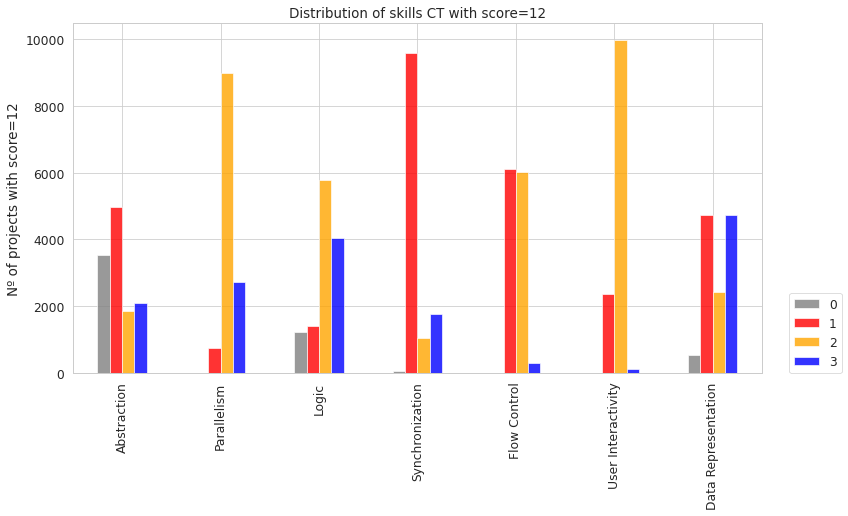

Matriz de correlación entre las 7 dimensiones para la puntuación 12


,Abstraction,Parallelism,Logic,Synchronization,Flow Control,User Interactivity,Data Representation
Abstraction,1.000000,-0.720738,-0.869872,0.776332,0.234543,-0.408189,0.130840
Parallelism,-0.720738,1.000000,0.940333,-0.326685,0.494357,0.919136,-0.023420
Logic,-0.869872,0.940333,1.000000,-0.418194,0.262304,0.734267,0.127027
Synchronization,0.776332,-0.326685,-0.418194,1.000000,0.594582,-0.090717,0.661885
Flow Control,0.234543,0.494357,0.262304,0.594582,1.000000,0.742487,0.296870
User Interactivity,-0.408189,0.919136,0.734267,-0.090717,0.742487,1.000000,-0.102929
Data Representation,0.130840,-0.023420,0.127027,0.661885,0.296870,-0.102929,1.000000


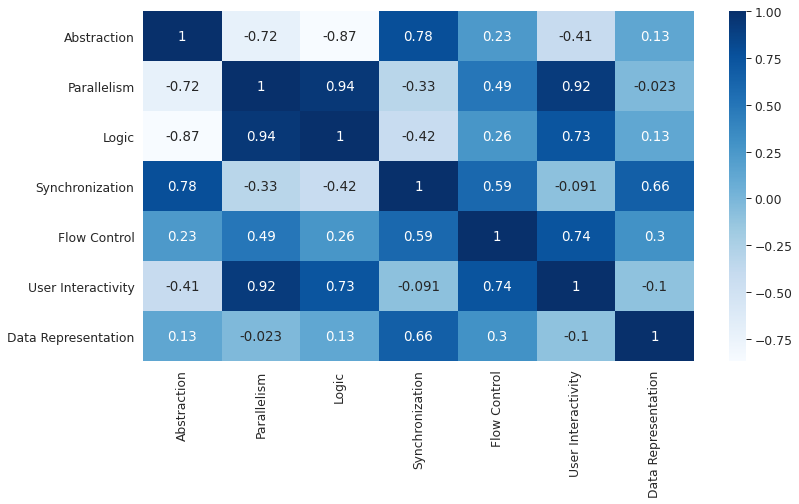

In [60]:
df_correlation_bar_chart(12, ct)

**Para la puntuación total de 12**, existe una correlación elevada en sentido positivo entre lógica y paralelismo, y entre paralelismo e interactividad con el usuario. Se da una correlación positiva menor entre sincronismo y abstracción y entre interactividad con el usuario y lógica. No existe correlación entre sincronismo e interactividad con el usuario. La correlación en sentido negativo entre paralelismo y abstracción es más próxima a -1 que en la puntuación anterior. Existe en esta puntuación una correlación negativa fuerte entre lógica y abstracción.

--> Score: 13


,Abstraction,Parallelism,Logic,Synchronization,Flow Control,User Interactivity,Data Representation
5,2,2,2,1,1,2,3
8,1,2,3,1,1,2,3
16,1,3,2,1,1,2,3
35,1,2,3,1,1,2,3
44,1,2,3,1,1,2,3
...,...,...,...,...,...,...,...
269837,1,2,2,1,2,2,3
269838,1,2,2,1,2,2,3
269839,1,2,2,1,2,2,3
269840,1,2,2,1,2,2,3


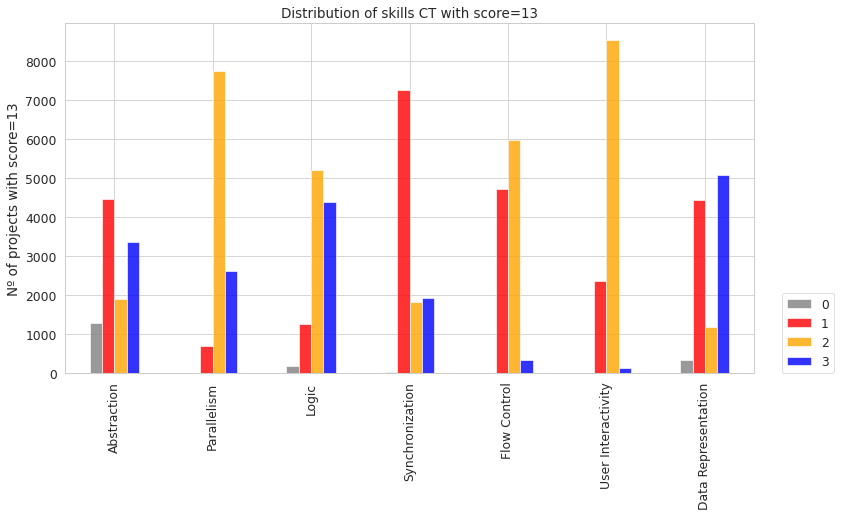

Matriz de correlación entre las 7 dimensiones para la puntuación 13


,Abstraction,Parallelism,Logic,Synchronization,Flow Control,User Interactivity,Data Representation
Abstraction,1.000000,-0.254963,0.011305,0.891255,0.242014,-0.184791,0.907080
Parallelism,-0.254963,1.000000,0.873120,-0.193508,0.624577,0.895010,-0.201819
Logic,0.011305,0.873120,1.000000,-0.149697,0.365703,0.604481,0.215552
Synchronization,0.891255,-0.193508,-0.149697,1.000000,0.539597,0.066552,0.619662
Flow Control,0.242014,0.624577,0.365703,0.539597,1.000000,0.871231,-0.036626
User Interactivity,-0.184791,0.895010,0.604481,0.066552,0.871231,1.000000,-0.327234
Data Representation,0.907080,-0.201819,0.215552,0.619662,-0.036626,-0.327234,1.000000


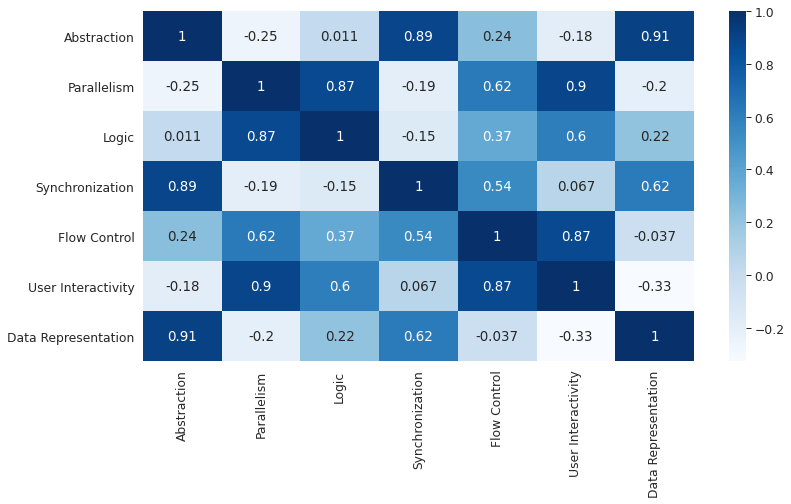

In [61]:
df_correlation_bar_chart(13, ct)

**Para la puntuación total de 13**, se obtiene una correlación positiva fuerte entre sincronismo y abstracción, entre representación de la información y abstracción, entre lógica y paralelismo y entre paralelismo e interactividad con el usuario. No existe dependencia lineal entre interactividad del usuario con sincronismo, entre flujo de control y representación de la información, ni entre lógica y abstracción.

--> Score: 14


,Abstraction,Parallelism,Logic,Synchronization,Flow Control,User Interactivity,Data Representation
13,1,2,2,2,2,2,3
40,1,3,2,2,1,2,3
83,3,2,1,3,3,2,0
143,1,3,2,3,2,2,1
144,2,2,2,1,2,2,3
...,...,...,...,...,...,...,...
269778,1,3,2,3,2,2,1
269779,1,3,2,3,2,2,1
269792,1,3,2,1,2,2,3
269826,1,2,2,1,3,2,3


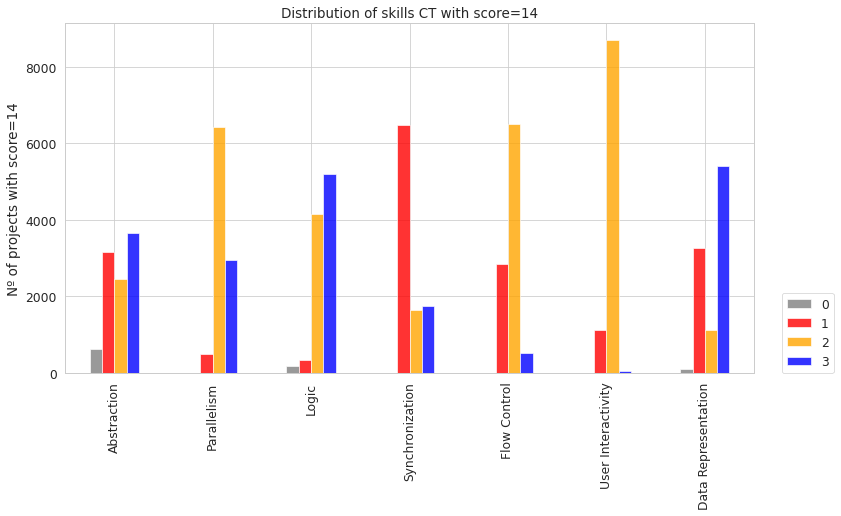

Matriz de correlación entre las 7 dimensiones para la puntuación 14


,Abstraction,Parallelism,Logic,Synchronization,Flow Control,User Interactivity,Data Representation
Abstraction,1.000000,0.320213,0.580818,0.581388,0.211081,0.044082,0.894355
Parallelism,0.320213,1.000000,0.783944,-0.218375,0.783819,0.875581,0.016988
Logic,0.580818,0.783944,1.000000,-0.287863,0.281322,0.386916,0.517490
Synchronization,0.581388,-0.218375,-0.287863,1.000000,0.228951,-0.076178,0.402230
Flow Control,0.211081,0.783819,0.281322,0.228951,1.000000,0.953115,-0.240174
User Interactivity,0.044082,0.875581,0.386916,-0.076178,0.953115,1.000000,-0.362034
Data Representation,0.894355,0.016988,0.517490,0.402230,-0.240174,-0.362034,1.000000


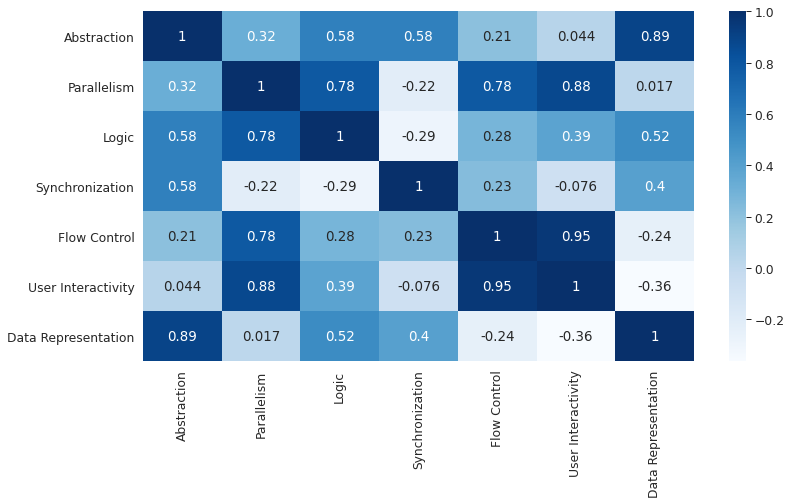

In [62]:
df_correlation_bar_chart(14, ct)

**Para la puntuación total de 14**, se observa una correlación positiva casi perfecta entre flujo de control e interactividad con el usuario. Se ve una correlación positiva elevada entre paralelismo e interactividad con el usuario, en representación de la información con abstracción, en flujo de control con paralelismo y en lógica con paralelismo. No hay correlación entre interactividad del usuario con sincronismo indicando que si el usuario mueve objetos a una determinada posición, pulsa en determinado escenario, o emplea la webcam o el micrófono, no afecta a la capacidad del programador para planificar el orden en que se ejecutan las instrucciones. 

--> Score: 15


,Abstraction,Parallelism,Logic,Synchronization,Flow Control,User Interactivity,Data Representation
29,1,3,3,2,1,2,3
49,3,2,2,1,2,2,3
77,3,2,2,1,2,2,3
139,3,3,2,1,3,2,1
141,2,3,2,1,2,2,3
...,...,...,...,...,...,...,...
269821,2,3,2,1,2,2,3
269822,2,3,2,1,2,2,3
269823,2,3,2,1,2,2,3
269824,2,3,2,1,2,2,3


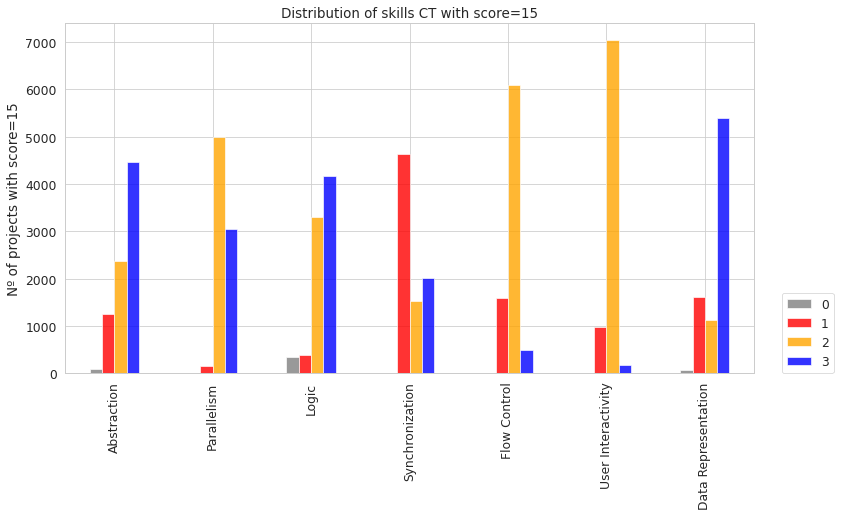

Matriz de correlación entre las 7 dimensiones para la puntuación 15


,Abstraction,Parallelism,Logic,Synchronization,Flow Control,User Interactivity,Data Representation
Abstraction,1.000000,0.659390,0.921123,0.158381,0.122863,0.102991,0.926171
Parallelism,0.659390,1.000000,0.871030,-0.164492,0.764794,0.783521,0.328455
Logic,0.921123,0.871030,1.000000,-0.135053,0.365043,0.379896,0.727443
Synchronization,0.158381,-0.164492,-0.135053,1.000000,0.059550,-0.058475,0.248366
Flow Control,0.122863,0.764794,0.365043,0.059550,1.000000,0.993034,-0.241749
User Interactivity,0.102991,0.783521,0.379896,-0.058475,0.993034,1.000000,-0.272207
Data Representation,0.926171,0.328455,0.727443,0.248366,-0.241749,-0.272207,1.000000


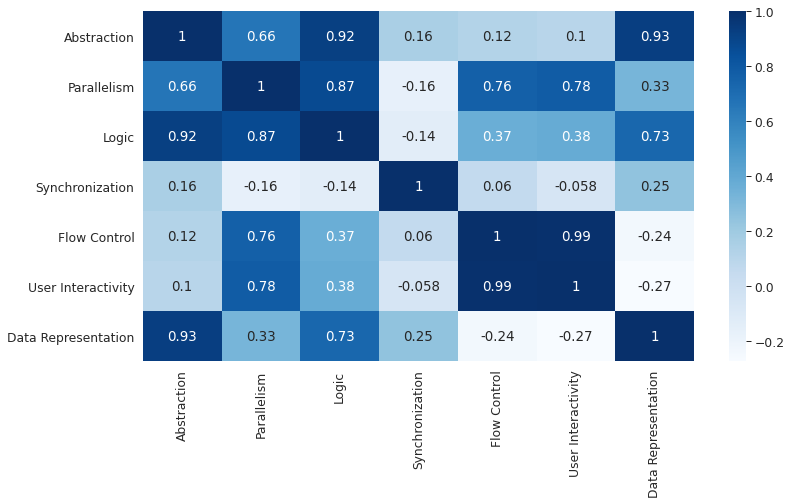

In [63]:
df_correlation_bar_chart(15, ct)

**Para la puntuación total de 15**, se observa una correlación positiva casi perfecta entre flujo de control e interactividad con el usuario, y una correlación positiva muy elevada entre lógica y abstracción, entre representación de la información y abstracción, entre lógica y paralelismo, entre interactividad con el usuario y paralelismo y entre flujo de control y paralelismo. Como en otras puntuaciones anteriores, no existe correlación lineal entre sincronismo e interactividad con el usuario, ni entre abstracción e interactividad con el usuario, ni entre flujo de control y sincronismo.

--> Score: 16


,Abstraction,Parallelism,Logic,Synchronization,Flow Control,User Interactivity,Data Representation
24,2,3,3,1,2,2,3
98,2,3,2,1,3,2,3
234,3,1,2,2,3,2,3
370,3,2,3,1,2,2,3
457,3,3,2,1,2,2,3
...,...,...,...,...,...,...,...
269829,3,2,2,1,3,2,3
269830,3,2,2,1,3,2,3
269831,3,2,2,1,3,2,3
269832,3,2,2,1,3,2,3


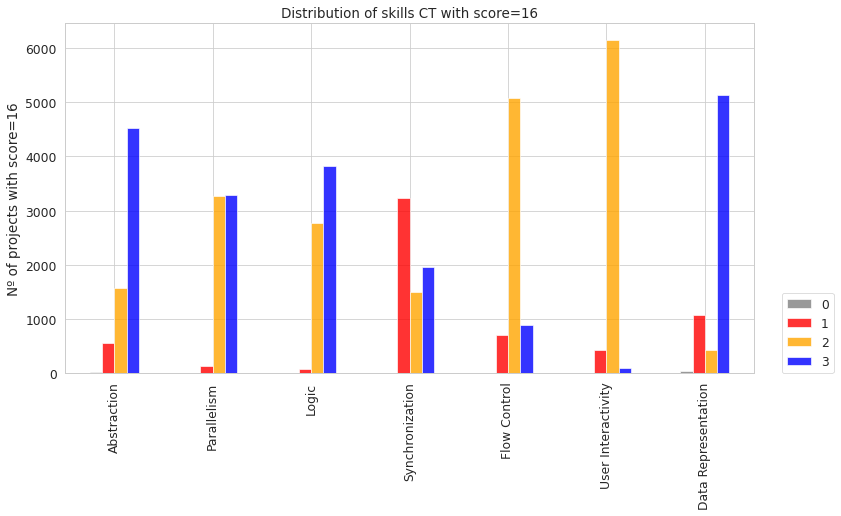

Matriz de correlación entre las 7 dimensiones para la puntuación 16


,Abstraction,Parallelism,Logic,Synchronization,Flow Control,User Interactivity,Data Representation
Abstraction,1.000000,0.799083,0.909578,0.230961,0.094696,-0.042855,0.942552
Parallelism,0.799083,1.000000,0.975217,0.075576,0.660587,0.558395,0.553997
Logic,0.909578,0.975217,1.000000,0.092627,0.478676,0.361017,0.718543
Synchronization,0.230961,0.075576,0.092627,1.000000,0.047243,-0.032952,0.318764
Flow Control,0.094696,0.660587,0.478676,0.047243,1.000000,0.989295,-0.223999
User Interactivity,-0.042855,0.558395,0.361017,-0.032952,0.989295,1.000000,-0.359972
Data Representation,0.942552,0.553997,0.718543,0.318764,-0.223999,-0.359972,1.000000


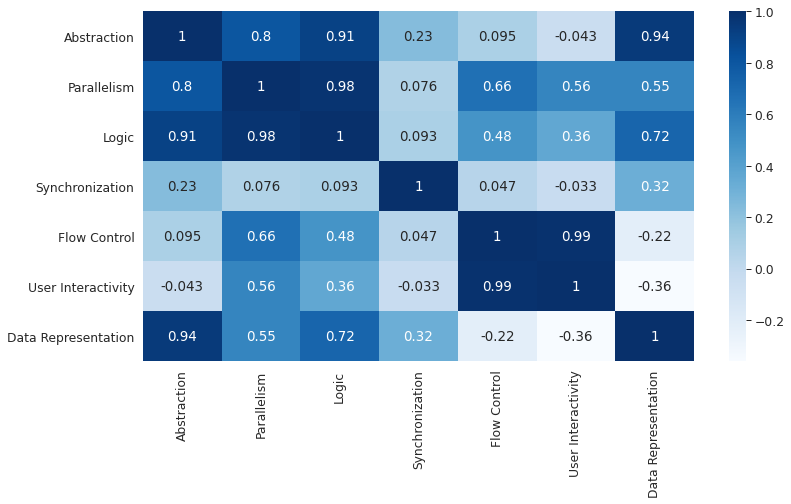

In [64]:
df_correlation_bar_chart(16, ct)

**Para la puntuación total de 16**, se observa en el diagrama de barras que ningún proyecto tiene 0 puntos en cada dimensión del pensamiento computacional. Se consiguen 3 puntos en abstracción, en representación de la información y en lógica en mayor cantidad de proyectos.

Existen elevadas correlaciones en sentido positivo, ordenados de mayor a menor, entre interactividad del usuario y flujo de control, entre lógica y paralelismo, entre abstracción y representación de la información, entre lógica y abstracción y entre paralelismo y abstracción. No existe correlación lineal entre flujo de control y sincronismo, ni entre interactividad del usuario y sincronismo, ni entre flujo de control y abstracción, ni entre interactividad del usuario y abstracción, ni entre paralelismo y sincronismo, ni entre lógica y sincronismo.

--> Score: 17


,Abstraction,Parallelism,Logic,Synchronization,Flow Control,User Interactivity,Data Representation
19,3,2,3,2,2,2,3
50,3,2,2,3,2,2,3
385,3,2,3,3,2,2,2
386,3,2,3,3,2,2,2
517,3,3,3,1,2,2,3
...,...,...,...,...,...,...,...
269713,3,3,2,1,3,2,3
269714,3,3,2,1,3,2,3
269715,3,3,2,1,3,2,3
269833,3,3,2,1,3,2,3


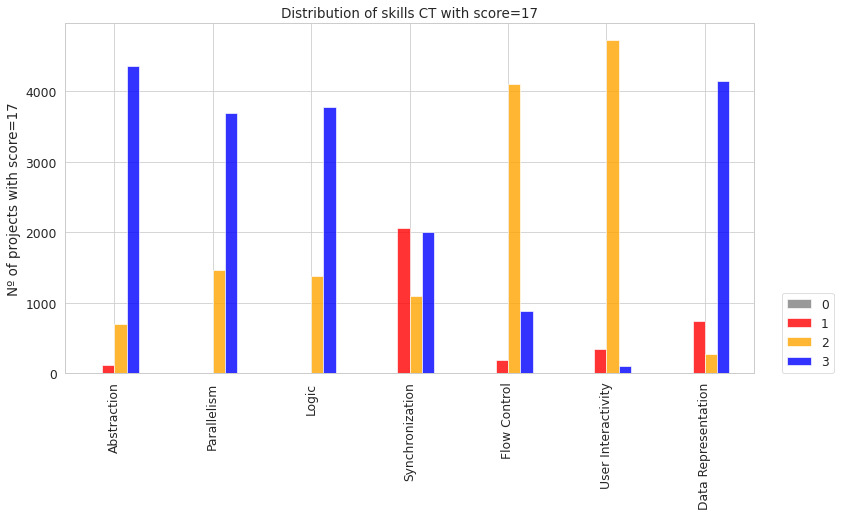

Matriz de correlación entre las 7 dimensiones para la puntuación 17


,Abstraction,Parallelism,Logic,Synchronization,Flow Control,User Interactivity,Data Representation
Abstraction,1.000000,0.966689,0.974365,0.507804,0.003738,-0.204135,0.976477
Parallelism,0.966689,1.000000,0.999482,0.463730,0.257895,0.050761,0.898218
Logic,0.974365,0.999482,1.000000,0.467572,0.226664,0.018594,0.910783
Synchronization,0.507804,0.463730,0.467572,1.000000,-0.005926,-0.089293,0.618012
Flow Control,0.003738,0.257895,0.226664,-0.005926,1.000000,0.977839,-0.160070
User Interactivity,-0.204135,0.050761,0.018594,-0.089293,0.977839,1.000000,-0.355965
Data Representation,0.976477,0.898218,0.910783,0.618012,-0.160070,-0.355965,1.000000


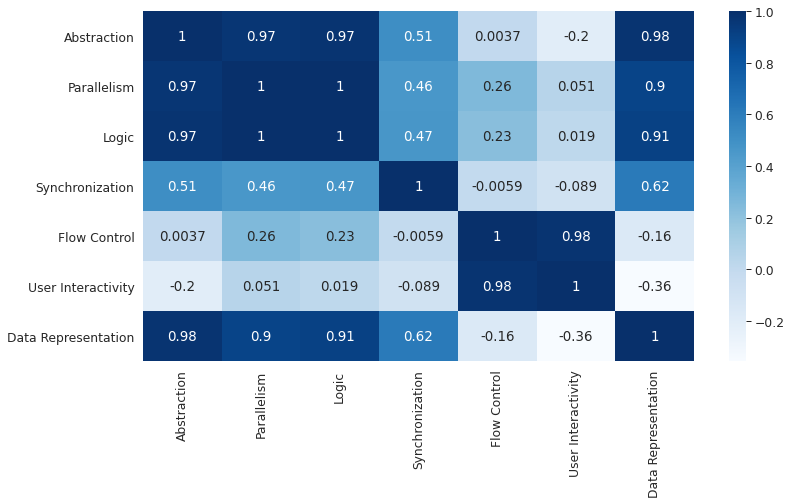

In [65]:
df_correlation_bar_chart(17, ct)

**Para la puntuación total de 17**, salvo en flujo de control e interactividad con el usuario y en menor medida sincronismo, el resto de dimensiones computacionales tienen un elevado nº de proyectos que alcanzan los 3 puntos.

Existe una correlación positiva casi perfecta entre paralelismo y abstracción, lógica y abstracción, representación de la información y abstracción, lógica y paralelismo y flujo de control e interactividad con el usuario. También es elevada entre paralelismo y representación de la información y entre lógica y representación de la información. No existe dependencia lineal entre flujo de control y abstracción, entre flujo de control y sincronismo, ni entre interactividad del usuario y la mayor parte de las dimensiones del pensamiento computacional, salvo flujo de control, porque el hecho de que el usuario interactue con el programa puede influir en la secuencia de instrucciones a realizar a continuación.

--> Score: 18


,Abstraction,Parallelism,Logic,Synchronization,Flow Control,User Interactivity,Data Representation
102,3,3,2,3,2,2,3
103,3,3,2,3,2,2,3
109,3,3,2,2,3,2,3
134,3,3,3,1,3,2,3
369,3,3,3,1,3,2,3
...,...,...,...,...,...,...,...
269799,3,3,2,3,2,2,3
269800,3,3,2,3,2,2,3
269801,3,3,3,2,2,2,3
269810,2,3,3,2,3,2,3


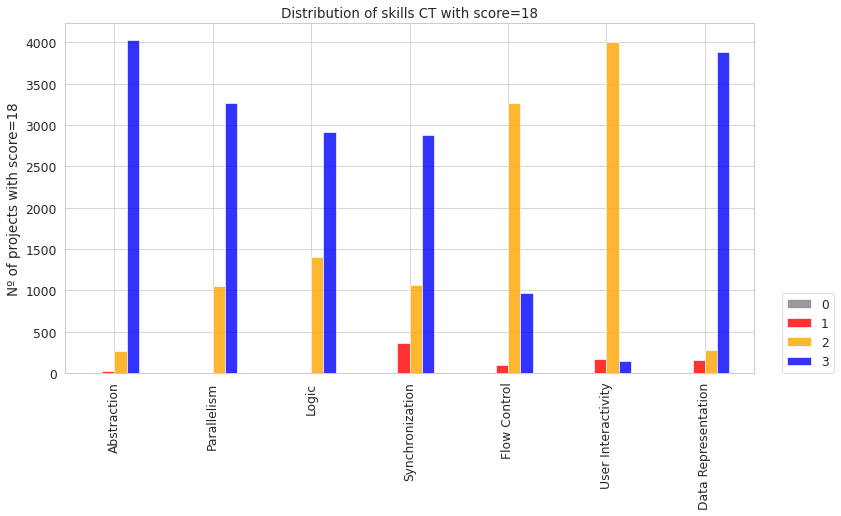

Matriz de correlación entre las 7 dimensiones para la puntuación 18


,Abstraction,Parallelism,Logic,Synchronization,Flow Control,User Interactivity,Data Representation
Abstraction,1.000000,0.964688,0.906021,0.956795,0.009705,-0.260406,0.999557
Parallelism,0.964688,1.000000,0.985502,0.993190,0.272499,0.002711,0.961825
Logic,0.906021,0.985502,1.000000,0.979981,0.431727,0.172223,0.901787
Synchronization,0.956795,0.993190,0.979981,1.000000,0.280499,0.013897,0.957198
Flow Control,0.009705,0.272499,0.431727,0.280499,1.000000,0.962858,0.001681
User Interactivity,-0.260406,0.002711,0.172223,0.013897,0.962858,1.000000,-0.267705
Data Representation,0.999557,0.961825,0.901787,0.957198,0.001681,-0.267705,1.000000


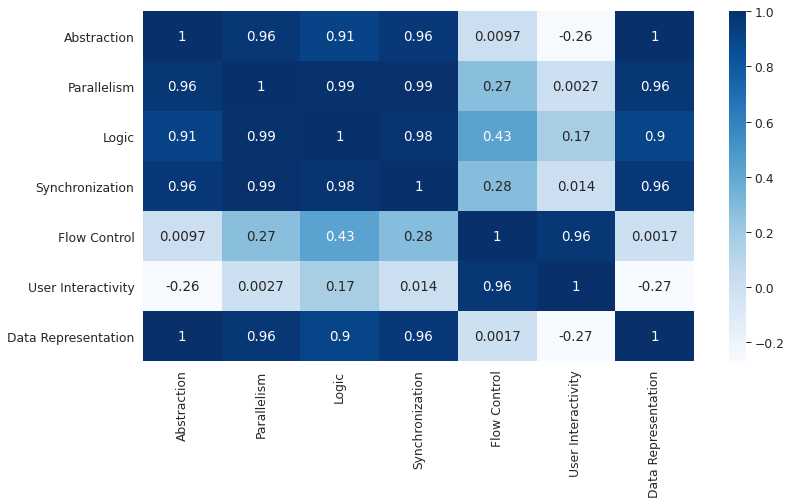

In [66]:
df_correlation_bar_chart(18, ct)

**Para la puntuación total de 18**, en sincronismo aumenta el nº de proyectos que consiguen 3 puntos.

Existen elevadas correlaciones positivas entre: paralelismo y abstracción, lógica y abstracción, sincronismo y abstracción, lógica y paralelismo, sincronismo y paralelismo, sincronismo y lógica, representación de la información y abstracción, representación de la información y paralelismo, representación de la información y lógica, representación de la información y sincronismo. Existe una correlación en sentido positivo muy baja entre flujo de control y lógica. Entre cada par de variables no mencionadas, se puede decir que no existe correlación. 

--> Score: 19


,Abstraction,Parallelism,Logic,Synchronization,Flow Control,User Interactivity,Data Representation
20,3,3,3,3,2,2,3
101,2,3,3,3,3,2,3
105,3,3,3,2,3,2,3
108,3,2,3,3,3,2,3
111,3,3,2,3,3,2,3
...,...,...,...,...,...,...,...
269793,3,3,3,3,2,2,3
269794,3,3,3,3,2,2,3
269802,2,3,3,2,3,3,3
269803,2,3,3,2,3,3,3


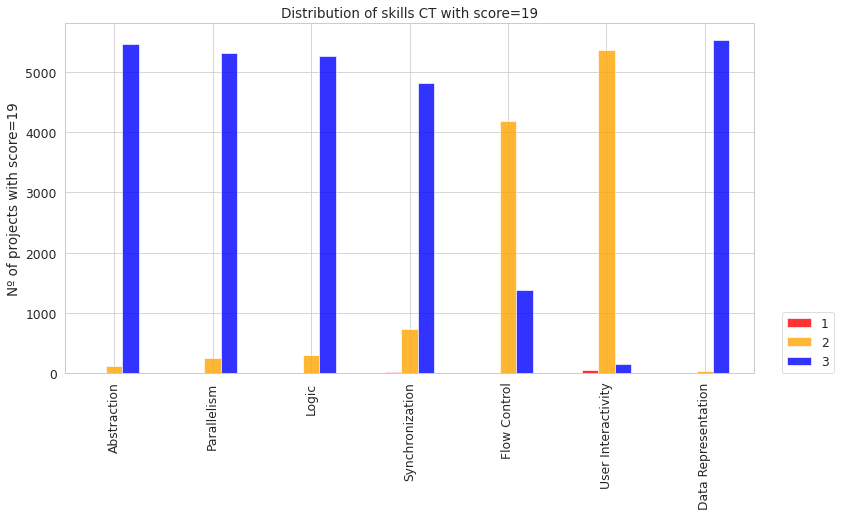

Matriz de correlación entre las 7 dimensiones para la puntuación 19


,Abstraction,Parallelism,Logic,Synchronization,Flow Control,User Interactivity,Data Representation
Abstraction,1.000000,0.999727,0.999420,0.992516,-0.173965,-0.469881,0.999918
Parallelism,0.999727,1.000000,0.999943,0.995098,-0.150908,-0.449128,0.999347
Logic,0.999420,0.999943,1.000000,0.996100,-0.140318,-0.439538,0.998902
Synchronization,0.992516,0.995098,0.996100,1.000000,-0.052412,-0.358572,0.990874
Flow Control,-0.173965,-0.150908,-0.140318,-0.052412,1.000000,0.951012,-0.186540
User Interactivity,-0.469881,-0.449128,-0.439538,-0.358572,0.951012,1.000000,-0.481128
Data Representation,0.999918,0.999347,0.998902,0.990874,-0.186540,-0.481128,1.000000


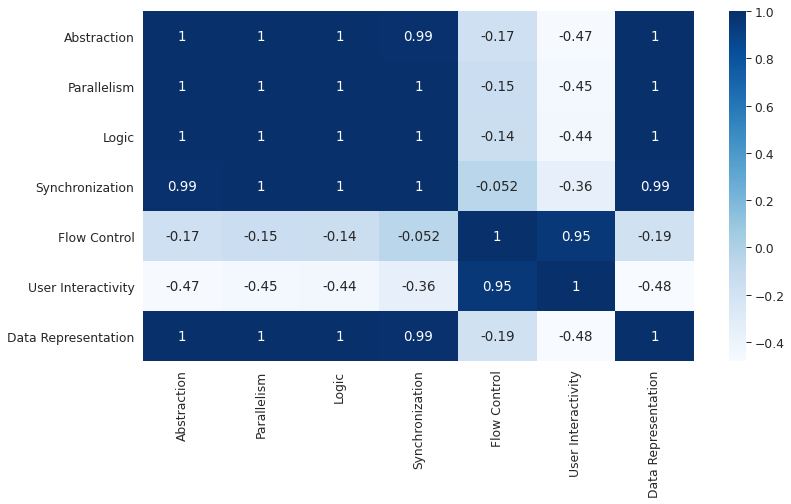

In [67]:
df_correlation_bar_chart(19, ct)

**Para la puntuación total de 19**, en flujo de control e interactividad del usuario se consiguen mayoritariamente 2 puntos. En el resto de dimensiones se consiguen 3 puntos.

Se consiguen correlaciones perfectas positivas en las mismas dimensiones que para la puntuación de 18. Flujo de control presenta una correlación prácticamente nula con el resto de dimensiones, salvo con interactividad del usuario. Esto solamente tiene sentido si la condición de control que está esperando el programa es una acción del usuario, ya sea por teclado, ratón, webcam o micrófono, pero por lo general este tipo de evento no se suele utilizar.

--> Score: 20


,Abstraction,Parallelism,Logic,Synchronization,Flow Control,User Interactivity,Data Representation
54,3,3,3,3,3,2,3
59,3,3,3,3,3,2,3
60,3,3,3,3,3,2,3
61,3,3,3,3,3,2,3
62,3,3,3,3,3,2,3
...,...,...,...,...,...,...,...
269671,3,3,3,2,3,3,3
269685,3,3,3,2,3,3,3
269686,3,3,3,2,3,3,3
269729,3,3,2,3,3,3,3


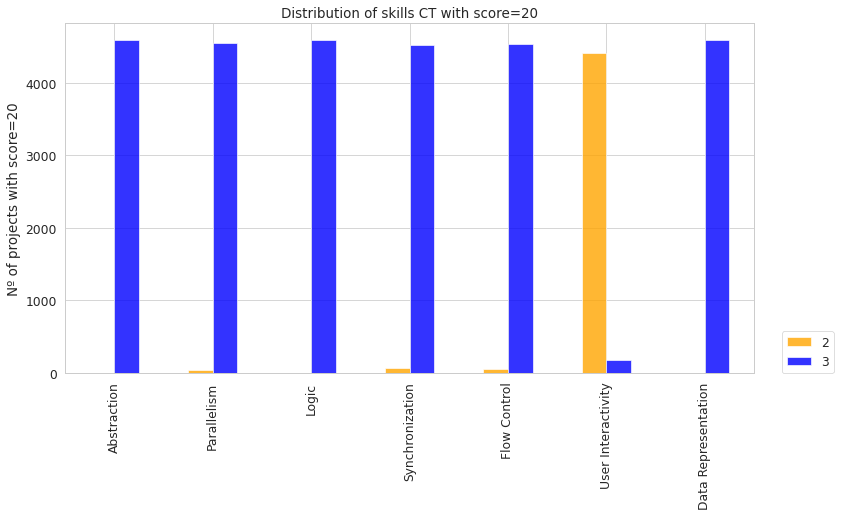

Matriz de correlación entre las 7 dimensiones para la puntuación 20


,Abstraction,Parallelism,Logic,Synchronization,Flow Control,User Interactivity,Data Representation
Abstraction,1.0,1.0,1.0,1.0,1.0,-1.0,1.0
Parallelism,1.0,1.0,1.0,1.0,1.0,-1.0,1.0
Logic,1.0,1.0,1.0,1.0,1.0,-1.0,1.0
Synchronization,1.0,1.0,1.0,1.0,1.0,-1.0,1.0
Flow Control,1.0,1.0,1.0,1.0,1.0,-1.0,1.0
User Interactivity,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0
Data Representation,1.0,1.0,1.0,1.0,1.0,-1.0,1.0


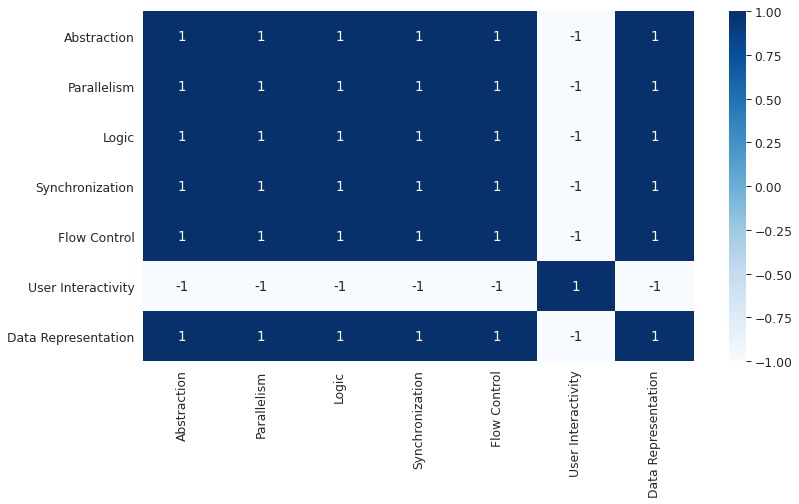

In [68]:
df_correlation_bar_chart(20, ct)

**Para la puntuación total de 20**, la correlación es perfecta positiva entre todas las dimensiones del pensamiento computacional, salvo para interactividad con el usuario con el resto de dimensiones. Esto se debe a que, según vemos en el diagrama de barras, las puntuaciones de la mayor parte de los proyectos para interactividad con el usuario son de 2 puntos. Por ello su correlación es perfecta negativa con cada una de las otras áreas del CT.

--> Score: 21


,Abstraction,Parallelism,Logic,Synchronization,Flow Control,User Interactivity,Data Representation
1,3,3,3,3,3,3,3
115,3,3,3,3,3,3,3
116,3,3,3,3,3,3,3
117,3,3,3,3,3,3,3
118,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...
269733,3,3,3,3,3,3,3
269740,3,3,3,3,3,3,3
269770,3,3,3,3,3,3,3
269771,3,3,3,3,3,3,3


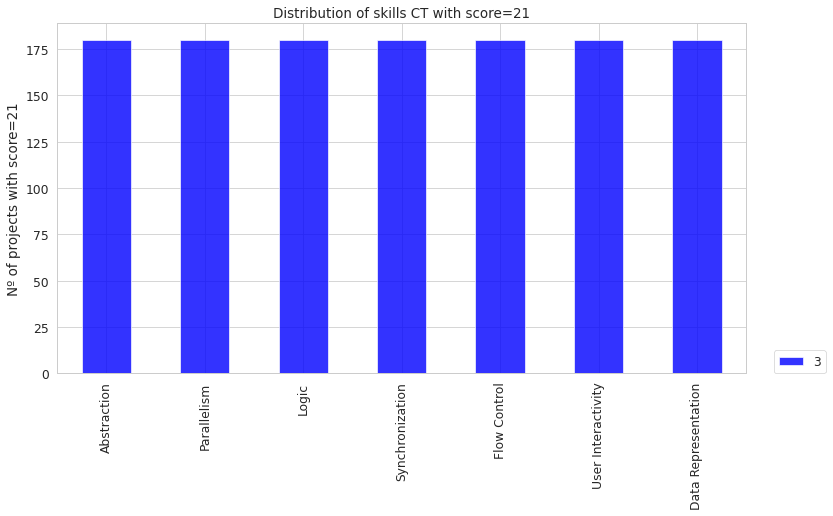

Abstraction           NaN
Parallelism           NaN
Logic                 NaN
Synchronization       NaN
Flow Control          NaN
User Interactivity    NaN
Data Representation   NaN
dtype: float64

,Abstraction,Parallelism,Logic,Synchronization,Flow Control,User Interactivity,Data Representation
Abstraction,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Parallelism,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Logic,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Synchronization,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Flow Control,NaN,NaN,NaN,NaN,NaN,NaN,NaN
User Interactivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Data Representation,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
df_correlation_bar_chart(21, ct)

**Para la puntuación total de 21**, se obtiene una matriz de correlación cuyos valores son NaN, ya que su varianza también incluye NaN, como se aprecia en el cálculo previo a la correlación. Todos los proyectos tienen puntuación de 3 para cada dimensión. No hay dispersión en torno a la media y por eso la matriz de correlación presenta estos valores.

**Según va aumentando la puntuación total las puntuaciones conseguidas para cada proyecto van aumentando de 0 a 3 y los valores de correlación entre cada par CT van oscilando, de modo que no se puede determinar una idea clara o progresión en la correlación según aumenta la puntuación total.**

### Aprendizaje no supervisado: clustering k-means

Se utiliza este algoritmo de aprendizaje no supervisado, para dividir los datos en subconjuntos no solapados (particiones). De este modo, se obtienen grupos de manera que los elementos dentro de un clúster son muy similares, y totalmente distintos a los elementos que pertenecen a otros grupos. La semejanza o diferencia se mide en función de la distancia euclidea a un centroide del cluster, que a partir de cierto nº de iteraciones, se colocará en el centro del clúster.
K-means trata de minimizar las distancias intra-partición y maximiza las distancias inter-partición.

In [70]:
df_ct.head()
X = np.array(df_ct)

Hallar el punto de codo de la curva de Elbow. Será el punto donde se produzca cierta inflexión.

[-1629496.071407989, -946289.1029704203, -779166.2471006361, -668053.3322840228, -601163.1606685014, -534825.5648538, -484327.87122201605, -451689.6049675569, -428722.70087583753, -400546.2301326919, -377703.39689545595, -357625.948710396, -347248.1226010562, -333083.43512939353, -321313.84695532813, -311642.192921046, -304739.47566677065, -294080.70114027045, -286895.37082353345, -278136.17102335964]
[1629496.071407989, 946289.1029704202, 779166.2471006361, 668053.3322840228, 601163.1606685014, 534825.5648538, 484327.87122201605, 451689.6049675569, 428722.70087583753, 400546.2301326919, 377703.39689545595, 357625.948710396, 347248.1226010562, 333083.43512939353, 321313.84695532813, 311642.192921046, 304739.47566677054, 294080.70114027045, 286895.37082353345, 278136.17102335964]


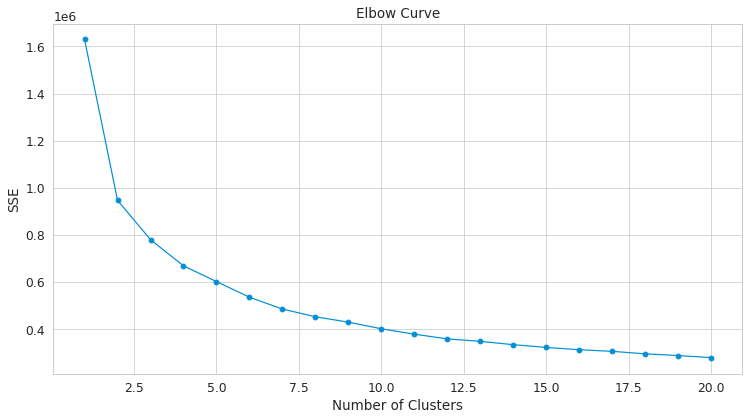

In [71]:
Nc= range(1, 21)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
print(score)
sse = [kmeans[i].inertia_ for i in range(len(kmeans))]
print(sse)
plt.plot(Nc, sse, marker= 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Curve')
plt.show();

Se elige un cluster de 3 para poder comparar con el paper.

####  Si haces tres clusters (con K-Means, por ejemplo), ¿los proyectos representativos de cada cluster son similares a los que obtuvimos en el paper (ver Tabla 4 del paper)?

In [72]:
df_ct.dtypes

Abstraction            uint8
Parallelism            uint8
Logic                  uint8
Synchronization        uint8
Flow Control           uint8
User Interactivity     uint8
Data Representation    uint8
dtype: object

In [73]:
X=np.array(df_ct)
X.shape

(269842, 7)

In [74]:
#kmeans2 = KMeans(n_clusters=3,init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=42, algorithm='auto')
#kmeans2.fit(X)
kmeans3 = KMeans(n_clusters=3, max_iter=300).fit(X)
centroids = kmeans3.cluster_centers_
labels = kmeans3.predict(X)
#np.unique(kmeans3.labels_,return_counts=True)
centroids

array([[2.72877603, 2.51591798, 2.41819596, 1.95444028, 2.0145815 ,
        1.9171587 , 2.31762148],
       [0.18337283, 1.46945888, 0.38058062, 0.60411729, 0.83895295,
        1.25109372, 0.43058958],
       [0.44838369, 1.93766377, 2.08856783, 1.25685829, 1.34577356,
        1.63145475, 1.83833982]])

In [75]:
closest, _ = pairwise_distances_argmin_min(kmeans3.cluster_centers_, X)
closest

array([1621, 8385, 1080])

In [76]:
df_ct.columns

Index(['Abstraction', 'Parallelism', 'Logic', 'Synchronization',
       'Flow Control', 'User Interactivity', 'Data Representation'],
      dtype='object')

In [77]:
col_tabla = ['Logic', 'Abstraction', 'User Interactivity', 'Data Representation','Parallelism',
             'Synchronization', 'Flow Control']

In [78]:
tabla_proj = df_ct[df_ct.index.isin(closest)][col_tabla]
tabla_proj["Mastery"] = tabla_proj.sum(axis=1)

In [79]:
trasp = tabla_proj.T
trasp = trasp[[8385,1080,1621]]

In [80]:
tabla_comparativa = trasp.rename(columns={8385:'cluster 1',1080:'cluster 2',1621:'cluster 3'})
tabla_comparativa

,cluster 1,cluster 2,cluster 3
Logic,0,2,2
Abstraction,0,0,3
User Interactivity,1,2,2
Data Representation,0,2,2
Parallelism,1,2,3
Synchronization,1,1,2
Flow Control,1,1,2
Mastery,4,10,16


<img src="Table4.png" width="400" height="300" align="left">

Se comparan los proyectos más representativos de cada uno de los tres clusters obtenidos de la totalidad de los proyectos con la muestra de 250 proyectos del estudio realizado en el enlace a continuación. 
- Para el cluster 1, tenemos una puntuación total de 4, con un punto en las siguentes áreas CT: interactividad con el usuario, paralelismo, sincronismo y flujo de control. El resto de áreas se encuentran en 0 puntos. En la *Tabla 4* se consiguen 7 puntos totales para el cluster 1. Con 1 punto en abstracción, en interactividad con el usuario, en representación de la información, en paralelismo y en sincronismo. La mayor puntuación se consigue en flujo de control (2 puntos) y la menor en lógica (0 puntos). Que se consigan menos puntuación tiene sentido, ya que los proyectos analizados en la *Tabla 4* son proyectos acabados y correctamente subidos. No se tienen en cuenta los proyectos no completados que aquí sí se consideran. 
- Para el cluster 2, con todos los proyectos, tenemos una puntuación total de 10 puntos: 2 puntos en lógica, en interactividad con el usuario, en representación de la información y en paralelismo. Se consigue 1 punto en sincronismo y en flujo de control. Abstracción se mantiene en 0 puntos. El cluster de la *Tabla 4* presenta una puntuación total de 10 puntos, que se reparte de manera totalmente distinta a la que aquí se calcula. Con 0 puntos en lógica, 1 punto en abstracción, en interactividad con el usuario y en representación de la información, 2 puntos en sincronismo y flujo de control y 3 puntos en paralelismo.
- Para el cluster 3, con todos los proyectos, se tienen 16 puntos totales, repartidos con 2 puntos en lógica, interactividad con el usuario, representación de la información, sincronismo y flujo de control. Los 3 puntos se corresponden con paralelismo y abstracción. En la *Tabla 4* los puntos totales son 18 en vez de 16. Se obtienen los mismos puntos que en el estudio con todos los proyectos en: abstracción, en interactividad con el usuario, en representación de la información, en paralelismo y en flujo de control. Sincronismo y lógica tienen un punto más (3 puntos). Es el cluster que más se parece al obtenido en este estudio. En esta ocasión también se consigue una puntuación algo menor por la misma razón que se ha comentado en el cluster 1. En el paper se seleccionaron proyectos que estubieran correctamente terminados, mientras que aquí se tienen en cuenta todos los proyectos, incluidos aquellos que están en progreso, para que el programador los mejore.

In [81]:
%%html
<a href="https://www.researchgate.net/publication/318843847_Towards_Data-Driven_Learning_Paths_to_Develop_Computational_Thinking_with_Scratch">Proyectos representativos de cada clúster (Tabla 4)</a>

Los nombres de los proyectos representativos de cada clúster son:

In [82]:
df_name_prototype = df_dr_scratch.iloc[[1080,1621,8385]]
df_name_prototype = df_name_prototype.rename({8385:'cluster 1', 1080:'cluster 2', 1621:'cluster 3'}, axis='index')['Project'].sort_index()
print(df_name_prototype)

cluster 1    Projeto_Scratch_carlos_eduarda_e_melyssa_2019_...
cluster 2             303744048_2019_10_15_16_11_53_192392.sb3
cluster 3    Bheemashankar_p_Project_planning_2021_01_07_03...
Name: Project, dtype: object


### Análisis de clustering entre niveles o puntuaciones totales.


A continuación se calcula cómo es el cambio entre puntuaciones totales desde la puntuación de 5 hasta la puntuación total máxima de 21.

Se agrupan todos los proyectos para cada puntuación desde 5 hasta 21. Se elige la combinación de dimensiones más frecuente. Además se realiza sobre el grupo de cada puntuación un clustering k means. Se haya el centro del grupo y el proyecto más representativo para cada puntuación. Con ello se puede apreciar cuál es el camino de aprendizaje, qué dimensión del pensamiento computacional es la que aumenta en cada caso para pasar a la siguiente puntuación.

In [83]:
df_n5 = df_total_group.get_group(5).loc[:, "Abstraction":"Data Representation"]
df_n5_max = df_n5.value_counts().head(1).index.to_frame(index=False)
kmeans_n5 = KMeans(n_clusters=1).fit(df_n5)
center_n5 = kmeans_n5.cluster_centers_
closest_n5, _ = pairwise_distances_argmin_min(kmeans_n5.cluster_centers_, df_n5)
df_n5_representative = df_n5.iloc[closest_n5]

In [84]:
df_n6 = df_total_group.get_group(6).loc[:, "Abstraction":"Data Representation"]
df_n6_max = df_n6.value_counts().head(1).index.to_frame(index=False)
kmeans_n6 = KMeans(n_clusters=1).fit(df_n6.values)
center_n6 = kmeans_n6.cluster_centers_
closest_n6, _ = pairwise_distances_argmin_min(kmeans_n6.cluster_centers_, df_n6)
df_n6_representative = df_n6.iloc[closest_n6]

In [85]:
df_n7 = df_total_group.get_group(7).loc[:, "Abstraction":"Data Representation"]
df_n7_max = df_n7.value_counts().head(1).index.to_frame(index=False)
kmeans_n7 = KMeans(n_clusters=1).fit(df_n7.values)
center_n7 = kmeans_n7.cluster_centers_
closest_n7, _ = pairwise_distances_argmin_min(kmeans_n7.cluster_centers_, df_n7)
df_n7_representative = df_n7.iloc[closest_n7]

In [86]:
df_n8 = df_total_group.get_group(8).loc[:, "Abstraction":"Data Representation"]
df_n8_max = df_n8.value_counts().head(1).index.to_frame(index=False)
kmeans_n8 = KMeans(n_clusters=1).fit(df_n8.values)
center_n8 = kmeans_n8.cluster_centers_
closest_n8, _ = pairwise_distances_argmin_min(kmeans_n8.cluster_centers_, df_n8)
df_n8_representative = df_n8.iloc[closest_n8]

In [87]:
df_n9 = df_total_group.get_group(9).loc[:, "Abstraction":"Data Representation"]
df_n9_max = df_n9.value_counts().head(1).index.to_frame(index=False)
kmeans_n9 = KMeans(n_clusters=1).fit(df_n9.values)
center_n9 = kmeans_n9.cluster_centers_
closest_n9, _ = pairwise_distances_argmin_min(kmeans_n9.cluster_centers_, df_n9)
df_n9_representative = df_n9.iloc[closest_n9]

In [88]:
df_n10 = df_total_group.get_group(10).loc[:, "Abstraction":"Data Representation"]
df_n10_max = df_n10.value_counts().head(1).index.to_frame(index=False)
kmeans_n10 = KMeans(n_clusters=1).fit(df_n10.values)
center_n10 = kmeans_n10.cluster_centers_
closest_n10, _ = pairwise_distances_argmin_min(kmeans_n10.cluster_centers_, df_n10)
df_n10_representative = df_n10.iloc[closest_n10]

In [89]:
df_n11 = df_total_group.get_group(11).loc[:, "Abstraction":"Data Representation"]
df_n11_max = df_n11.value_counts().head(1).index.to_frame(index=False)
kmeans_n11 = KMeans(n_clusters=1).fit(df_n11.values)
center_n11 = kmeans_n11.cluster_centers_
closest_n11, _ = pairwise_distances_argmin_min(kmeans_n11.cluster_centers_, df_n11)
df_n11_representative = df_n11.iloc[closest_n11]

In [90]:
df_n12 = df_total_group.get_group(12).loc[:, "Abstraction":"Data Representation"]
df_n12_max = df_n12.value_counts().head(1).index.to_frame(index=False)
kmeans_n12 = KMeans(n_clusters=1).fit(df_n12.values)
center_n12 = kmeans_n12.cluster_centers_
closest_n12, _ = pairwise_distances_argmin_min(kmeans_n12.cluster_centers_, df_n12)
df_n12_representative = df_n12.iloc[closest_n12]

In [91]:
df_n13 = df_total_group.get_group(13).loc[:, "Abstraction":"Data Representation"]
df_n13_max = df_n13.value_counts().head(1).index.to_frame(index=False)
kmeans_n13 = KMeans(n_clusters=1).fit(df_n13.values)
center_n13 = kmeans_n13.cluster_centers_
closest_n13, _ = pairwise_distances_argmin_min(kmeans_n13.cluster_centers_, df_n13)
df_n13_representative = df_n13.iloc[closest_n13]

In [92]:
df_n14 = df_total_group.get_group(14).loc[:, "Abstraction":"Data Representation"]
df_n14_max = df_n14.value_counts().head(1).index.to_frame(index=False)
kmeans_n14 = KMeans(n_clusters=1).fit(df_n14.values)
center_n14 = kmeans_n14.cluster_centers_
closest_n14, _ = pairwise_distances_argmin_min(kmeans_n14.cluster_centers_, df_n14)
df_n14_representative = df_n14.iloc[closest_n14]

In [93]:
df_n15 = df_total_group.get_group(15).loc[:, "Abstraction":"Data Representation"]
df_n15_max = df_n15.value_counts().head(1).index.to_frame(index=False)
kmeans_n15 = KMeans(n_clusters=1).fit(df_n15.values)
center_n15 = kmeans_n15.cluster_centers_
closest_n15, _ = pairwise_distances_argmin_min(kmeans_n15.cluster_centers_, df_n15)
df_n15_representative = df_n15.iloc[closest_n15]

In [94]:
df_n16 = df_total_group.get_group(16).loc[:, "Abstraction":"Data Representation"]
df_n16_max = df_n16.value_counts().head(1).index.to_frame(index=False)
kmeans_n16 = KMeans(n_clusters=1).fit(df_n16.values)
center_n16 = kmeans_n16.cluster_centers_
closest_n16, _ = pairwise_distances_argmin_min(kmeans_n16.cluster_centers_, df_n16)
df_n16_representative = df_n16.iloc[closest_n16]

In [95]:
df_n17 = df_total_group.get_group(17).loc[:, "Abstraction":"Data Representation"]
df_n17_max = df_n17.value_counts().head(1).index.to_frame(index=False)
kmeans_n17 = KMeans(n_clusters=1).fit(df_n17.values)
center_n17 = kmeans_n17.cluster_centers_
closest_n17, _ = pairwise_distances_argmin_min(kmeans_n17.cluster_centers_, df_n17)
df_n17_representative = df_n17.iloc[closest_n17]

In [96]:
df_n18 = df_total_group.get_group(18).loc[:, "Abstraction":"Data Representation"]
df_n18_max = df_n18.value_counts().head(1).index.to_frame(index=False)
kmeans_n18 = KMeans(n_clusters=1).fit(df_n18.values)
center_n18 = kmeans_n18.cluster_centers_
closest_n18, _ = pairwise_distances_argmin_min(kmeans_n18.cluster_centers_, df_n18)
df_n18_representative = df_n18.iloc[closest_n18]

In [97]:
df_n19 = df_total_group.get_group(19).loc[:, "Abstraction":"Data Representation"]
df_n19_max = df_n19.value_counts().head(1).index.to_frame(index=False)
kmeans_n19 = KMeans(n_clusters=1).fit(df_n19.values)
center_n19 = kmeans_n19.cluster_centers_
closest_n19, _ = pairwise_distances_argmin_min(kmeans_n19.cluster_centers_, df_n19)
df_n19_representative = df_n19.iloc[closest_n19]

In [98]:
df_n20 = df_total_group.get_group(20).loc[:, "Abstraction":"Data Representation"]
df_n20_max = df_n20.value_counts().head(1).index.to_frame(index=False)
kmeans_n20 = KMeans(n_clusters=1).fit(df_n20.values)
center_n20 = kmeans_n20.cluster_centers_
closest_n20, _ = pairwise_distances_argmin_min(kmeans_n20.cluster_centers_, df_n20)
df_n20_representative = df_n20.iloc[closest_n20]

In [99]:
df_n21 = df_total_group.get_group(21).loc[:, "Abstraction":"Data Representation"]
df_n21_max = df_n21.value_counts().head(1).index.to_frame(index=False)
kmeans_n21 = KMeans(n_clusters=1).fit(df_n21.values)
center_n21 = kmeans_n21.cluster_centers_
closest_n21, _ = pairwise_distances_argmin_min(kmeans_n21.cluster_centers_, df_n21)
df_n21_representative = df_n21.iloc[closest_n21]

A continuación obtenemos la tabla y la gráfica que agrupan las combinaciones más frecuentes para cada puntuación total desde N=5 hasta N=21.

In [100]:
dataframes_by_N = [df_n5_max,df_n6_max, df_n7_max,df_n8_max,df_n9_max, df_n10_max, df_n11_max, df_n12_max, df_n13_max,
                   df_n14_max, df_n15_max, df_n16_max, df_n17_max, df_n18_max, df_n19_max, df_n20_max, df_n21_max]
result = pd.concat(dataframes_by_N, sort='False', ignore_index='True')
result["Total"] = result.sum(axis=1)
df5 = result.set_index("Total")
df5

,Abstraction,Data Representation,Flow Control,Logic,Parallelism,Synchronization,User Interactivity
Total,,,,,,,
5,0,0,1,1,2,0,1
6,0,1,1,0,2,1,1
7,0,1,1,1,2,1,1
8,0,1,1,2,2,1,1
9,0,2,1,1,2,1,2
10,0,3,1,2,2,1,1
11,1,1,2,2,2,1,2
12,0,3,1,3,2,1,2
13,1,3,2,2,2,1,2


Text(0.5, 0, 'Total score')

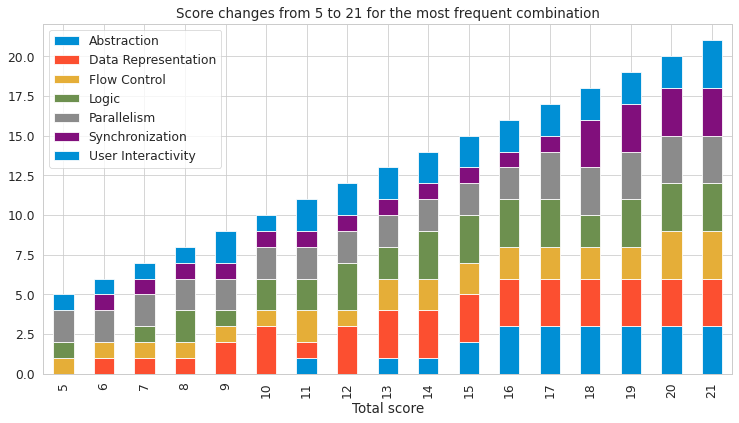

In [101]:
df5.plot(kind="bar", stacked=True)
plt.title("Score changes from 5 to 21 for the most frequent combination")
plt.xlabel("Total score")

Se representa a continuación como varía la puntuación total en función de la combinación de puntuaciones más frecuentes asignadas a cada dimensión del pensamiento computacional. Así podemos observar cuál es la evolución de cada dimensión para cada puntuación.
- El cambio de nivel o puntuación total entre 5 y 6: Representación de la información pasa a valer de 0 a 1 punto. Lógica pasa a valer de 1 a 0 puntos. Sincronismo va desde 0 a 1 punto.
- El cambio de nivel o puntuación total entre 6 y 7: Lógica pasa a valer de 0 a 1 punto.
- El cambio de nivel o puntuación total entre 7 y 8: Lógica pasa a valer de 1 a 2 puntos.
- El cambio de nivel o puntuación total entre 8 y 9: Representación de la información pasa a valer de 1 a 2 puntos. Lógica pasa a valer de 2 a 1 punto. Interactividad del usuario va desde 1 a 2 puntos.
- El cambio de nivel o puntuación total entre 9 y 10: Representación de la información pasa a valer de 2 a 3 puntos. Lógica pasa a valer de 1 a 2 puntos. Interactividad del usuario va desde 2 a 1 punto.
- El cambio de nivel o puntuación total entre 10 y 11: Representación de la información pasa a valer de 3 a 1 punto. Abstracción, que hasta ahora estaba en 0 puntos, vale ahora 1 punto. Flujo de control del programa pasa de valer 1 punto a 2 puntos. Interactividad con el usuario va desde 1 a 2 puntos.
- El cambio de nivel o puntuación total entre 11 y 12: Representación de la información pasa a valer de 1 a 3 puntos. Flujo de control del programa pasa de valer 2 puntos a 1 punto. Lógica incrementa su valor de 2 a 3 puntos. Interactividad del usuario va desde 2 a 1 punto.
- El cambio de nivel o puntuación total entre 12 y 13: Abstracción vuelve a valer 1 punto. Flujo de control del programa incrementa su valor desde 1 punto hasta 2 puntos. Lógica decrementa su valor a 2 puntos. 
- El cambio de nivel o puntuación total entre 13 y 14: Lógica pasa a valer de 2 a 3 puntos.
- El cambio de nivel o puntuación total entre 14 y 15: Abstracción incrementa su valor desde 1 a 2 puntos.
- El cambio de nivel o puntuación total entre 15 y 16:  Abstracción incrementa su valor desde 2 a 3 puntos. Este valor se mantiene hasta los 21 puntos totales.
- El cambio de nivel o puntuación total entre 16 y 17:  Paralelismo que hasta ahora había mantenido su valor en 2 puntos, aumenta su valor en 1 punto, pasando a valer 3 puntos.
- El cambio de nivel o puntuación total entre 17 y 18: Lógica pasa a valer de 3 a 2 puntos. Sincronismo incrementa su valor desde 1 a 3 puntos.
- El cambio de nivel o puntuación total entre 18 y 19: Lógica aumenta su puntuación de 2 a 3 puntos.
- El cambio de nivel o puntuación total entre 19 y 20: Flujo de control es ahora la dimensión del pensamiento computacional que cambia de 2 a 3 puntos.
- El cambio de nivel o puntuación total entre 20 y 21: Interactividad del usuario que habia mantenido los 2 puntos desde la puntuación total de 11 puntos aumenta su valor a 3 puntos. Como la puntuación total es 21 puntos, todas las dimensiones del pensamiento computacional tienen asignados los 3 puntos.

In [102]:
df_by_representative = [df_n5_representative, df_n6_representative, df_n7_representative, df_n8_representative, 
                        df_n9_representative, df_n10_representative, df_n11_representative, df_n12_representative,
                        df_n13_representative, df_n14_representative, df_n15_representative, df_n16_representative,
                        df_n17_representative, df_n18_representative, df_n19_representative, df_n20_representative,
                        df_n21_representative]
df_learning = pd.concat(df_by_representative, sort='False', ignore_index='True')
df_learning["Total"] = df_learning.sum(axis=1)
df_learning_5 = df_learning.set_index("Total")
df_learning_5

,Abstraction,Data Representation,Flow Control,Logic,Parallelism,Synchronization,User Interactivity
Total,,,,,,,
5,0,0,1,0,2,1,1
6,0,1,1,0,2,1,1
7,0,1,1,1,2,1,1
8,0,1,1,1,2,1,2
9,1,1,1,1,2,1,2
10,0,2,1,2,2,1,2
11,1,2,1,2,2,1,2
12,1,2,2,2,2,1,2
13,2,2,2,2,2,1,2


Text(0.5, 0, 'Total score')

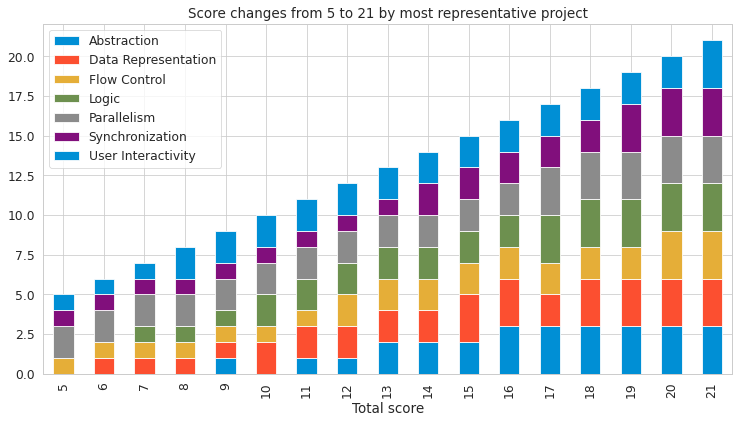

In [103]:
df_learning_5.plot(kind="bar", stacked=True)
plt.title("Score changes from 5 to 21 by most representative project")
plt.xlabel("Total score")

Se representa a continuación como varía la puntuación total **en función de las puntuaciones del proyecto más representativo** para cada puntuación. Así podemos observar cuál es la evolución de cada dimensión para cada puntuación.
- El cambio de nivel o puntuación total entre 5 y 6: Representación de la información empieza a puntuar pasando a valer 1 punto. 
- El cambio de nivel o puntuación total entre 6 y 7: Lógica comienza a puntuar pues cambia su puntuación de 0 a 1 punto.
- El cambio de nivel o puntuación total entre 7 y 8: Interactividad del usuario pasa a valer de 1 a 2 puntos.
- El cambio de nivel o puntuación total entre 8 y 9: Para la puntuación total de 9, abstracción comienza a puntuar y toma 1 punto de valor.
- El cambio de nivel o puntuación total entre 9 y 10: Aquí se produce un cambio extraño, pues abstracción vuelve a valer 0 puntos, representación de la información incrementa su valor se desde 1 a 2 puntos, y lógica también cambia su valor desde 1 a 2 puntos.
- El cambio de nivel o puntuación total entre 10 y 11: Abstracción incrementa su valor, de modo que en este nivel vale 1 punto.
- El cambio de nivel o puntuación total entre 11 y 12: Flujo de control incrementa su valor desde 1 a 2 puntos.
- El cambio de nivel o puntuación total entre 12 y 13: Abstracción aumenta su valor pasando de 1 a 2 puntos. 
- El cambio de nivel o puntuación total entre 13 y 14: Sincronismo toma un valor de 2 puntos, dejando de valer 1 punto.
- El cambio de nivel o puntuación total entre 14 y 15: Representación de la información pasa de valer 2 a 3 puntos.
- El cambio de nivel o puntuación total entre 15 y 16: Abstracción incrementa su valor desde 2 a 3 puntos. Este valor se mantiene hasta los 21 puntos totales.
- El cambio de nivel o puntuación total entre 16 y 17: Lógica que hasta ahora había mantenido su valor en 2 puntos desde que incrementara su valor para la puntuación total de 10, aumenta su valor en 1 punto, pasando a valer 3 puntos.
- El cambio de nivel o puntuación total entre 17 y 18: Representación de la información aumenta su valor de 2 a 3 puntos
- El cambio de nivel o puntuación total entre 18 y 19: Sincronismo aumenta su puntuación de 2 a 3 puntos.
- El cambio de nivel o puntuación total entre 19 y 20: Flujo de control es ahora la que cambia de 2 a 3 puntos.
- El cambio de nivel o puntuación total entre 20 y 21: Interactividad del usuario que habia mantenido los 2 puntos desde la puntuación total de 11 puntos aumenta su valor a 3 puntos. Como la puntuación total es 21 puntos, todas las dimensiones del pensamiento computacional tienen asignados los 3 puntos.

De este modo se puede establecer una ruta de aprendizaje, que se aprecia de una manera más clara cuando se realiza un clustering k means para cada puntuación total y se haya el proyecto más representativo. De esta manera podemos ver más claramente cuál es la dimensión que aumenta al pasar de un nivel o puntuación a otra.

### Análisis de bad smells

Se realiza a continuación un análisis de los malos hábitos a la hora de programar o *bad smells* que podemos encontrar en los proyectos de Dr. Scratch analizados. Los cuatro tipos de malos hábitos consisten en la aparición de nombres de personajes u objetos por defecto (Default sprite names), en la existencia de nombres de escenarios o fondos por defecto (Default backdrop names), la presencia de código duplicado que contienen los mismos bloques en diferentes partes del proyecto y donde solo varían los parámetros o valores de los bloques (Duplicate scripts), o la existencia de código aislado que no llega a ejecutarse nunca (Dead Code). Todos ellos perjudican el desarrollo de las dimensiones del pensamiento computacional. Se realizará un análisis de la distribución de cada uno de ellos, para después observar si existe alguna relación entre ellos.

Ahora recordamos como es nuestro dataframe completo viendo sus 5 primeros filas.

In [104]:
df_dr_scratch.head()

,Project,Total,Average,Level,Abstraction,Parallelism,Logic,Synchronization,Flow Control,User Interactivity,Data Representation,Default sprite names,Default backdrop names,Duplicate scripts,Dead code
0,0000000000000000000_2019_10_31_16_23_19_855098...,7,1.000000,Basic,0,2,1,1,1,1,1,1,1,0,0
1,000_2020_02_10_20_36_07_266406.sb3,21,3.000000,Proficiency,3,3,3,3,3,3,3,0,0,1,1
2,001_2019_10_06_01_02_56_507455.sb3,9,1.285714,Developing,0,1,2,1,1,1,3,1,3,0,0
3,001_2020_02_20_17_27_00_734651.sb3,3,0.428571,Basic,0,2,0,0,1,0,0,0,0,0,0
4,002_2020_02_20_17_30_48_272929.sb3,6,0.857143,Basic,0,1,0,1,1,2,1,0,0,0,1


Se construye a continuación un dataframe a partir de los bad smells. Las variables correspondientes a cada uno de los bad smell (Default sprite names, Default backdrop names, Duplicate scripts, Dead Code) son de tipo entero. Ya se habían extraído los proyectos que no contenían datos. Se cuenta, por lo tanto, con 269842 proyectos que contabilizan los bad smells.

In [105]:
df_bad_smells = df_dr_scratch.loc[:, "Default sprite names":"Dead code"]
df_bad_smells.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269842 entries, 0 to 269843
Data columns (total 4 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   Default sprite names    269842 non-null  uint8
 1   Default backdrop names  269842 non-null  uint8
 2   Duplicate scripts       269842 non-null  uint8
 3   Dead code               269842 non-null  uint8
dtypes: uint8(4)
memory usage: 11.2 MB


Nuestras variables de estudio, los bad smells, son enteros que indican cuántos errores de cada tipo se han cometido en cada uno de los 269842 proyectos con datos válidos.

In [106]:
df_bad_smells.tail()

,Default sprite names,Default backdrop names,Duplicate scripts,Dead code
269839,0,0,1,0
269840,0,0,1,0
269841,0,0,1,0
269842,0,0,1,0
269843,0,0,1,0


Se obtiene a continuación la frecuencia relativa de los proyectos donde no se han detectado malas prácticas de programación en cuanto a los cuatro bad smells considerados.

In [107]:
names = df_bad_smells.columns
values_without_bad_smells = (df_bad_smells.loc[:, "Default sprite names":"Dead code"]==0).aggregate(sum)/len(df_bad_smells)
values_without_bad_smells

Default sprite names      0.618614
Default backdrop names    0.318405
Duplicate scripts         0.848637
Dead code                 0.803329
dtype: float64

In [108]:
names = df_bad_smells.columns
freq_relative = (df_bad_smells.loc[:, "Default sprite names":"Dead code"]>=1).aggregate(sum)/len(df_bad_smells)
freq_relative

Default sprite names      0.381386
Default backdrop names    0.681595
Duplicate scripts         0.151363
Dead code                 0.196671
dtype: float64

En este caso se muestra la cantidad de proyectos que contienen alguno de los cuatro bad smells en frecuencia relativa y en cantidad de proyectos.

In [109]:
number_bad_smells = (df_bad_smells.loc[:, "Default sprite names":"Dead code"]>=1).aggregate(sum)

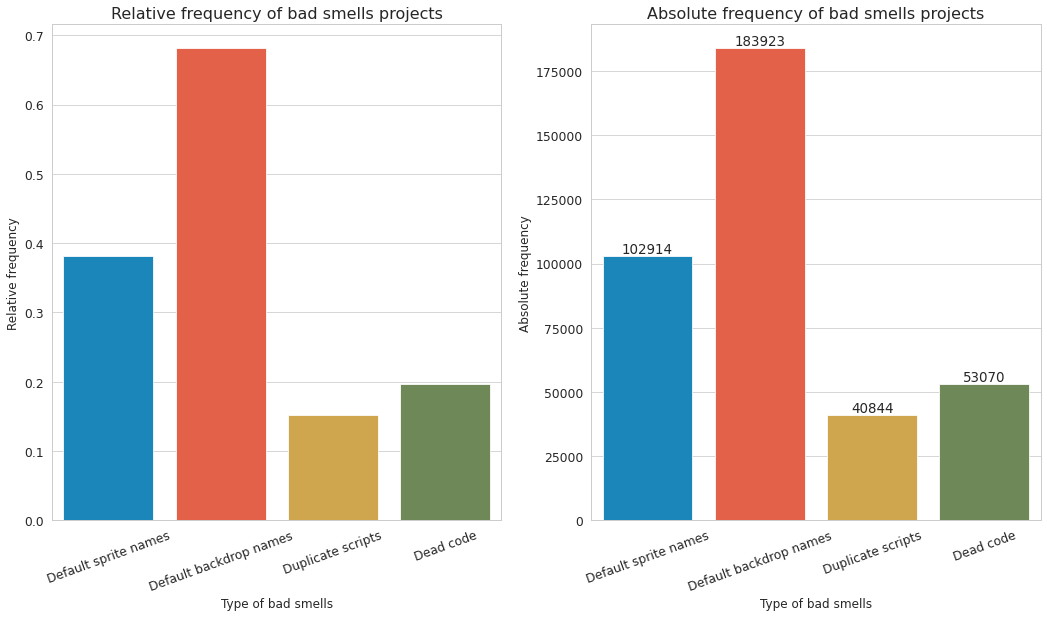

In [110]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(15, 8))
fig.tight_layout(pad=2)
plt.subplot(1,2,1)
sns.set_style('whitegrid')
ax = sns.barplot(x=names, y=freq_relative)
ax.tick_params(axis='x', rotation=20)
#plt.xticks(rotation=45, center)
plt.title("Relative frequency of bad smells projects", fontsize=16)
plt.xlabel('Type of bad smells', fontsize=12)
plt.ylabel('Relative frequency', fontsize=12)
plt.subplot(1,2,2)
ax = sns.barplot(x=names, y=number_bad_smells)
ax.tick_params(axis='x', rotation=20)
ax = plt.gca()
plt.bar_label(ax.containers[0])
plt.title("Absolute frequency of bad smells projects", fontsize=16)
plt.xlabel('Type of bad smells', fontsize=12)
plt.ylabel('Absolute frequency', fontsize=12)
ax1.grid(True)

El error que menos se comete es el de código duplicado, pues solo se produce en un 15.14% de los 269842 proyectos de Dr. Scratch analizados, que se corresponde con 40844 proyectos. El error que más se comete es el de mantener en los proyectos nombres por defecto en los fondos o escenarios con los que se implementa el proyecto de Dr. Scratch. Un 68,16% de los 269842, es decir, 183923 proyectos, presentan este tipo de mala práctica a la hora de programar.
En código que no se ejecuta nunca o inalcanzable (*Dead Code*) se obtiene también un bajo porcentaje del total de los proyectos, un 19,67%, que equivale a 53070 proyectos. Prácticamente el doble de los proyectos, 102914, presentan un nombre por defecto asignado a los personajes u objetos, que equivale a un 38,14%.  .

**Distribución de frecuencias de nombres de personajes u objetos por defecto**

In [111]:
df_bad_smells["Default sprite names"].value_counts()

0     166928
1      69100
2      13140
3       5684
4       3361
       ...  
94         1
92         1
91         1
74         1
71         1
Name: Default sprite names, Length: 116, dtype: int64

En nombres de objetos por defecto se cuenta con 116 valores distintos de tipo entero.
Se pasan estos valores a un dataframe para facilitar luego su representación. Se ordenan por el nº de errores cometidos en el dataframe.

In [112]:
df_sprite_names = df_bad_smells["Default sprite names"].value_counts().to_frame().sort_index()
df_sprite_names

,Default sprite names
0,166928
1,69100
2,13140
3,5684
4,3361
...,...
174,6
181,11
220,3
227,3


In [113]:
df_sprite_names_filter = df_sprite_names.iloc[1:]

<AxesSubplot:>

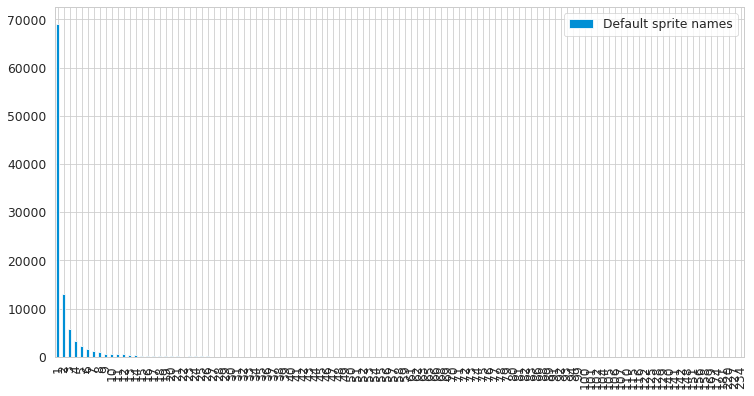

In [114]:
df_sprite_names_filter.plot.bar()

Se obtiene la frecuencia absoluta de nombres de personajes por defecto, pero apenas se aprecia nada. Filtramos por la frecuencia con la que aparecen. No se representa la frecuencia de los proyectos que no contienen ningún escenario por defecto.

<AxesSubplot:>

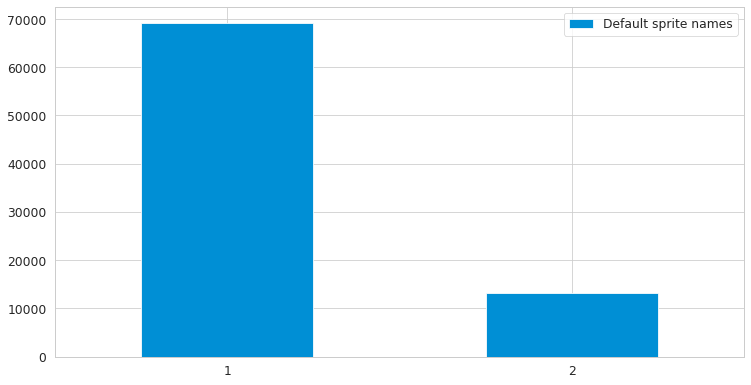

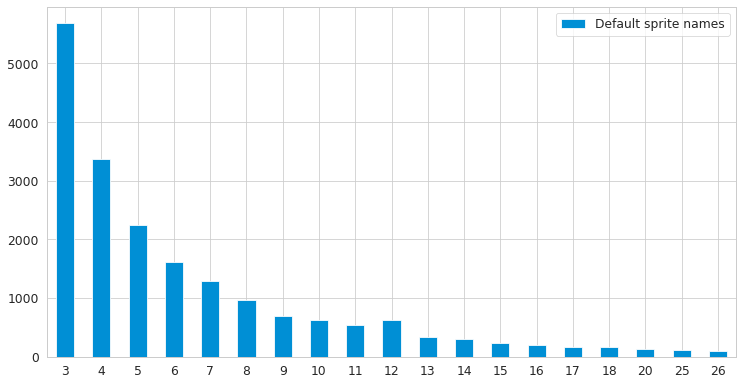

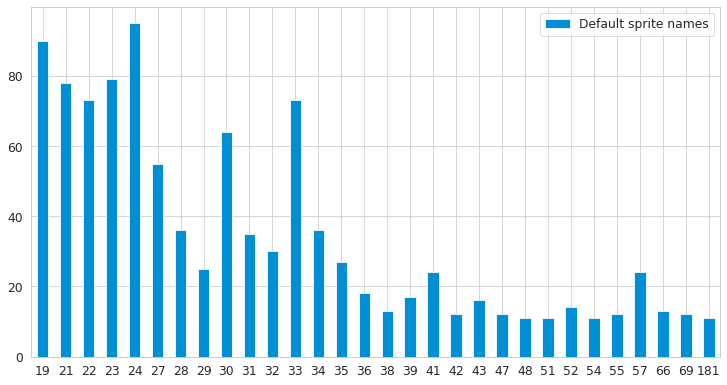

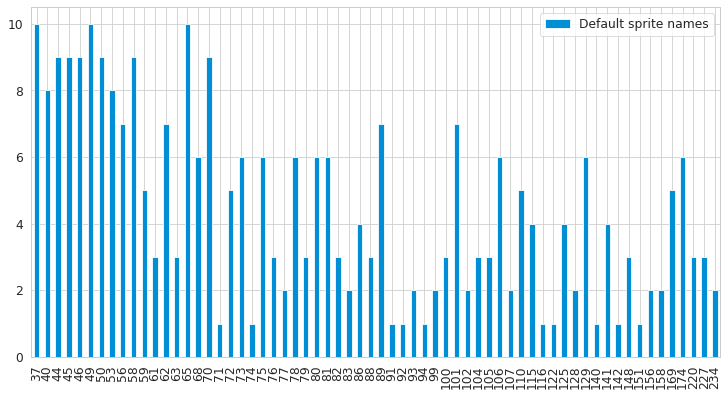

In [115]:
data_up = df_sprite_names_filter[df_sprite_names_filter["Default sprite names"]>10000]
data_up.plot.bar(rot=0)

data_medium = df_sprite_names_filter[(df_sprite_names_filter["Default sprite names"]>=100) & (df_sprite_names_filter["Default sprite names"]<10000)]
data_medium.plot.bar(rot=0)

data_low = df_sprite_names_filter[(df_sprite_names_filter["Default sprite names"]<100) & (df_sprite_names_filter["Default sprite names"]>10)]
data_low.plot.bar(rot=0)

data_very_low = df_sprite_names_filter[df_sprite_names_filter["Default sprite names"]<=10]
data_very_low.plot.bar(rot=90)

Aquí se puede apreciar mejor como es la distribución para el nº de default sprite names que se cometen en el conjunto total de proyectos. Hasta 22 sigue una tendencia descendente. A partir de ahí el nº de default sprite names no sigue una tendencia clara.

**Distribución de frecuencias de nombres de escenarios por defecto**

In [116]:
df_bad_smells["Default backdrop names"].value_counts().sort_index()

0       85919
1      160291
2       11912
3        3723
4        1911
        ...  
176         2
179         2
180         2
204         2
209         4
Name: Default backdrop names, Length: 89, dtype: int64

En nombres de fondos por defecto se cuenta con 89 valores distintos de tipo entero. Se pasan estos valores a un dataframe para facilitar luego su representación. Las veces que se comete este error está ordenado por el índice, que se corresponde con el nº de veces que se comete esta mala práctica a la hora de programar.

In [117]:
df_backdrop_names = df_bad_smells["Default backdrop names"].value_counts().to_frame().sort_index()
df_backdrop_names

,Default backdrop names
0,85919
1,160291
2,11912
3,3723
4,1911
...,...
176,2
179,2
180,2
204,2


In [143]:
df_backdrop_names_filter = df_backdrop_names.iloc[1:]

<AxesSubplot:>

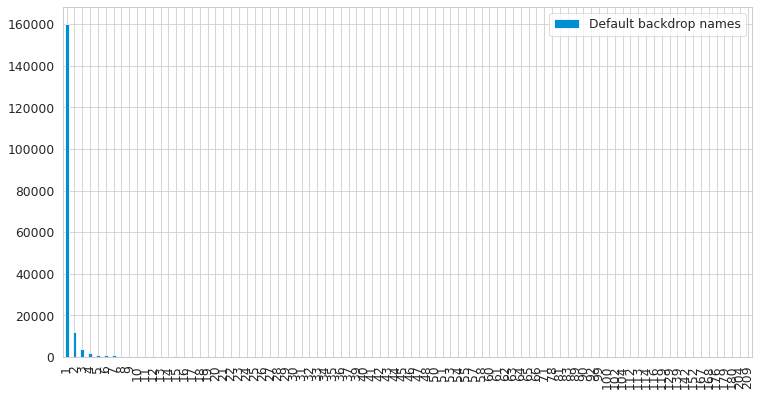

In [119]:
df_backdrop_names_filter.plot.bar()

<AxesSubplot:>

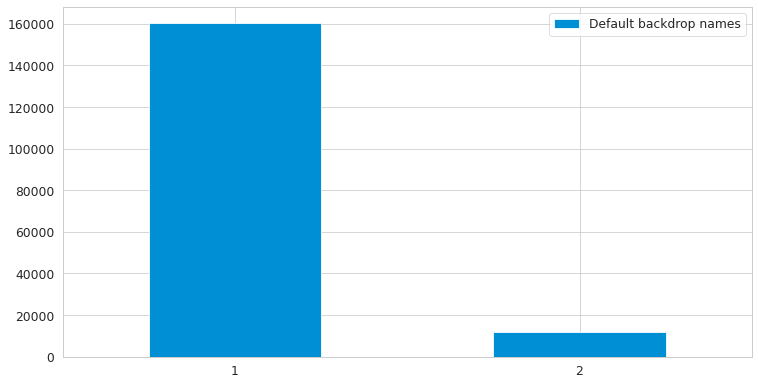

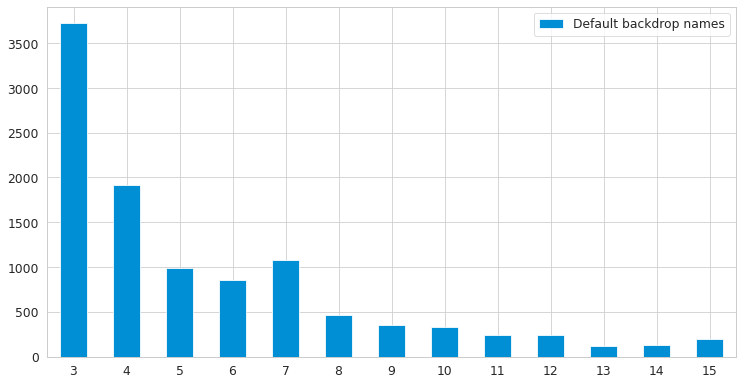

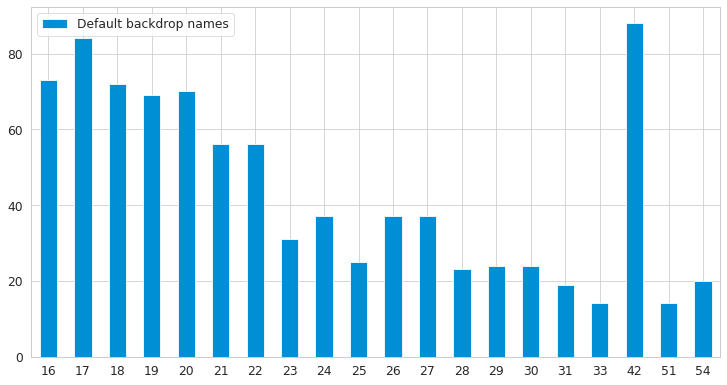

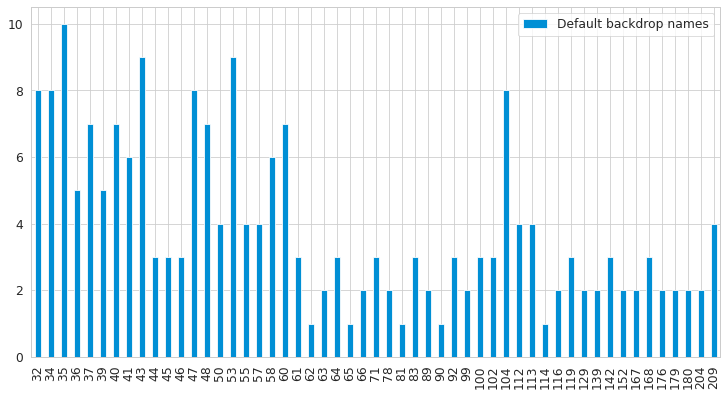

In [120]:
data_up = df_backdrop_names_filter[df_backdrop_names_filter["Default backdrop names"]>10000]
data_up.plot.bar(rot=0)
data_medium = df_backdrop_names_filter[(df_backdrop_names_filter["Default backdrop names"]>=100) & (df_backdrop_names_filter["Default backdrop names"]<10000)]
data_medium.plot.bar(rot=0)
data_low = df_backdrop_names_filter[(df_backdrop_names_filter["Default backdrop names"]<100) & (df_backdrop_names_filter["Default backdrop names"]>10)]
data_low.plot.bar(rot=0)
data_very_low = df_backdrop_names_filter[df_backdrop_names_filter["Default backdrop names"]<=10]
data_very_low.plot.bar(rot=90)

En  esta ocasión hay 160291 proyectos con 1 nombre de escenario por defecto. La tendencia es practicamente descendente hasta los 13 nombres de escenario por defecto. La frecuencia con la que los proyectos cometen este error no sigue una tendencia clara a partir de los 14 escenarios por defecto.

**Distribución de frecuencias de scripts duplicados**

In [121]:
df_bad_smells["Duplicate scripts"].value_counts()

0     228998
1      23117
2       7238
3       3568
4       1539
       ...  
38         2
52         1
47         1
68         1
81         1
Name: Duplicate scripts, Length: 62, dtype: int64

En código duplicado existen 62 valores distintos de tipo entero. Se pasan estos valores a un dataframe para facilitar luego su representación. Se ordenan por el nº de errores cometidos en el dataframe.

In [122]:
df_duplicate = df_bad_smells["Duplicate scripts"].value_counts().to_frame().sort_index()
df_duplicate

,Duplicate scripts
0,228998
1,23117
2,7238
3,3568
4,1539
...,...
73,3
74,3
79,3
81,1


Se observan 62 valores distintos de código duplicado con la frecuencia o nº de proyectos que cuentan con ese valor de código duplicado. Como vemos se cometen menos errores de código duplicado.

In [123]:
df_duplicate_filter = df_duplicate.iloc[1:]

<AxesSubplot:>

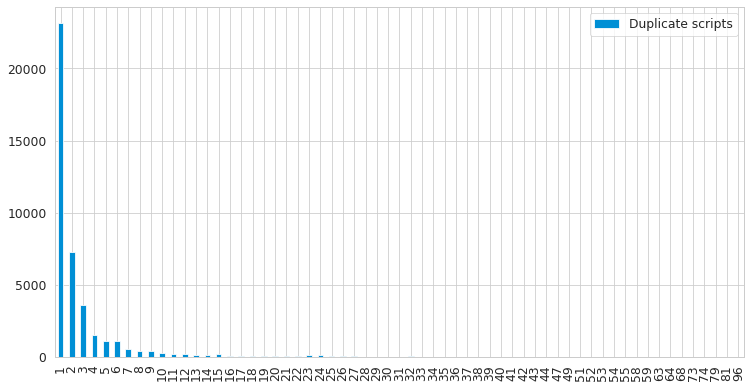

In [124]:
df_duplicate_filter.plot.bar()

<AxesSubplot:>

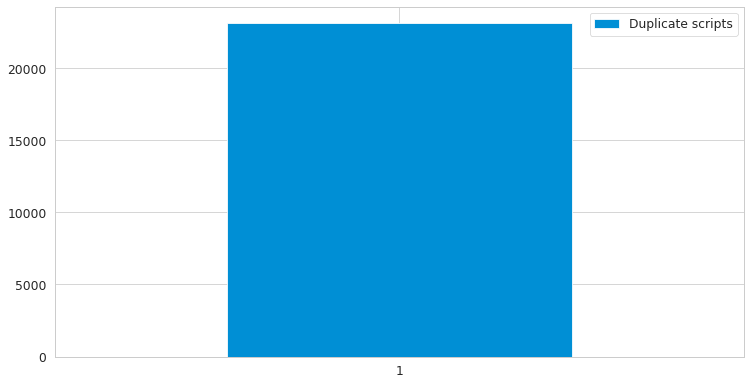

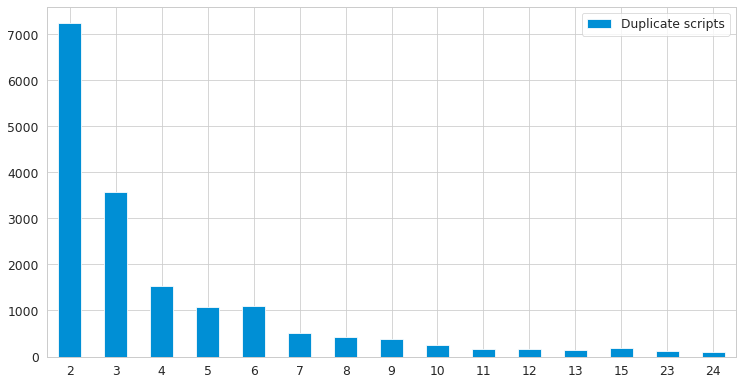

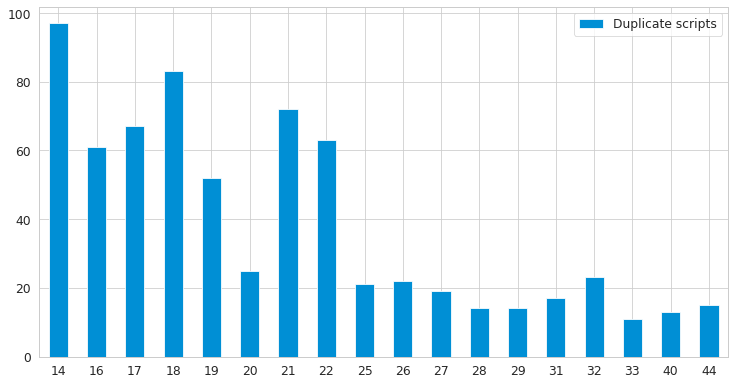

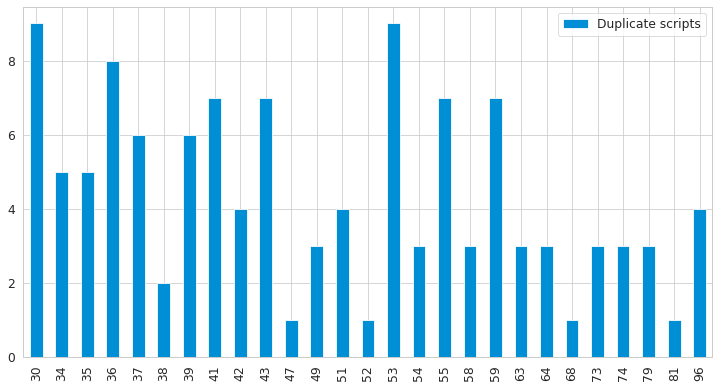

In [125]:
#Para poder visualizar algo mejor la distribución establecemos estos filtros.
data_up = df_duplicate_filter[df_duplicate_filter["Duplicate scripts"]>10000]
data_up.plot.bar(rot=0)
data_medium = df_duplicate_filter[(df_duplicate_filter["Duplicate scripts"]>=100) & (df_duplicate_filter["Duplicate scripts"]<10000)]
data_medium.plot.bar(rot=0)
data_low = df_duplicate_filter[(df_duplicate_filter["Duplicate scripts"]<100) & (df_duplicate_filter["Duplicate scripts"]>10)]
data_low.plot.bar(rot=0)
data_very_low = df_duplicate_filter[df_duplicate_filter["Duplicate scripts"]<=10]
data_very_low.plot.bar(rot=90)

Al igual que con default sprite names se observa una tendencia descendente en este caso hasta 16. A partir de ahí la distribución es heterogénea.

**Distribución de frecuencias para código que no se ejecuta nunca o nunca es alcanzado (Dead Code)**

In [126]:
df_bad_smells["Dead code"].value_counts().sort_index()

0      216772
1       33146
2        7377
3        3382
4        2053
        ...  
108         2
124         3
130         1
132         3
149         3
Name: Dead code, Length: 73, dtype: int64

La mayor parte de los proyectos no tienen este bad smell. Hay 73 valores enteros distintos para el nº de veces que se encuentra código inalcanzable en los proyectos. 

In [127]:
df_dead_code = df_bad_smells["Dead code"].value_counts().to_frame().sort_index()
df_dead_code

,Dead code
0,216772
1,33146
2,7377
3,3382
4,2053
...,...
108,2
124,3
130,1
132,3


In [128]:
df_dead_code_filter = df_dead_code.iloc[1:]

In [129]:
df_dead_code_filter

,Dead code
1,33146
2,7377
3,3382
4,2053
5,1068
...,...
108,2
124,3
130,1
132,3


<AxesSubplot:>

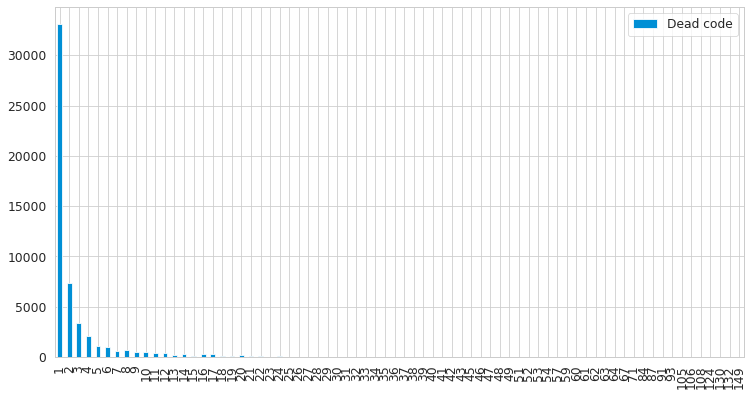

In [130]:
df_dead_code_filter.plot.bar()

<AxesSubplot:>

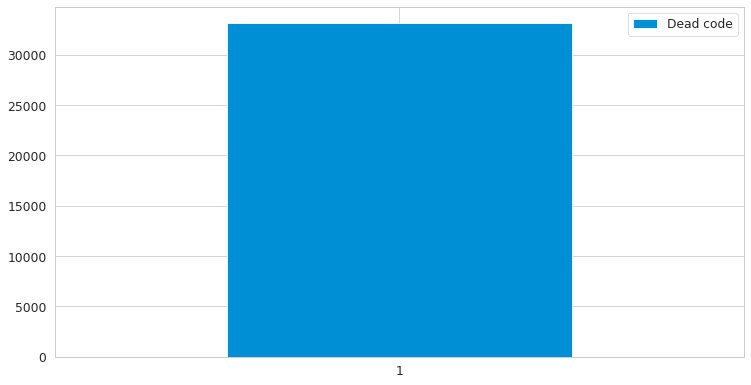

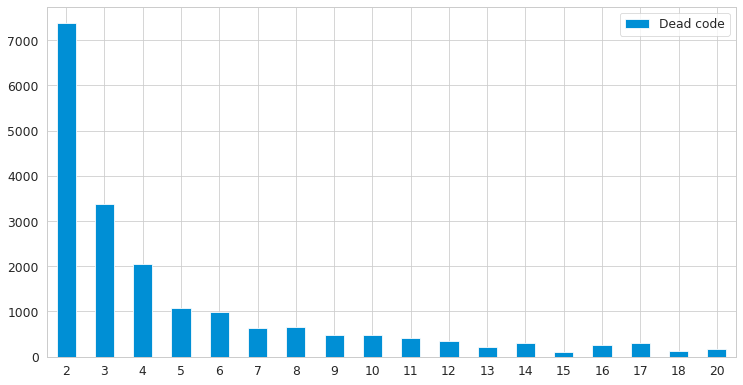

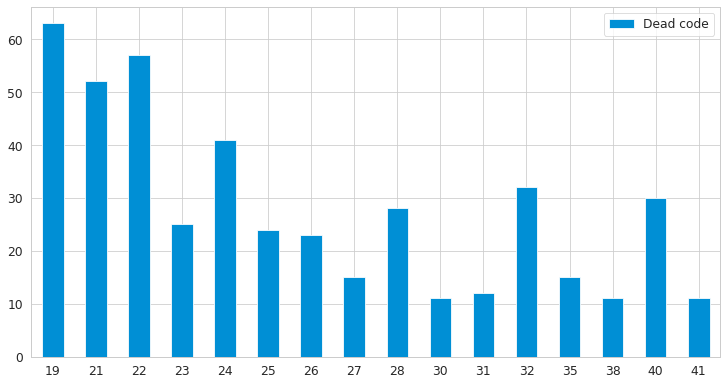

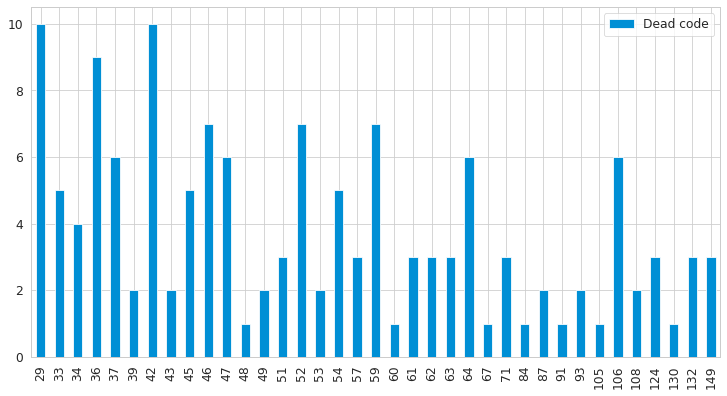

In [131]:
#Para poder visualizar algo mejor la distribución establecemos estos filtros.
data_up = df_dead_code_filter[df_dead_code_filter["Dead code"]>10000]
data_up.plot.bar(rot=0)

data_medium = df_dead_code_filter[(df_dead_code_filter["Dead code"]>=100) & (df_dead_code_filter["Dead code"]<10000)]
data_medium.plot.bar(rot=0)

data_low = df_dead_code_filter[(df_dead_code_filter["Dead code"]<100) & (df_dead_code_filter["Dead code"]>10)]
data_low.plot.bar(rot=0)

data_very_low = df_dead_code_filter[df_dead_code_filter["Dead code"]<=10]
data_very_low.plot.bar(rot=90)

Para el código que no llega a ejecutarse nunca observamos una distribución de frecuencias con tendencia descendente hasta 13 veces que aparece código muerto en los proyectos.

**Estudio estadístico bad smells**

In [132]:
df_bad_smells.describe()

,Default sprite names,Default backdrop names,Duplicate scripts,Dead code
count,269842.000000,269842.000000,269842.000000,269842.000000
mean,1.021616,1.036091,0.418171,0.550144
std,4.276754,3.029197,2.033208,2.493117
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000
max,234.000000,209.000000,96.000000,149.000000


In [144]:
df_bad_smells.mean()

Default sprite names      1.021616
Default backdrop names    1.036091
Duplicate scripts         0.418171
Dead code                 0.550144
dtype: float64

LLama la atención que el valor medio obtenido para cada bad smell sea tan bajo, pues por lo general las malas prácticas son muy habituales en los proyectos de Dr. Scratch. Las dispersiones con respecto a la media son por lo tanto muy elevadas. En dead code y en duplicate scripts todos los cuartiles dejan por debajo de sí los proyectos que alcanzan 0 puntos. En default sprite names algunos proyectos ordenados de menor a mayor dentro del 75% de los primeros valores, obtienen 1 bad smell de este tipo. En default backdrop names esta posición con un bad smell de este tipo se desplaza tanto al 50% y se mantiene hasta el tercer cuartil.

El mayor nº de errores cometidos es para nombres de escenario por defecto, y el menor valor es para código duplicado.

In [133]:
df_bad_smells.var()

Default sprite names      18.290626
Default backdrop names     9.176031
Duplicate scripts          4.133937
Dead code                  6.215631
dtype: float64

In [134]:
df_bad_smells.cov()

,Default sprite names,Default backdrop names,Duplicate scripts,Dead code
Default sprite names,18.290626,0.973016,2.059156,3.091358
Default backdrop names,0.973016,9.176031,0.223174,0.368829
Duplicate scripts,2.059156,0.223174,4.133937,2.723847
Dead code,3.091358,0.368829,2.723847,6.215631


<AxesSubplot:>

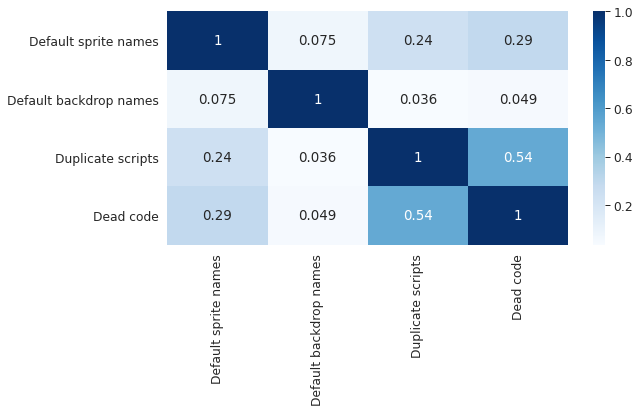

In [135]:
#Correlación bad smells
plt.figure(figsize=(8,4))
sns.set_context('paper', font_scale=1.4)
corr_matrix_bad_smells= df_bad_smells.corr()
sns.heatmap(corr_matrix_bad_smells, annot= True, cmap='Blues')

Tras calcular y representar la matriz de correlación entre cada par de variables de los bad smells, vemos que no existe dependencia lineal entre nombres de fondo y de objetos por defecto. Este resultado llama la atención, ya que se podría esperar que el programador del proyecto de Dr Scratch que mantiene los nombres de fondos por defecto, mantenga también los nombres de objetos por defecto. Se obtiene una correlación moderada positiva con un coeficiente de correlación de 0.54 entre scripts duplicados y código que no llega a ejecutarse nunca (dead code). Esto indica que el programador en Dr. Scratch que duplica su código también puede tener la mala costumbre de dejar bloques aislados bajo condiciones o dentro de bucles que no llegan a ejecutarse nunca.

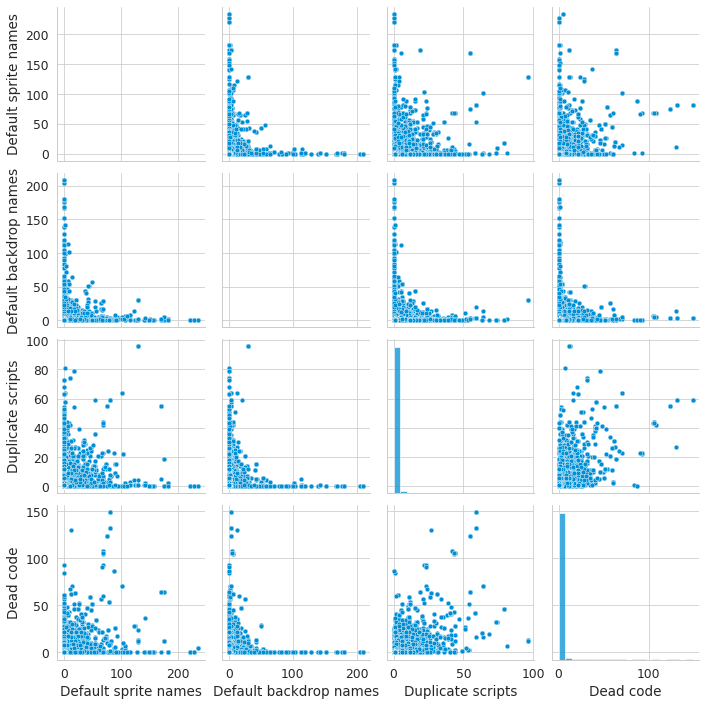

In [136]:
sns.pairplot(df_bad_smells)

Vemos como son las diagramas de dispersión entre cada par de variables o bad smells. No se aprecia a priori ningún tipo de dependencia lineal, pese a los valores obtenidos en la matriz de correlación, por lo que no se podría aplicar ningún algoritmo de regresión lineal.

<AxesSubplot:>

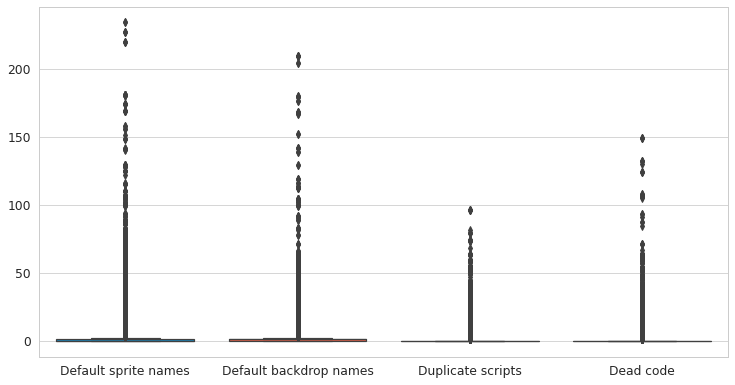

In [137]:
sns.boxplot(data=df_bad_smells)

A partir del diagrama de cajas se ve que todos los valores son considerados como outliers, pero todos tienen información relevante sobre los bad smells cometidos en la totalidad de los proyectos analizados.

In [138]:
#df_bad_smells.append(df_dr_scratch['Total'])
if 'Total' not in df_bad_smells.columns:
    df_bad_smells_total = df_bad_smells.copy()
    df_bad_smells_total.insert(4,'Total',df_dr_scratch['Total'])


In [139]:
df_bad_smells_total

,Default sprite names,Default backdrop names,Duplicate scripts,Dead code,Total
0,1,1,0,0,7
1,0,0,1,1,21
2,1,3,0,0,9
3,0,0,0,0,3
4,0,0,0,1,6
...,...,...,...,...,...
269839,0,0,1,0,13
269840,0,0,1,0,13
269841,0,0,1,0,13
269842,0,0,1,0,16


In [140]:
df_bad_smells_total.groupby(["Total"]).size()
df_dead = df_bad_smells_total.iloc[np.where(df_bad_smells["Dead code"]>=1)]
df_dup = df_bad_smells_total.iloc[np.where(df_bad_smells_total["Duplicate scripts"]>=1)]
#df_sprite = df_bad_smells_total.iloc[np.where(df_bad_smells["Default sprite names"]>=1)]
#df_backdrop = df_bad_smells_total.iloc[np.where(df_bad_smells_total["Default backdrop names"]>=1)]
df_dup = df_dup.groupby(["Total"]).size()
df_dead = df_dead.groupby(["Total"]).size()
#df_sprite = df_sprite.groupby(["Total"]).size()
#df_backdrop = df_backdrop.groupby(["Total"]).size()

<AxesSubplot:xlabel='Total'>

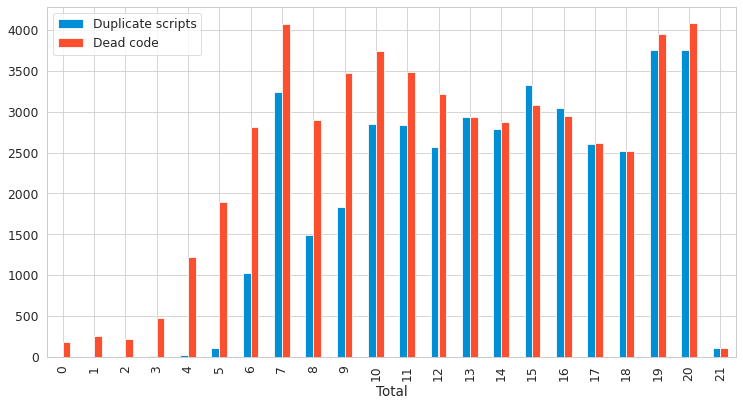

In [141]:
list_bad_smells = [df_dup, df_dead]
df_bad_smells_count = pd.concat(list_bad_smells, sort='False', axis=1).rename(columns={0: "Duplicate scripts", 1: "Dead code"})
df_bad_smells_count
df_bad_smells_count.plot.bar()

En la gráfica de barras podemos ver como se reparten el código duplicado y el código que no se ejecuta nunca o "muerto". 
- **Duplicate scripts**: Para la puntuación de 3 solo 6 proyectos presentan código duplicado. Esta cifra va aumentando levemente hasta los 5 puntos. Empieza a alcanzar valores significativos para una puntuación total de 6 y de 7, que es donde más proyectos se concentran, como se veía en los gráficos de barras del principio del cuaderno (sección 1.2). En 8, en 9, y en 10 toma valores en sentido ascendente. Entre los 11 y los 18 toma valores entre 3500 y 2500. El nº de proyectos que contienen código duplicado es mayor cuanto mayor es la puntuación (19 y 20). Así se puede apreciar que aunque la puntuación total obtenida a partir de las distintas áreas del pensamiento computacional es elevada los programadores de los proyectos siguen repitiendo código en el desarrollo del programa.
- **Dead Code**: Este mal hábito de dejar en el programa código inalcanzable, toma valores para todas las puntuaciones totales. Desde la puntuación de 0 existen proyectos con código muerto y aumenta con cierta tendencia exponencial hasta los 7 puntos, alcanzando valores relevantes desde los 4 puntos. Hay mayor nº de proyectos con código inalcanzable que con código duplicado hasta los 12 puntos. A partir de los 13 puntos los valores son similares a los de código duplicado hasta los 21 puntos. Como se aprecia en la gráfica y en la tabla el hecho de que el programador aumente sus destrezas en el pensamiento computacional no evita que siga dejando en el programa conjuntos de bloques que no se ejecutan nunca.

In [142]:
df_bad_smells_count.reset_index(inplace=False)
df_bad_smells_count

,Duplicate scripts,Dead code
Total,,
0,NaN,177
1,NaN,252
2,NaN,214
3,6.0,475
4,23.0,1222
5,108.0,1892
6,1030.0,2813
7,3247.0,4075
8,1491.0,2899
